In [ ]:
from google.colab import drive     
drive.mount('/content/drive')

Mounted at /content/drive


# Preparing the data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import pickle
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score, classification_report
from sklearn.utils import shuffle

!pip install phe

     |████████████████████████████████| 53 kB 1.6 MB/s 


In [ ]:
os.chdir("/content/drive/My Drive/MTP/data")
os.listdir()

['Y_train',
 'Y_test',
 'X_train',
 'X_test',
 'Y_train_attack',
 'Y_test_attack',
 'uniform_client_accuracy.pkl',
 'uniform_server_accuracy.pkl',
 'uniform_self_accuracy.pkl',
 'god_accuracy.pkl',
 'non_iid_data.pkl',
 'non_uniform_client_accuracy.pkl',
 'non_uniform_server_accuracy.pkl',
 'non_uniform_self_accuracy.pkl',
 'lf_uniform_client_accuracy.pkl',
 'lf_uniform_server_accuracy.pkl',
 'lf_uniform_self_accuracy.pkl',
 'lf_5_uniform_client_accuracy.pkl',
 'lf_5_uniform_server_accuracy.pkl',
 'lf_5_uniform_self_accuracy.pkl',
 'weightp_uniform_client_accuracy.pkl',
 'weightp_uniform_server_accuracy.pkl',
 'weightp_uniform_self_accuracy.pkl',
 'l2_uniform_self_accuracy.pkl',
 'lf2_uniform_client_accuracy.pkl',
 'lf2_uniform_server_accuracy.pkl',
 'lf2_uniform_self_accuracy.pkl',
 'umc.pkl',
 'in.pkl',
 'out.pkl',
 'grad_values.pkl',
 'grad_model.pkl',
 'inv_data.pkl',
 'inv_model.pkl',
 'adv_attack.pkl',
 'no_attack.pkl',
 'dd1.pkl',
 'dd2.pkl',
 'at1.pkl',
 'at2.pkl',
 'changed1.p

In [ ]:
X_train = pd.read_csv("X_train", index_col=0)
X_test = pd.read_csv("X_test", index_col=0)

Y_train = pd.read_csv("Y_train", index_col=0)
Y_test = pd.read_csv("Y_test", index_col=0)

Y_train_attack = pd.read_csv("Y_train_attack", index_col=0)
Y_test_attack = pd.read_csv("Y_test_attack", index_col=0)

In [ ]:
# Combine and split
X = np.concatenate([np.array(X_train), np.array(X_test)], axis=0)
Y = np.concatenate([np.array(Y_train), np.array(Y_test)], axis=0)
Yt = np.concatenate([np.array(Y_train_attack), np.array(Y_test_attack)], axis=0)

# Y = 1.0*( Y.reshape(-1) > 0)
Y = Y.reshape(-1)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, test_size=0.2)
#np.shape(X_train), np.shape(X_test)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators=30)
# rf.fit(X_train, Y_train)
# Y_pred = rf.predict(X_test)
# print(classification_report(Y_test, Y_pred))

# Dataset Generation

In [ ]:
n = 10

In [ ]:
# Separate Dataset creation for the individual Users


# Uniform Distribution

s = int(np.shape(X)[0]/n)
client_data = []

X, Y = shuffle(X, Y)
rX, rY= X, Y

for i in range(0,n):
  d = [X[i*s:(i+1)*s], Y[i*s:(i+1)*s]]
  client_data.append(d)

dclass = []

for i in range(n):
  dclass.append(Counter(client_data[i][1]))
  #dclass.append(list(Counter(client_data[i][1]).values()))
total= Counter(Y)

dis = []

for i in list(total.keys()):
  temp = []
  for j in range(n):
    temp.append(100 * dclass[j][i]/total[i])
  dis.append(temp)

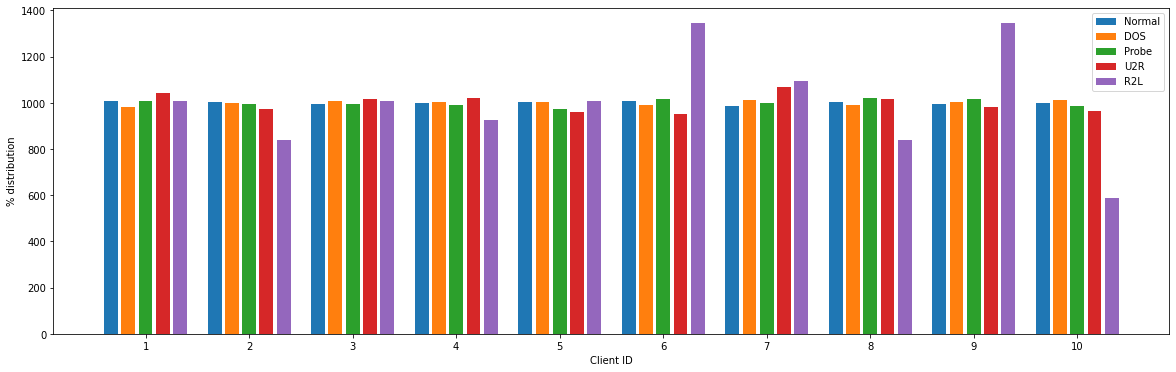

In [ ]:
t = np.arange(0,60,6)
ltype = ['Normal', 'DOS', 'Probe', 'U2R', 'R2L']
plt.figure(figsize=(20,6))
for i in range(5):
  p = dis[i]
  p = [100*x for x in p]
  plt.bar(t+i, p,label=ltype[i])
plt.legend()
plt.xticks(t+2, np.arange(1,11))
plt.xlabel('Client ID')
plt.ylabel('% distribution')
plt.show()

In [ ]:
# Non-IID Dataset

n_class = 5

class0 = [0.1, 0.05, 0.15, 0.15, 0.15, 0.1, 0.1, 0.05, 0.1, 0.05]
class1 = [0.1, 0, 0.4, 0, 0, 0.3, 0.2, 0, 0, 0]
class2 = [0.2, 0.5, 0, 0, 0, 0, 0.1, 0, 0.2, 0]
class3 = [0, 0.5, 0, 0, 0, 0, 0, 0.5, 0, 0]
class4 = [0.3, 0, 0.3, 0.4, 0, 0, 0, 0, 0, 0]

dclass = [class0, class1, class2, class3, class4]

Xclass = [[] for i in range(5)]

for i in range(len(Y)):
  Xclass[Y[i]].append(X[i])

for i in range(len(Xclass)):
  Xclass[i] = shuffle(Xclass[i])

client_data_x = [[] for i in range(n)]
client_data_y = [[] for i in range(n)]

for i in range(n_class):
  clen = len(Xclass[i])
  c_class = i
  print(f"Class  {i}  Length: {clen}")
  s=0
  for j in range(n):
    start = int(s*clen)
    stop = int((s+dclass[i][j])*clen)
    print(f"Class {i} Member {j}   Start: {start}  Stop: {stop}")
    client_data_x[j].extend(Xclass[i][start:stop])
    client_data_y[j].extend([c_class for k in range(stop-start)])
    s = s + dclass[i][j]

Class  0  Length: 77054
Class 0 Member 0   Start: 0  Stop: 7705
Class 0 Member 1   Start: 7705  Stop: 11558
Class 0 Member 2   Start: 11558  Stop: 23116
Class 0 Member 3   Start: 23116  Stop: 34674
Class 0 Member 4   Start: 34674  Stop: 46232
Class 0 Member 5   Start: 46232  Stop: 53937
Class 0 Member 6   Start: 53937  Stop: 61643
Class 0 Member 7   Start: 61643  Stop: 65495
Class 0 Member 8   Start: 65495  Stop: 73201
Class 0 Member 9   Start: 73201  Stop: 77054
Class  1  Length: 53387
Class 1 Member 0   Start: 0  Stop: 5338
Class 1 Member 1   Start: 5338  Stop: 5338
Class 1 Member 2   Start: 5338  Stop: 26693
Class 1 Member 3   Start: 26693  Stop: 26693
Class 1 Member 4   Start: 26693  Stop: 26693
Class 1 Member 5   Start: 26693  Stop: 42709
Class 1 Member 6   Start: 42709  Stop: 53387
Class 1 Member 7   Start: 53387  Stop: 53387
Class 1 Member 8   Start: 53387  Stop: 53387
Class 1 Member 9   Start: 53387  Stop: 53387
Class  2  Length: 14077
Class 2 Member 0   Start: 0  Stop: 2815
Cl

In [ ]:
client_data = []

for i in range(n):
  x = client_data_x[i]
  y = client_data_y[i]

  x,y = shuffle(x,y)

  x = np.array(x)
  y = np.array(y)

  client_data.append([x,y])

In [ ]:
pickle.dump(client_data, open("non_iid_data.pkl","wb"))

# Perfect Model

In [ ]:
# Deep Learning Base Model

def create_model():
  input = Input(shape=[122], name='input')
  d1 = Dense(128, activation='relu', name='dense1')(input)
  dr1 = Dropout(0.2, name='dropout1')(d1)
  d2 = Dense(80, activation='relu',  name='dense2')(dr1)
  dr2 = Dropout(0.2, name='dropout2')(d2)
  d3  = Dense(50, activation='relu', name='dense3')(dr2)
  dr3 = Dropout(0.2, name='dropout3')(d3)
  d4  = Dense(25, activation='relu', name='dense4')(dr3)
  dr4 = Dropout(0.2, name='dropout4')(d4)
  d5  = Dense(10, activation='relu', name='dense5')(dr4)
  output = Dense(5, activation='softmax', name='output')(d5)

  model = tf.keras.Model(inputs = input, outputs = output)

  opt = tf.keras.optimizers.Adam(learning_rate=0.01)
  model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

  return model

In [ ]:
god_model = create_model()
god_accuracy = []

god_model.fit(X_train, Y_train, epochs=100, batch_size=512, validation_data=(X_test, Y_test))

In [ ]:
# Base Case

god_model = create_model()
god_accuracy = []

for i in range(20):
  god_model.fit(X_train, Y_train, epochs=5)
  y_pred = np.argmax(np.array(god_model.predict(X_test)), axis=1)
  god_accuracy.append(get_stats(Y_test, y_pred))

Epoch 1/5
3713/3713 [==============================] - 9s 2ms/step - loss: 0.3799 - accuracy: 0.8928
Epoch 2/5
3713/3713 [==============================] - 8s 2ms/step - loss: 0.1712 - accuracy: 0.9435
Epoch 3/5
3713/3713 [==============================] - 8s 2ms/step - loss: 0.1359 - accuracy: 0.9565
Epoch 4/5
3713/3713 [==============================] - 8s 2ms/step - loss: 0.1192 - accuracy: 0.9622
Epoch 5/5
3713/3713 [==============================] - 8s 2ms/step - loss: 0.1071 - accuracy: 0.9660
Epoch 1/5
  23/3713 [..............................] - ETA: 8s - loss: 0.1347 - accuracy: 0.9620 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3713/3713 [==============================] - 8s 2ms/step - loss: 0.0959 - accuracy: 0.9705
Epoch 2/5
3713/3713 [==============================] - 8s 2ms/step - loss: 0.0884 - accuracy: 0.9732
Epoch 3/5
3713/3713 [==============================] - 8s 2ms/step - loss: 0.0853 - accuracy: 0.9739
Epoch 4/5
3713/3713 [==============================] - 8s 2ms/step - loss: 0.0828 - accuracy: 0.9746
Epoch 5/5
3713/3713 [==============================] - 8s 2ms/step - loss: 0.0788 - accuracy: 0.9758
Epoch 1/5
3713/3713 [==============================] - 8s 2ms/step - loss: 0.0751 - accuracy: 0.9771
Epoch 2/5
3713/3713 [==============================] - 8s 2ms/step - loss: 0.0728 - accuracy: 0.9777
Epoch 3/5
3713/3713 [==============================] - 8s 2ms/step - loss: 0.0701 - accuracy: 0.9777
Epoch 4/5
3713/3713 [==============================] - 8s 2ms/step - loss: 0.0695 - accuracy: 0.9790
Epoch 5/5
3713/3713 [==============================] - 8s 2ms/step - loss: 0.0683 - accuracy: 0.9789


In [ ]:
pickle.dump(god_accuracy, open("god_accuracy.pkl","wb"))

# Graph Plotting

In [ ]:
import pickle
god_accuracy = pickle.load(open("god_accuracy.pkl","rb"))

In [ ]:
import pickle
pickle.dump(client_accuracy, open("non_uniform_client_accuracy.pkl","wb"))
pickle.dump(server_accuracy, open("non_uniform_server_accuracy.pkl","wb"))
pickle.dump(self_accuracy, open("non_uniform_self_accuracy.pkl","wb"))

In [ ]:
'uniform_client_accuracy.pkl',
 'uniform_server_accuracy.pkl',
 'uniform_self_accuracy.pkl',
 'god_accuracy.pkl',
 'non_iid_data.pkl',
 'non_uniform_client_accuracy.pkl',
 'non_uniform_server_accuracy.pkl',
 'non_uniform_self_accuracy.pkl',
 'lf_uniform_client_accuracy.pkl',
 'lf_uniform_server_accuracy.pkl',
 'lf_uniform_self_accuracy.pkl',
 'lf_5_uniform_client_accuracy.pkl',
 'lf_5_uniform_server_accuracy.pkl',
 'lf_5_uniform_self_accuracy.pkl',
 'weightp_uniform_client_accuracy.pkl',
 'weightp_uniform_server_accuracy.pkl',
 'weightp_uniform_self_accuracy.pkl'

In [ ]:
import pickle
god_accuracy = pickle.load(open("god_accuracy.pkl","rb"))
client_accuracy = pickle.load(open("non_uniform_client_accuracy.pkl","rb"))
self_accuracy = pickle.load(open("non_uniform_self_accuracy.pkl","rb"))
server_accuracy = pickle.load(open("non_uniform_server_accuracy.pkl","rb"))

In [ ]:
client_accuracy[0][0][0]

{'0': {'f1-score': 0.9233859752140187,
  'precision': 0.8783513640639699,
  'recall': 0.9732881620952505,
  'support': 15349},
 '1': {'f1-score': 0.8781582885817413,
  'precision': 0.8334029576405715,
  'recall': 0.927993301702484,
  'support': 10749},
 '2': {'f1-score': 0.40293868324385423,
  'precision': 0.9807427785419532,
  'recall': 0.25355618776671407,
  'support': 2812},
 '3': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 773},
 '4': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 21},
 'accuracy': 0.8627457581470509,
 'macro avg': {'f1-score': 0.44089658940792287,
  'precision': 0.538499420049299,
  'recall': 0.43096753031288965,
  'support': 29704},
 'weighted avg': {'f1-score': 0.8330675449369388,
  'precision': 0.8483003020453929,
  'recall': 0.8627457581470509,
  'support': 29704}}

In [ ]:
# Control + Shift + L

update_rounds=20
t = np.arange(0, update_rounds)

pserver = []
pgod = []
pclient = [[] for i in range(n)]
pself = [[] for i in range(n)]

for i in range(n):
  for j in range(update_rounds):
    pclient[i].append(client_accuracy[i][j][0]['accuracy'])

for i in range(n):
  for j in range(update_rounds):
    pself[i].append(self_accuracy[i][j][0]['accuracy'])

for i in range(update_rounds):
  pserver.append(server_accuracy[i][0]['accuracy'])

for i in range(update_rounds):
  pgod.append(god_accuracy[i][0]['accuracy'])


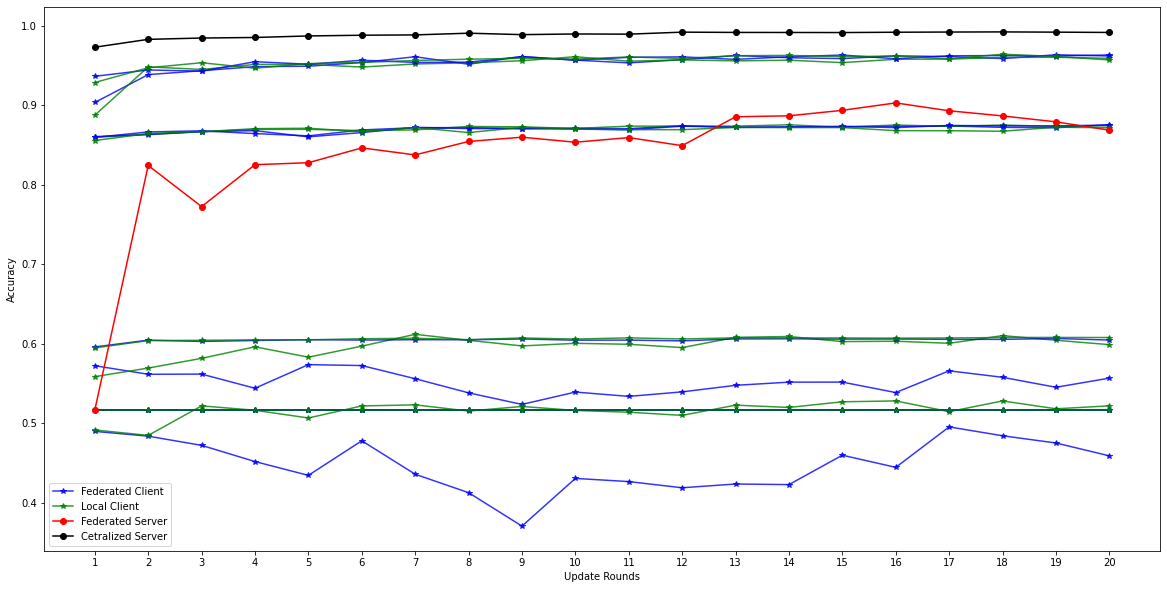

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(t,t+1)
for i in range(n):
  if(i==0):
    plt.plot(t, pclient[i], alpha=0.8, marker='*', c='b',label='Federated Client')
    plt.plot(t, pself[i], alpha=0.8, marker='*', c='g', label='Local Client')
  else:
    plt.plot(t, pclient[i], alpha=0.8, marker='*', c='b',)
    plt.plot(t, pself[i], alpha=0.8, marker='*', c='g')
plt.plot(t, pserver, marker='o', c='r', label='Federated Server')
plt.plot(t, pgod, marker='o', c='black', label='Cetralized Server')
plt.xlabel('Update Rounds')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


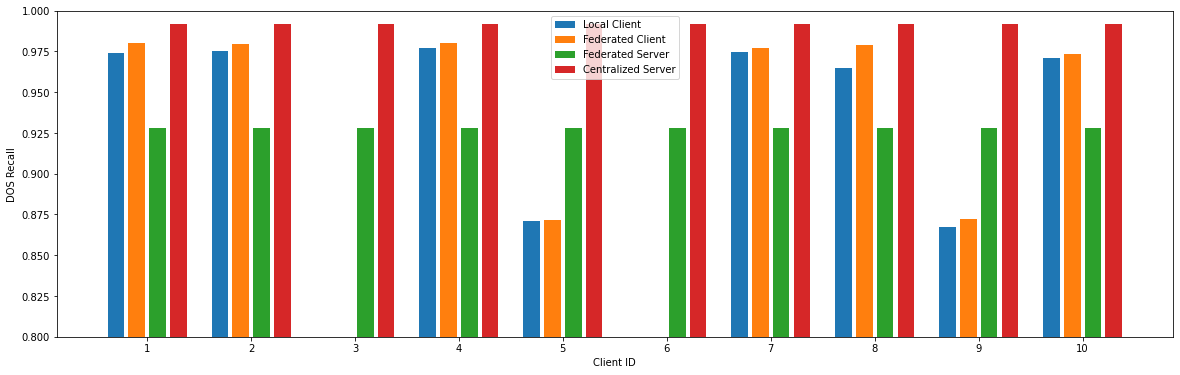

In [ ]:
lm = []
sm = []
sr = []
cs = []

for i in range(n):
  lm.append(pclient[i][-1])
  sm.append(pself[i][-1])
  sr.append(pserver[-1])
  cs.append(pgod[-1])

t = np.arange(0,50,5)
plt.figure(figsize=(20,6))
plt.bar(t, sm, label='Local Client')
plt.bar(t+1, lm, label='Federated Client')
plt.bar(t+2, sr, label='Federated Server')
plt.bar(t+3, cs, label='Centralized Server')
plt.legend()
plt.xticks(t+1.5,np.arange(1,11))
plt.xlabel('Client ID')
plt.ylabel('DOS Recall')
plt.ylim(0.8,1)
plt.show()

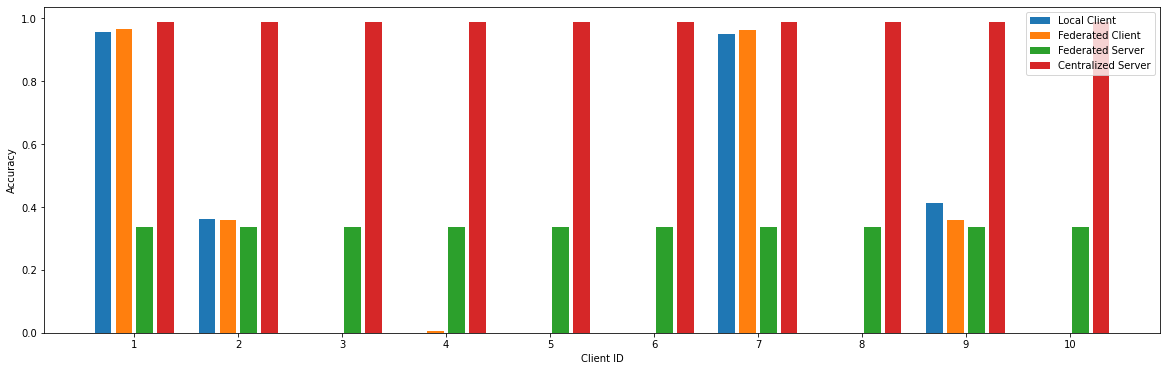

In [ ]:
lm = []
sm = []
sr = []
cs = []

for i in range(n):
  lm.append(pclient[i][-1])
  sm.append(pself[i][-1])
  sr.append(pserver[-1])
  cs.append(pgod[-1])

t = np.arange(0,50,5)
plt.figure(figsize=(20,6))
plt.bar(t, sm, label='Local Client')
plt.bar(t+1, lm, label='Federated Client')
plt.bar(t+2, sr, label='Federated Server')
plt.bar(t+3, cs, label='Centralized Server')
plt.legend()
plt.xticks(t+1.5,np.arange(1,11))
plt.xlabel('Client ID')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
lm, sm, sr, cs, t

# Attacks


**Data Poisoning Attacks:**
1. Label Flipping
2. Adversarial Inputs
3. Blackdoor insertions

**Model Poisoning Attacks:**
1. Model/Gradient Manipulation



In [ ]:
# Federated Learning Loop


server_model = create_model()
updated_client_models = []
available_clients_id = []
self_model = [create_model() for i in range(n)]
num_available = 0

num_poisoned = 0
poisoned_clients = []

update_rounds = 20
ep = 5
bs = 512
lr = 0.1
decay = 1.0
import time
start = time.time()

def get_stats(y_true, y_pred):
  return [classification_report(y_true, y_pred, output_dict=True)]
  #return [accuracy_score(Y_test, y_pred), recall_score(Y_test, y_pred), f1_score(Y_test, y_pred), precision_score(Y_test, y_pred)]

def get_update(current_weights, i, lr):
  x = client_data[i][0]
  y = client_data[i][1]

  temp_model = create_model()
  temp_model.set_weights(current_weights)

  print("----------------------------------")
  print(f"Client ID: {i}   {len(y)}")
  print("Training the FL model: ")

  temp_model.fit(x,y, batch_size=bs, epochs=ep, validation_data = (X_test, Y_test), verbose=True)

  print("Private Model: ")
  self_model[i].fit(x,y, batch_size=bs, epochs=ep,validation_data = (X_test, Y_test), verbose=True)

  # y_pred = 1.0 * (temp_model.predict(X_test) > 0.5)
  y_pred = np.argmax(np.array(temp_model.predict(X_test)), axis=1)
  # print(classification_report(Y_test, y_pred))

  y_pred_self = np.argmax(np.array(self_model[i].predict(X_test)), axis=1)
  # print(classification_report(Y_test, y_pred_self))

  return temp_model.get_weights(), len(x), get_stats(Y_test, y_pred), get_stats(Y_test, y_pred_self)

client_accuracy = [[] for j in range(n)]
self_accuracy = [[] for j in range(n)]
server_accuracy = []

for i in range(update_rounds):
  print(" ")
  print("*******************************")
  print(f"Update Round: {i}")
  # num_available = random.randint(1,n)
  num_available = n
  print(f"No of clients selected for this round: {num_available}")
  # available_clients_id = random.sample(range(0, n), num_available)
  available_clients_id = [k for k in range(n)]

  # if(i==0): # Only for the first round
  #   poisoned_clients = random.sample(available_clients_id, num_poisoned)

  #   print(f"Poisoned Clients are: {poisoned_clients}")

  #   for j in range(0,num_poisoned):
  #     x,y = client_data[poisoned_clients[j]]

  #     # Poisoning 25% of the data using label flipping
  #     count = 0
  #     for k in range(len(y)):
  #       if y[k]>0:
  #         if(random.random() < 2.0):
  #           #print(f"inverting the labels {y[k]} --> ", end='')
  #           count += 1
  #           y[k] = 4.0
    
  #     print(Counter(y))
  #     client_data[poisoned_clients[j]][1] = y

  global_weights = server_model.get_weights()
  updated_client_models = []
  client_data_sizes = []

  for j in available_clients_id:
    local_weights, local_data_size, stats, self_stats = get_update(global_weights, j, lr)

    # if j in poisoned_clients:
    #   for q in range(len(local_weights)):
    #     local_weights[q] = 1 * local_weights[q]

    updated_client_models.append(local_weights)
    client_data_sizes.append(local_data_size)
    client_accuracy[j].append(stats)
    self_accuracy[j].append(self_stats)
  
  client_data_sizes = np.array(client_data_sizes)
  total_data_size = np.sum(client_data_sizes)
  client_data_sizes = client_data_sizes/total_data_size

  updated_client_models = np.array(updated_client_models)

  for j in range(len(updated_client_models)):
    for k in range(len(updated_client_models[j])):
      updated_client_models[j][k] = client_data_sizes[j] * updated_client_models[j][k]

  avg_weights = []

  for j in range(len(updated_client_models[0])):
    temp_sum = updated_client_models[0][j]
    for k in range(1,len(updated_client_models)):
      temp_sum += updated_client_models[k][j]
    avg_weights.append(temp_sum)

  server_model.set_weights(avg_weights)

  # y_pred = 1.0 * (server_model.predict(X_test) > 0.5)
  y_pred = np.argmax(np.array(server_model.predict(X_test)), axis=1)

  server_accuracy.append(get_stats(Y_test, y_pred))
  print(f"Classification Accuracy: {accuracy_score(Y_test, y_pred)}")

  lr = lr * decay

print(f"Time Taken = {time.time() - start}")

 
*******************************
Update Round: 0
No of clients selected for this round: 10
Poisoned Clients are: [5, 2]
Counter({0: 7642, 4: 7209})
Counter({0: 7654, 4: 7197})
----------------------------------
Client ID: 0   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 19ms/step - loss: 0.9624 - accuracy: 0.7185 - val_loss: 0.5411 - val_accuracy: 0.8024
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.4889 - accuracy: 0.8406 - val_loss: 0.3993 - val_accuracy: 0.8667
Epoch 3/5
30/30 [==============================] - 0s 14ms/step - loss: 0.3870 - accuracy: 0.8790 - val_loss: 0.3358 - val_accuracy: 0.9018
Epoch 4/5
30/30 [==============================] - 0s 12ms/step - loss: 0.3343 - accuracy: 0.8986 - val_loss: 0.2689 - val_accuracy: 0.9154
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2870 - accuracy: 0.9098 - val_loss: 0.2450 - val_accuracy: 0.9171
Private Model: 
Epoch 1/5
30/30 [==========

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------------------------
Client ID: 1   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 19ms/step - loss: 0.9435 - accuracy: 0.7183 - val_loss: 0.5239 - val_accuracy: 0.8195
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.4991 - accuracy: 0.8382 - val_loss: 0.3811 - val_accuracy: 0.8755
Epoch 3/5
30/30 [==============================] - 0s 14ms/step - loss: 0.3922 - accuracy: 0.8760 - val_loss: 0.3073 - val_accuracy: 0.9046
Epoch 4/5
30/30 [==============================] - 0s 12ms/step - loss: 0.3371 - accuracy: 0.8970 - val_loss: 0.2712 - val_accuracy: 0.9113
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2956 - accuracy: 0.9064 - val_loss: 0.7885 - val_accuracy: 0.6075
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 19ms/step - loss: 0.7525 - accuracy: 0.7435 - val_loss: 0.4593 - val_accuracy: 0.8418
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:104: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Classification Accuracy: 0.8512321572852141
 
*******************************
Update Round: 1
No of clients selected for this round: 10
----------------------------------
Client ID: 0   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.3571 - accuracy: 0.8884 - val_loss: 0.2579 - val_accuracy: 0.9168
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2623 - accuracy: 0.9173 - val_loss: 0.2558 - val_accuracy: 0.9217
Epoch 3/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2513 - accuracy: 0.9211 - val_loss: 0.2192 - val_accuracy: 0.9278
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2137 - accuracy: 0.9301 - val_loss: 0.1863 - val_accuracy: 0.9433
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1997 - accuracy: 0.9350 - val_loss: 0.1911 - val_accuracy: 0.9405
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - lo

In [ ]:
# Federated Learning Loop ---- Model Inference Attacks

server_model = create_model()
updated_client_models = []
available_clients_id = []
self_model = [create_model() for i in range(n)]
num_available = 0

num_poisoned = 0
poisoned_clients = []

update_rounds = 10
ep = 5
bs = 512
lr = 0.05
decay = 1.0
import time
start = time.time()

sx1, sy1 = client_data[0]
sx2, sy2 = client_data[1]
i1 = np.zeros((np.shape(sx1)[0],update_rounds))
i2 = np.zeros((np.shape(sx2)[0],update_rounds))

def get_stats(y_true, y_pred):
  return [classification_report(y_true, y_pred, output_dict=True)]
  #return [accuracy_score(Y_test, y_pred), recall_score(Y_test, y_pred), f1_score(Y_test, y_pred), precision_score(Y_test, y_pred)]

def get_update(current_weights, i, lr, upr):
  x = client_data[i][0]
  y = client_data[i][1]

  temp_model = create_model()
  temp_model.set_weights(current_weights)

  print("----------------------------------")
  print(f"Client ID: {i}   {len(y)}")
  print("Training the FL model: ")

  temp_model.fit(x,y, batch_size=bs, epochs=ep, validation_data = (X_test, Y_test), verbose=True)

  print("Private Model: ")
  self_model[i].fit(x,y, batch_size=bs, epochs=ep,validation_data = (X_test, Y_test), verbose=True)

  # y_pred = 1.0 * (temp_model.predict(X_test) > 0.5)
  y_pred = np.argmax(np.array(temp_model.predict(X_test)), axis=1)
  # print(classification_report(Y_test, y_pred))

  if(i==0):
    y1 = np.array(temp_model.predict(sx1))
    y2 = np.array(temp_model.predict(sx2))

    for j in range(len(y1)):
      i1[j][upr] = y1[j][sy1[j]]

    for j in range(len(y2)):
      i2[j][upr] = y1[j][sy2[j]]

  y_pred_self = np.argmax(np.array(self_model[i].predict(X_test)), axis=1)
  # print(classification_report(Y_test, y_pred_self))

  return temp_model.get_weights(), len(x), get_stats(Y_test, y_pred), get_stats(Y_test, y_pred_self)

client_accuracy = [[] for j in range(n)]
self_accuracy = [[] for j in range(n)]
server_accuracy = []

for i in range(update_rounds):
  print(" ")
  print("*******************************")
  print(f"Update Round: {i}")
  # num_available = random.randint(1,n)
  num_available = n
  print(f"No of clients selected for this round: {num_available}")
  # available_clients_id = random.sample(range(0, n), num_available)
  available_clients_id = [k for k in range(n)]

  # if(i==0): # Only for the first round
  #   poisoned_clients = random.sample(available_clients_id, num_poisoned)

  #   print(f"Poisoned Clients are: {poisoned_clients}")

  #   for j in range(0,num_poisoned):
  #     x,y = client_data[poisoned_clients[j]]

  #     # Poisoning 25% of the data using label flipping
  #     count = 0
  #     for k in range(len(y)):
  #       if y[k]>0:
  #         if(random.random() < 2.0):
  #           #print(f"inverting the labels {y[k]} --> ", end='')
  #           count += 1
  #           y[k] = 4.0
    
  #     print(Counter(y))
  #     client_data[poisoned_clients[j]][1] = y

  global_weights = server_model.get_weights()
  updated_client_models = []
  client_data_sizes = []

  for j in available_clients_id:
    local_weights, local_data_size, stats, self_stats = get_update(global_weights, j, lr, i)

    # if j in poisoned_clients:
    #   for q in range(len(local_weights)):
    #     local_weights[q] = 1 * local_weights[q]

    updated_client_models.append(local_weights)
    client_data_sizes.append(local_data_size)
    client_accuracy[j].append(stats)
    self_accuracy[j].append(self_stats)
  
  client_data_sizes = np.array(client_data_sizes)
  total_data_size = np.sum(client_data_sizes)
  client_data_sizes = client_data_sizes/total_data_size

  updated_client_models = np.array(updated_client_models)

  for j in range(len(updated_client_models)):
    for k in range(len(updated_client_models[j])):
      updated_client_models[j][k] = client_data_sizes[j] * updated_client_models[j][k]

  avg_weights = []

  for j in range(len(updated_client_models[0])):
    temp_sum = updated_client_models[0][j]
    for k in range(1,len(updated_client_models)):
      temp_sum += updated_client_models[k][j]
    avg_weights.append(temp_sum)

  server_model.set_weights(avg_weights)

  # y_pred = 1.0 * (server_model.predict(X_test) > 0.5)
  y_pred = np.argmax(np.array(server_model.predict(X_test)), axis=1)

  server_accuracy.append(get_stats(Y_test, y_pred))
  print(f"Classification Accuracy: {accuracy_score(Y_test, y_pred)}")

  lr = lr * decay

print(f"Time Taken = {time.time() - start}")

 
*******************************
Update Round: 0
No of clients selected for this round: 10
----------------------------------
Client ID: 0   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 3s 42ms/step - loss: 0.8229 - accuracy: 0.6907 - val_loss: 0.4456 - val_accuracy: 0.8292
Epoch 2/5
30/30 [==============================] - 1s 22ms/step - loss: 0.4241 - accuracy: 0.8657 - val_loss: 0.3725 - val_accuracy: 0.8883
Epoch 3/5
30/30 [==============================] - 1s 26ms/step - loss: 0.3492 - accuracy: 0.8954 - val_loss: 0.2941 - val_accuracy: 0.9041
Epoch 4/5
30/30 [==============================] - 1s 20ms/step - loss: 0.3135 - accuracy: 0.9053 - val_loss: 0.2951 - val_accuracy: 0.9077
Epoch 5/5
30/30 [==============================] - 1s 22ms/step - loss: 0.2854 - accuracy: 0.9115 - val_loss: 0.2497 - val_accuracy: 0.9169
Private Model: 
Epoch 1/5
30/30 [==============================] - 2s 35ms/step - loss: 0.8210 - accuracy: 0.7396 - val_loss: 0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 1   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 2s 30ms/step - loss: 0.7976 - accuracy: 0.7193 - val_loss: 0.4520 - val_accuracy: 0.8548
Epoch 2/5
30/30 [==============================] - 1s 23ms/step - loss: 0.4416 - accuracy: 0.8598 - val_loss: 0.3853 - val_accuracy: 0.8713
Epoch 3/5
30/30 [==============================] - 1s 25ms/step - loss: 0.4035 - accuracy: 0.8703 - val_loss: 0.3690 - val_accuracy: 0.8744
Epoch 4/5
30/30 [==============================] - 1s 25ms/step - loss: 0.3628 - accuracy: 0.8869 - val_loss: 0.2943 - val_accuracy: 0.9111
Epoch 5/5
30/30 [==============================] - 1s 24ms/step - loss: 0.3081 - accuracy: 0.9063 - val_loss: 0.2588 - val_accuracy: 0.9219
Private Model: 
Epoch 1/5
30/30 [==============================] - 2s 35ms/step - loss: 0.7794 - accuracy: 0.7716 - val_loss: 0.5053 - val_accuracy: 0.8413
Epoch 2/5
30/30 [==============================] - 1s 26ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 2   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.8125 - accuracy: 0.7256 - val_loss: 0.4556 - val_accuracy: 0.8556
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.4362 - accuracy: 0.8585 - val_loss: 0.3817 - val_accuracy: 0.8853
Epoch 3/5
30/30 [==============================] - 1s 19ms/step - loss: 0.3791 - accuracy: 0.8822 - val_loss: 0.3213 - val_accuracy: 0.8931
Epoch 4/5
30/30 [==============================] - 0s 14ms/step - loss: 0.3094 - accuracy: 0.9044 - val_loss: 0.2814 - val_accuracy: 0.9066
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2965 - accuracy: 0.9050 - val_loss: 0.2342 - val_accuracy: 0.9220
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.7734 - accuracy: 0.7344 - val_loss: 0.5043 - val_accuracy: 0.8313
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.8095 - accuracy: 0.7183 - val_loss: 0.4562 - val_accuracy: 0.8525
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.4485 - accuracy: 0.8603 - val_loss: 0.3453 - val_accuracy: 0.8971
Epoch 3/5
30/30 [==============================] - 0s 12ms/step - loss: 0.3567 - accuracy: 0.8880 - val_loss: 0.2957 - val_accuracy: 0.9112
Epoch 4/5
30/30 [==============================] - 0s 12ms/step - loss: 0.3106 - accuracy: 0.9038 - val_loss: 0.3273 - val_accuracy: 0.8996
Epoch 5/5
30/30 [==============================] - 0s 12ms/step - loss: 0.3081 - accuracy: 0.9026 - val_loss: 0.2655 - val_accuracy: 0.9165
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 17ms/step - loss: 0.7158 - accuracy: 0.7502 - val_loss: 0.5088 - val_accuracy: 0.8321
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.4858 - accuracy: 0.8296 - val_loss: 0.4027 - val_accuracy: 0.8469
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 17ms/step - loss: 0.8404 - accuracy: 0.6965 - val_loss: 0.4781 - val_accuracy: 0.8298
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.4551 - accuracy: 0.8517 - val_loss: 0.3713 - val_accuracy: 0.8931
Epoch 3/5
30/30 [==============================] - 0s 12ms/step - loss: 0.3858 - accuracy: 0.8807 - val_loss: 0.3323 - val_accuracy: 0.9048
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.3653 - accuracy: 0.8904 - val_loss: 0.2914 - val_accuracy: 0.9136
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2976 - accuracy: 0.9100 - val_loss: 0.2718 - val_accuracy: 0.9127
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.7191 - accuracy: 0.7570 - val_loss: 0.4604 - val_accuracy: 0.8381
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.4375 - accuracy: 0.8512 - val_loss: 0.3821 - val_accuracy: 0.8783
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.7777 - accuracy: 0.7268 - val_loss: 0.4466 - val_accuracy: 0.8664
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.4284 - accuracy: 0.8657 - val_loss: 0.3620 - val_accuracy: 0.8780
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.3578 - accuracy: 0.8823 - val_loss: 0.3112 - val_accuracy: 0.8993
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.3108 - accuracy: 0.9049 - val_loss: 0.3056 - val_accuracy: 0.9055
Epoch 5/5
30/30 [==============================] - 0s 12ms/step - loss: 0.3089 - accuracy: 0.9065 - val_loss: 0.2669 - val_accuracy: 0.9112
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.8193 - accuracy: 0.6945 - val_loss: 0.4976 - val_accuracy: 0.8284
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.4826 - accuracy: 0.8348 - val_loss: 0.4254 - val_accuracy: 0.8471
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.8303 - accuracy: 0.7081 - val_loss: 0.4609 - val_accuracy: 0.8527
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.4256 - accuracy: 0.8634 - val_loss: 0.3544 - val_accuracy: 0.8924
Epoch 3/5
30/30 [==============================] - 0s 12ms/step - loss: 0.3464 - accuracy: 0.8963 - val_loss: 0.3260 - val_accuracy: 0.8974
Epoch 4/5
30/30 [==============================] - 0s 12ms/step - loss: 0.3182 - accuracy: 0.9028 - val_loss: 0.2805 - val_accuracy: 0.9088
Epoch 5/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2794 - accuracy: 0.9119 - val_loss: 0.2856 - val_accuracy: 0.9122
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 19ms/step - loss: 0.7042 - accuracy: 0.7768 - val_loss: 0.5091 - val_accuracy: 0.8387
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.4373 - accuracy: 0.8565 - val_loss: 0.3842 - val_accuracy: 0.8830
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 7   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.7844 - accuracy: 0.7249 - val_loss: 0.4553 - val_accuracy: 0.8619
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.4359 - accuracy: 0.8653 - val_loss: 0.3602 - val_accuracy: 0.8752
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.3791 - accuracy: 0.8756 - val_loss: 0.3084 - val_accuracy: 0.8990
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.3255 - accuracy: 0.8949 - val_loss: 0.2516 - val_accuracy: 0.9182
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2876 - accuracy: 0.9049 - val_loss: 0.2238 - val_accuracy: 0.9237
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.7147 - accuracy: 0.7823 - val_loss: 0.4734 - val_accuracy: 0.8421
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.8052 - accuracy: 0.7131 - val_loss: 0.4595 - val_accuracy: 0.8415
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.4613 - accuracy: 0.8526 - val_loss: 0.3662 - val_accuracy: 0.8747
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.3679 - accuracy: 0.8861 - val_loss: 0.3070 - val_accuracy: 0.9082
Epoch 4/5
30/30 [==============================] - 1s 19ms/step - loss: 0.3117 - accuracy: 0.9067 - val_loss: 0.2982 - val_accuracy: 0.9080
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2870 - accuracy: 0.9134 - val_loss: 0.2421 - val_accuracy: 0.9238
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.7865 - accuracy: 0.7182 - val_loss: 0.4783 - val_accuracy: 0.8358
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.4686 - accuracy: 0.8366 - val_loss: 0.3999 - val_accuracy: 0.8486
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 17ms/step - loss: 0.8263 - accuracy: 0.6847 - val_loss: 0.4623 - val_accuracy: 0.8520
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.4667 - accuracy: 0.8521 - val_loss: 0.3684 - val_accuracy: 0.8987
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.3788 - accuracy: 0.8888 - val_loss: 0.3063 - val_accuracy: 0.9081
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.3180 - accuracy: 0.9054 - val_loss: 0.2503 - val_accuracy: 0.9241
Epoch 5/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2824 - accuracy: 0.9146 - val_loss: 0.2573 - val_accuracy: 0.9199
Private Model: 
Epoch 1/5
30/30 [==============================] - 2s 31ms/step - loss: 0.7352 - accuracy: 0.7778 - val_loss: 0.5006 - val_accuracy: 0.8367
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.4618 - accuracy: 0.8552 - val_loss: 0.3933 - val_accuracy: 0.8739
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Classification Accuracy: 0.877491246970105
 
*******************************
Update Round: 1
No of clients selected for this round: 10
----------------------------------
Client ID: 0   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.3050 - accuracy: 0.9057 - val_loss: 0.2694 - val_accuracy: 0.9100
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2528 - accuracy: 0.9202 - val_loss: 0.2176 - val_accuracy: 0.9296
Epoch 3/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2250 - accuracy: 0.9267 - val_loss: 0.1975 - val_accuracy: 0.9364
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1968 - accuracy: 0.9325 - val_loss: 0.1788 - val_accuracy: 0.9338
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1840 - accuracy: 0.9334 - val_loss: 0.1546 - val_accuracy: 0.9378
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - los

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 1   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.3112 - accuracy: 0.9051 - val_loss: 0.2594 - val_accuracy: 0.9148
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2529 - accuracy: 0.9212 - val_loss: 0.2227 - val_accuracy: 0.9261
Epoch 3/5
30/30 [==============================] - 1s 19ms/step - loss: 0.2185 - accuracy: 0.9298 - val_loss: 0.2061 - val_accuracy: 0.9263
Epoch 4/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2693 - accuracy: 0.9121 - val_loss: 0.1975 - val_accuracy: 0.9299
Epoch 5/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2218 - accuracy: 0.9275 - val_loss: 0.2227 - val_accuracy: 0.9339
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2654 - accuracy: 0.9164 - val_loss: 0.2416 - val_accuracy: 0.9212
Epoch 2/5
30/30 [==============================] - 0s 12ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 2   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.3311 - accuracy: 0.8983 - val_loss: 0.2629 - val_accuracy: 0.9140
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2845 - accuracy: 0.9080 - val_loss: 0.2204 - val_accuracy: 0.9199
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2464 - accuracy: 0.9186 - val_loss: 0.2025 - val_accuracy: 0.9299
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2189 - accuracy: 0.9242 - val_loss: 0.1733 - val_accuracy: 0.9364
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2058 - accuracy: 0.9273 - val_loss: 0.2704 - val_accuracy: 0.9028
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.2754 - accuracy: 0.9116 - val_loss: 0.4827 - val_accuracy: 0.8331
Epoch 2/5
30/30 [==============================] - 0s 12ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 3   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.3122 - accuracy: 0.9059 - val_loss: 0.2493 - val_accuracy: 0.9208
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2572 - accuracy: 0.9191 - val_loss: 0.2158 - val_accuracy: 0.9289
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2232 - accuracy: 0.9267 - val_loss: 0.1909 - val_accuracy: 0.9353
Epoch 4/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2133 - accuracy: 0.9275 - val_loss: 0.2217 - val_accuracy: 0.9170
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2090 - accuracy: 0.9282 - val_loss: 0.1849 - val_accuracy: 0.9314
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.2802 - accuracy: 0.9107 - val_loss: 0.2263 - val_accuracy: 0.9283
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 4   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.3154 - accuracy: 0.9049 - val_loss: 0.2337 - val_accuracy: 0.9272
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2526 - accuracy: 0.9186 - val_loss: 0.3056 - val_accuracy: 0.8942
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2555 - accuracy: 0.9133 - val_loss: 0.2008 - val_accuracy: 0.9333
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2071 - accuracy: 0.9298 - val_loss: 0.1878 - val_accuracy: 0.9411
Epoch 5/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2120 - accuracy: 0.9300 - val_loss: 0.1904 - val_accuracy: 0.9423
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.2624 - accuracy: 0.9125 - val_loss: 0.2252 - val_accuracy: 0.9229
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 5   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.3005 - accuracy: 0.9104 - val_loss: 0.2466 - val_accuracy: 0.9241
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2417 - accuracy: 0.9239 - val_loss: 0.2162 - val_accuracy: 0.9246
Epoch 3/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2222 - accuracy: 0.9284 - val_loss: 0.2311 - val_accuracy: 0.9162
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2072 - accuracy: 0.9300 - val_loss: 0.1933 - val_accuracy: 0.9322
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1887 - accuracy: 0.9352 - val_loss: 0.2082 - val_accuracy: 0.9338
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.2833 - accuracy: 0.9137 - val_loss: 0.2606 - val_accuracy: 0.9103
Epoch 2/5
30/30 [==============================] - 1s 19ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 6   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.3046 - accuracy: 0.9074 - val_loss: 0.2423 - val_accuracy: 0.9195
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2609 - accuracy: 0.9137 - val_loss: 0.2127 - val_accuracy: 0.9290
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2290 - accuracy: 0.9248 - val_loss: 0.2031 - val_accuracy: 0.9285
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2011 - accuracy: 0.9320 - val_loss: 0.1927 - val_accuracy: 0.9310
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1967 - accuracy: 0.9315 - val_loss: 0.1812 - val_accuracy: 0.9353
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2541 - accuracy: 0.9163 - val_loss: 0.2165 - val_accuracy: 0.9278
Epoch 2/5
30/30 [==============================] - 0s 12ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 7   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 19ms/step - loss: 0.3207 - accuracy: 0.8993 - val_loss: 0.2372 - val_accuracy: 0.9205
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2475 - accuracy: 0.9166 - val_loss: 0.2242 - val_accuracy: 0.9309
Epoch 3/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2392 - accuracy: 0.9145 - val_loss: 0.2415 - val_accuracy: 0.9115
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2340 - accuracy: 0.9204 - val_loss: 0.1765 - val_accuracy: 0.9420
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1943 - accuracy: 0.9330 - val_loss: 0.1679 - val_accuracy: 0.9283
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.2573 - accuracy: 0.9166 - val_loss: 0.2261 - val_accuracy: 0.9220
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.3136 - accuracy: 0.9058 - val_loss: 0.2469 - val_accuracy: 0.9227
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.2546 - accuracy: 0.9224 - val_loss: 0.2121 - val_accuracy: 0.9310
Epoch 3/5
30/30 [==============================] - 0s 14ms/step - loss: 0.2376 - accuracy: 0.9244 - val_loss: 0.2060 - val_accuracy: 0.9265
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2385 - accuracy: 0.9229 - val_loss: 0.1940 - val_accuracy: 0.9319
Epoch 5/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2078 - accuracy: 0.9325 - val_loss: 0.3654 - val_accuracy: 0.8715
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.3035 - accuracy: 0.9119 - val_loss: 0.3103 - val_accuracy: 0.8906
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.3548 - accuracy: 0.8895 - val_loss: 0.2528 - val_accuracy: 0.9185
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 9   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 2s 34ms/step - loss: 0.3132 - accuracy: 0.9072 - val_loss: 0.2354 - val_accuracy: 0.9248
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2437 - accuracy: 0.9236 - val_loss: 0.2229 - val_accuracy: 0.9362
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2491 - accuracy: 0.9209 - val_loss: 0.2336 - val_accuracy: 0.9208
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2323 - accuracy: 0.9251 - val_loss: 0.2169 - val_accuracy: 0.9261
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2091 - accuracy: 0.9323 - val_loss: 0.3031 - val_accuracy: 0.9002
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.2825 - accuracy: 0.9113 - val_loss: 0.2657 - val_accuracy: 0.9159
Epoch 2/5
30/30 [==============================] - 1s 19ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Classification Accuracy: 0.9336789657958524
 
*******************************
Update Round: 2
No of clients selected for this round: 10
----------------------------------
Client ID: 0   14851
Training the FL model: 
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30/30 [==============================] - 1s 19ms/step - loss: 0.2140 - accuracy: 0.9266 - val_loss: 0.1679 - val_accuracy: 0.9441
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1882 - accuracy: 0.9359 - val_loss: 0.1616 - val_accuracy: 0.9449
Epoch 3/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1728 - accuracy: 0.9407 - val_loss: 0.1481 - val_accuracy: 0.9471
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1707 - accuracy: 0.9393 - val_loss: 0.1528 - val_accuracy: 0.9485
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1576 - accuracy: 0.9432 - val_loss: 0.1507 - val_accuracy: 0.9528
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2046 - accuracy: 0.9339 - val_loss: 0.1851 - val_accuracy: 0.9402
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1916 - accuracy: 0.9355 - val_loss: 0.1755 - val_accuracy: 0.9396
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.2138 - accuracy: 0.9290 - val_loss: 0.1602 - val_accuracy: 0.9438
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1819 - accuracy: 0.9366 - val_loss: 0.1659 - val_accuracy: 0.9354
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1789 - accuracy: 0.9379 - val_loss: 0.1549 - val_accuracy: 0.9424
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1930 - accuracy: 0.9370 - val_loss: 0.1575 - val_accuracy: 0.9468
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1815 - accuracy: 0.9395 - val_loss: 0.1582 - val_accuracy: 0.9426
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.2624 - accuracy: 0.9147 - val_loss: 0.2128 - val_accuracy: 0.9261
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2514 - accuracy: 0.9174 - val_loss: 0.1873 - val_accuracy: 0.9340
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 2   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 19ms/step - loss: 0.2071 - accuracy: 0.9280 - val_loss: 0.1699 - val_accuracy: 0.9356
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1825 - accuracy: 0.9341 - val_loss: 0.1561 - val_accuracy: 0.9396
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2122 - accuracy: 0.9296 - val_loss: 0.1586 - val_accuracy: 0.9456
Epoch 4/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1885 - accuracy: 0.9338 - val_loss: 0.1432 - val_accuracy: 0.9589
Epoch 5/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1645 - accuracy: 0.9402 - val_loss: 0.1763 - val_accuracy: 0.9345
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.2120 - accuracy: 0.9271 - val_loss: 0.1975 - val_accuracy: 0.9247
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 19ms/step - loss: 0.2172 - accuracy: 0.9275 - val_loss: 0.1588 - val_accuracy: 0.9418
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1769 - accuracy: 0.9390 - val_loss: 0.1578 - val_accuracy: 0.9483
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1927 - accuracy: 0.9372 - val_loss: 0.1613 - val_accuracy: 0.9393
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1773 - accuracy: 0.9395 - val_loss: 0.1478 - val_accuracy: 0.9503
Epoch 5/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1639 - accuracy: 0.9463 - val_loss: 0.1356 - val_accuracy: 0.9577
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.2122 - accuracy: 0.9302 - val_loss: 0.1750 - val_accuracy: 0.9378
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2003 - accuracy: 0.9324 - val_loss: 0.1732 - val_accuracy: 0.9389
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 19ms/step - loss: 0.2090 - accuracy: 0.9298 - val_loss: 0.1609 - val_accuracy: 0.9461
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1943 - accuracy: 0.9305 - val_loss: 0.1752 - val_accuracy: 0.9332
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1732 - accuracy: 0.9362 - val_loss: 0.1515 - val_accuracy: 0.9466
Epoch 4/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1768 - accuracy: 0.9362 - val_loss: 0.1797 - val_accuracy: 0.9371
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2020 - accuracy: 0.9257 - val_loss: 0.1467 - val_accuracy: 0.9470
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1944 - accuracy: 0.9329 - val_loss: 0.1862 - val_accuracy: 0.9334
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1887 - accuracy: 0.9304 - val_loss: 0.1822 - val_accuracy: 0.9331
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 19ms/step - loss: 0.2068 - accuracy: 0.9336 - val_loss: 0.1737 - val_accuracy: 0.9392
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1833 - accuracy: 0.9386 - val_loss: 0.1766 - val_accuracy: 0.9309
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1621 - accuracy: 0.9438 - val_loss: 0.1409 - val_accuracy: 0.9529
Epoch 4/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1717 - accuracy: 0.9401 - val_loss: 0.1708 - val_accuracy: 0.9464
Epoch 5/5
30/30 [==============================] - 1s 19ms/step - loss: 0.2410 - accuracy: 0.9166 - val_loss: 0.1773 - val_accuracy: 0.9427
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.2052 - accuracy: 0.9327 - val_loss: 0.1737 - val_accuracy: 0.9359
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1923 - accuracy: 0.9352 - val_loss: 0.1806 - val_accuracy: 0.9333
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 6   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 19ms/step - loss: 0.2051 - accuracy: 0.9306 - val_loss: 0.1698 - val_accuracy: 0.9423
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1808 - accuracy: 0.9353 - val_loss: 0.1522 - val_accuracy: 0.9450
Epoch 3/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1671 - accuracy: 0.9436 - val_loss: 0.1754 - val_accuracy: 0.9368
Epoch 4/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1935 - accuracy: 0.9376 - val_loss: 0.1651 - val_accuracy: 0.9431
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1664 - accuracy: 0.9419 - val_loss: 0.1447 - val_accuracy: 0.9501
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.1929 - accuracy: 0.9360 - val_loss: 0.1797 - val_accuracy: 0.9402
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 7   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.2140 - accuracy: 0.9247 - val_loss: 0.1781 - val_accuracy: 0.9379
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1887 - accuracy: 0.9339 - val_loss: 0.1554 - val_accuracy: 0.9442
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1733 - accuracy: 0.9378 - val_loss: 0.1449 - val_accuracy: 0.9412
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1693 - accuracy: 0.9384 - val_loss: 0.1375 - val_accuracy: 0.9467
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1724 - accuracy: 0.9383 - val_loss: 0.1373 - val_accuracy: 0.9558
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.1879 - accuracy: 0.9337 - val_loss: 0.1601 - val_accuracy: 0.9442
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 8   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.2202 - accuracy: 0.9277 - val_loss: 0.1638 - val_accuracy: 0.9424
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1877 - accuracy: 0.9358 - val_loss: 0.1587 - val_accuracy: 0.9455
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1754 - accuracy: 0.9404 - val_loss: 0.1770 - val_accuracy: 0.9391
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1885 - accuracy: 0.9395 - val_loss: 0.1550 - val_accuracy: 0.9427
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2512 - accuracy: 0.9141 - val_loss: 0.1820 - val_accuracy: 0.9337
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.2056 - accuracy: 0.9348 - val_loss: 0.5975 - val_accuracy: 0.8047
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 9   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 19ms/step - loss: 0.2189 - accuracy: 0.9274 - val_loss: 0.1861 - val_accuracy: 0.9293
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1823 - accuracy: 0.9384 - val_loss: 0.1587 - val_accuracy: 0.9423
Epoch 3/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1803 - accuracy: 0.9389 - val_loss: 0.1528 - val_accuracy: 0.9418
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1905 - accuracy: 0.9360 - val_loss: 0.1525 - val_accuracy: 0.9446
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1820 - accuracy: 0.9370 - val_loss: 0.1978 - val_accuracy: 0.9406
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.2407 - accuracy: 0.9229 - val_loss: 0.2032 - val_accuracy: 0.9297
Epoch 2/5
30/30 [==============================] - 0s 14ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Classification Accuracy: 0.9500067330999192
 
*******************************
Update Round: 3
No of clients selected for this round: 10
----------------------------------
Client ID: 0   14851
Training the FL model: 
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30/30 [==============================] - 1s 19ms/step - loss: 0.1676 - accuracy: 0.9424 - val_loss: 0.1343 - val_accuracy: 0.9563
Epoch 2/5
30/30 [==============================] - 1s 19ms/step - loss: 0.1638 - accuracy: 0.9428 - val_loss: 0.1562 - val_accuracy: 0.9493
Epoch 3/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1569 - accuracy: 0.9455 - val_loss: 0.1472 - val_accuracy: 0.9532
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1538 - accuracy: 0.9432 - val_loss: 0.1505 - val_accuracy: 0.9506
Epoch 5/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1449 - accuracy: 0.9489 - val_loss: 0.1786 - val_accuracy: 0.9452
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.1834 - accuracy: 0.9381 - val_loss: 0.1715 - val_accuracy: 0.9431
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2181 - accuracy: 0.9288 - val_loss: 0.1848 - val_accuracy: 0.9309
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 1   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 19ms/step - loss: 0.1864 - accuracy: 0.9390 - val_loss: 0.1400 - val_accuracy: 0.9488
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1539 - accuracy: 0.9487 - val_loss: 0.1181 - val_accuracy: 0.9608
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1515 - accuracy: 0.9482 - val_loss: 0.1612 - val_accuracy: 0.9420
Epoch 4/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1641 - accuracy: 0.9422 - val_loss: 0.1454 - val_accuracy: 0.9455
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1499 - accuracy: 0.9493 - val_loss: 0.1219 - val_accuracy: 0.9629
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.2161 - accuracy: 0.9288 - val_loss: 0.1754 - val_accuracy: 0.9355
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.1852 - accuracy: 0.9364 - val_loss: 0.1356 - val_accuracy: 0.9567
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1587 - accuracy: 0.9453 - val_loss: 0.1289 - val_accuracy: 0.9592
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1611 - accuracy: 0.9451 - val_loss: 0.1290 - val_accuracy: 0.9566
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1535 - accuracy: 0.9463 - val_loss: 0.1265 - val_accuracy: 0.9580
Epoch 5/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1468 - accuracy: 0.9505 - val_loss: 0.1365 - val_accuracy: 0.9533
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.2603 - accuracy: 0.9058 - val_loss: 0.1794 - val_accuracy: 0.9325
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.2055 - accuracy: 0.9255 - val_loss: 0.1559 - val_accuracy: 0.9440
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 3   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 19ms/step - loss: 0.1787 - accuracy: 0.9388 - val_loss: 0.1398 - val_accuracy: 0.9541
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1579 - accuracy: 0.9471 - val_loss: 0.1490 - val_accuracy: 0.9508
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1540 - accuracy: 0.9492 - val_loss: 0.1328 - val_accuracy: 0.9554
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1458 - accuracy: 0.9519 - val_loss: 0.1284 - val_accuracy: 0.9569
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1514 - accuracy: 0.9521 - val_loss: 0.1273 - val_accuracy: 0.9634
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.1664 - accuracy: 0.9412 - val_loss: 0.1604 - val_accuracy: 0.9482
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 4   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.1952 - accuracy: 0.9343 - val_loss: 0.1446 - val_accuracy: 0.9543
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1676 - accuracy: 0.9429 - val_loss: 0.1525 - val_accuracy: 0.9421
Epoch 3/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1610 - accuracy: 0.9424 - val_loss: 0.1291 - val_accuracy: 0.9569
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1525 - accuracy: 0.9458 - val_loss: 0.1307 - val_accuracy: 0.9547
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1562 - accuracy: 0.9439 - val_loss: 0.1218 - val_accuracy: 0.9597
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.1825 - accuracy: 0.9351 - val_loss: 0.1478 - val_accuracy: 0.9452
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 5   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 19ms/step - loss: 0.1874 - accuracy: 0.9378 - val_loss: 0.1467 - val_accuracy: 0.9496
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1533 - accuracy: 0.9496 - val_loss: 0.1469 - val_accuracy: 0.9528
Epoch 3/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1465 - accuracy: 0.9517 - val_loss: 0.1334 - val_accuracy: 0.9543
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1403 - accuracy: 0.9530 - val_loss: 0.1240 - val_accuracy: 0.9596
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1330 - accuracy: 0.9596 - val_loss: 0.1180 - val_accuracy: 0.9651
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1632 - accuracy: 0.9421 - val_loss: 0.1546 - val_accuracy: 0.9457
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 6   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 19ms/step - loss: 0.1726 - accuracy: 0.9406 - val_loss: 0.1373 - val_accuracy: 0.9589
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1422 - accuracy: 0.9543 - val_loss: 0.1378 - val_accuracy: 0.9562
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1352 - accuracy: 0.9558 - val_loss: 0.1388 - val_accuracy: 0.9494
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1423 - accuracy: 0.9533 - val_loss: 0.1410 - val_accuracy: 0.9543
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1595 - accuracy: 0.9469 - val_loss: 0.1229 - val_accuracy: 0.9594
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.1693 - accuracy: 0.9413 - val_loss: 0.1494 - val_accuracy: 0.9466
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.1824 - accuracy: 0.9384 - val_loss: 0.1354 - val_accuracy: 0.9571
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1558 - accuracy: 0.9459 - val_loss: 0.1383 - val_accuracy: 0.9536
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1719 - accuracy: 0.9420 - val_loss: 0.1348 - val_accuracy: 0.9535
Epoch 4/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1500 - accuracy: 0.9484 - val_loss: 0.1296 - val_accuracy: 0.9593
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1972 - accuracy: 0.9333 - val_loss: 0.1462 - val_accuracy: 0.9514
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1822 - accuracy: 0.9362 - val_loss: 0.1478 - val_accuracy: 0.9457
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1592 - accuracy: 0.9436 - val_loss: 0.3019 - val_accuracy: 0.9000
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 2s 18ms/step - loss: 0.1730 - accuracy: 0.9408 - val_loss: 0.1372 - val_accuracy: 0.9584
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1590 - accuracy: 0.9471 - val_loss: 0.1452 - val_accuracy: 0.9519
Epoch 3/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1580 - accuracy: 0.9498 - val_loss: 0.1279 - val_accuracy: 0.9572
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1429 - accuracy: 0.9522 - val_loss: 0.1208 - val_accuracy: 0.9616
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1503 - accuracy: 0.9492 - val_loss: 0.1284 - val_accuracy: 0.9609
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.2391 - accuracy: 0.9188 - val_loss: 0.2333 - val_accuracy: 0.9222
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.3031 - accuracy: 0.8968 - val_loss: 0.2078 - val_accuracy: 0.9306
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.1758 - accuracy: 0.9409 - val_loss: 0.1509 - val_accuracy: 0.9493
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1850 - accuracy: 0.9413 - val_loss: 0.1668 - val_accuracy: 0.9415
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1607 - accuracy: 0.9448 - val_loss: 0.1359 - val_accuracy: 0.9573
Epoch 4/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1560 - accuracy: 0.9463 - val_loss: 0.1523 - val_accuracy: 0.9472
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1490 - accuracy: 0.9484 - val_loss: 0.1201 - val_accuracy: 0.9611
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.1989 - accuracy: 0.9354 - val_loss: 0.1554 - val_accuracy: 0.9439
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1829 - accuracy: 0.9385 - val_loss: 0.1521 - val_accuracy: 0.9458
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Classification Accuracy: 0.9515216805817398
 
*******************************
Update Round: 4
No of clients selected for this round: 10
----------------------------------
Client ID: 0   14851
Training the FL model: 
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30/30 [==============================] - 1s 18ms/step - loss: 0.1508 - accuracy: 0.9517 - val_loss: 0.1283 - val_accuracy: 0.9579
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1459 - accuracy: 0.9518 - val_loss: 0.1156 - val_accuracy: 0.9627
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1399 - accuracy: 0.9541 - val_loss: 0.1202 - val_accuracy: 0.9615
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1333 - accuracy: 0.9553 - val_loss: 0.1144 - val_accuracy: 0.9626
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1276 - accuracy: 0.9564 - val_loss: 0.1216 - val_accuracy: 0.9605
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1676 - accuracy: 0.9414 - val_loss: 0.1475 - val_accuracy: 0.9568
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1562 - accuracy: 0.9477 - val_loss: 0.1339 - val_accuracy: 0.9597
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 17ms/step - loss: 0.1580 - accuracy: 0.9489 - val_loss: 0.1343 - val_accuracy: 0.9525
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1375 - accuracy: 0.9526 - val_loss: 0.1203 - val_accuracy: 0.9643
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1524 - accuracy: 0.9502 - val_loss: 0.1220 - val_accuracy: 0.9609
Epoch 4/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1844 - accuracy: 0.9387 - val_loss: 0.1393 - val_accuracy: 0.9484
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1558 - accuracy: 0.9456 - val_loss: 0.1283 - val_accuracy: 0.9566
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1831 - accuracy: 0.9364 - val_loss: 0.1540 - val_accuracy: 0.9413
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1714 - accuracy: 0.9389 - val_loss: 0.1449 - val_accuracy: 0.9498
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 19ms/step - loss: 0.1618 - accuracy: 0.9477 - val_loss: 0.1261 - val_accuracy: 0.9579
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1520 - accuracy: 0.9495 - val_loss: 0.1118 - val_accuracy: 0.9641
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1436 - accuracy: 0.9517 - val_loss: 0.1234 - val_accuracy: 0.9573
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1481 - accuracy: 0.9527 - val_loss: 0.1149 - val_accuracy: 0.9595
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1366 - accuracy: 0.9542 - val_loss: 0.1117 - val_accuracy: 0.9653
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.2290 - accuracy: 0.9259 - val_loss: 0.1757 - val_accuracy: 0.9442
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2095 - accuracy: 0.9290 - val_loss: 0.1564 - val_accuracy: 0.9464
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 3   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 19ms/step - loss: 0.1605 - accuracy: 0.9464 - val_loss: 0.1598 - val_accuracy: 0.9491
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1421 - accuracy: 0.9541 - val_loss: 0.1158 - val_accuracy: 0.9629
Epoch 3/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1356 - accuracy: 0.9559 - val_loss: 0.1127 - val_accuracy: 0.9603
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1360 - accuracy: 0.9558 - val_loss: 0.1178 - val_accuracy: 0.9635
Epoch 5/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1368 - accuracy: 0.9559 - val_loss: 0.1102 - val_accuracy: 0.9655
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1488 - accuracy: 0.9508 - val_loss: 0.2368 - val_accuracy: 0.9092
Epoch 2/5
30/30 [==============================] - 0s 14ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 4   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.1674 - accuracy: 0.9436 - val_loss: 0.1173 - val_accuracy: 0.9596
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1565 - accuracy: 0.9459 - val_loss: 0.1255 - val_accuracy: 0.9526
Epoch 3/5
30/30 [==============================] - 0s 15ms/step - loss: 0.1455 - accuracy: 0.9499 - val_loss: 0.1172 - val_accuracy: 0.9615
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1391 - accuracy: 0.9533 - val_loss: 0.1095 - val_accuracy: 0.9650
Epoch 5/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1393 - accuracy: 0.9536 - val_loss: 0.1081 - val_accuracy: 0.9666
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.1496 - accuracy: 0.9460 - val_loss: 0.1734 - val_accuracy: 0.9476
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 19ms/step - loss: 0.1614 - accuracy: 0.9486 - val_loss: 0.1254 - val_accuracy: 0.9584
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1378 - accuracy: 0.9574 - val_loss: 0.1324 - val_accuracy: 0.9592
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1354 - accuracy: 0.9558 - val_loss: 0.1497 - val_accuracy: 0.9484
Epoch 4/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1553 - accuracy: 0.9502 - val_loss: 0.1380 - val_accuracy: 0.9557
Epoch 5/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1318 - accuracy: 0.9563 - val_loss: 0.1209 - val_accuracy: 0.9606
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1639 - accuracy: 0.9462 - val_loss: 0.1610 - val_accuracy: 0.9435
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1620 - accuracy: 0.9458 - val_loss: 0.1491 - val_accuracy: 0.9462
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.1546 - accuracy: 0.9492 - val_loss: 0.1329 - val_accuracy: 0.9512
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1301 - accuracy: 0.9582 - val_loss: 0.1192 - val_accuracy: 0.9586
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1312 - accuracy: 0.9575 - val_loss: 0.1106 - val_accuracy: 0.9659
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1189 - accuracy: 0.9622 - val_loss: 0.1079 - val_accuracy: 0.9695
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1210 - accuracy: 0.9605 - val_loss: 0.1138 - val_accuracy: 0.9641
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1517 - accuracy: 0.9453 - val_loss: 0.1530 - val_accuracy: 0.9494
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1585 - accuracy: 0.9436 - val_loss: 0.1346 - val_accuracy: 0.9542
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 17ms/step - loss: 0.1612 - accuracy: 0.9473 - val_loss: 0.1291 - val_accuracy: 0.9529
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1455 - accuracy: 0.9520 - val_loss: 0.1252 - val_accuracy: 0.9552
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1349 - accuracy: 0.9562 - val_loss: 0.1097 - val_accuracy: 0.9664
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1362 - accuracy: 0.9553 - val_loss: 0.1189 - val_accuracy: 0.9617
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1285 - accuracy: 0.9582 - val_loss: 0.1166 - val_accuracy: 0.9659
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1502 - accuracy: 0.9484 - val_loss: 0.1478 - val_accuracy: 0.9500
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1662 - accuracy: 0.9447 - val_loss: 0.1339 - val_accuracy: 0.9567
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.1621 - accuracy: 0.9473 - val_loss: 0.1499 - val_accuracy: 0.9523
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1536 - accuracy: 0.9488 - val_loss: 0.1201 - val_accuracy: 0.9640
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1360 - accuracy: 0.9566 - val_loss: 0.1178 - val_accuracy: 0.9639
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1410 - accuracy: 0.9523 - val_loss: 0.1192 - val_accuracy: 0.9606
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1401 - accuracy: 0.9556 - val_loss: 0.1164 - val_accuracy: 0.9642
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.2129 - accuracy: 0.9304 - val_loss: 0.1787 - val_accuracy: 0.9393
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1987 - accuracy: 0.9315 - val_loss: 0.1626 - val_accuracy: 0.9403
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.1585 - accuracy: 0.9492 - val_loss: 0.1224 - val_accuracy: 0.9573
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1325 - accuracy: 0.9581 - val_loss: 0.1111 - val_accuracy: 0.9625
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1407 - accuracy: 0.9536 - val_loss: 0.1102 - val_accuracy: 0.9639
Epoch 4/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1352 - accuracy: 0.9564 - val_loss: 0.1276 - val_accuracy: 0.9578
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1492 - accuracy: 0.9537 - val_loss: 0.1352 - val_accuracy: 0.9558
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1752 - accuracy: 0.9397 - val_loss: 0.1435 - val_accuracy: 0.9478
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1573 - accuracy: 0.9455 - val_loss: 0.1361 - val_accuracy: 0.9486
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Classification Accuracy: 0.9603420414758955
 
*******************************
Update Round: 5
No of clients selected for this round: 10
----------------------------------
Client ID: 0   14851
Training the FL model: 
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30/30 [==============================] - 1s 18ms/step - loss: 0.1450 - accuracy: 0.9508 - val_loss: 0.1305 - val_accuracy: 0.9542
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1375 - accuracy: 0.9527 - val_loss: 0.1089 - val_accuracy: 0.9648
Epoch 3/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1263 - accuracy: 0.9595 - val_loss: 0.1061 - val_accuracy: 0.9674
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1313 - accuracy: 0.9579 - val_loss: 0.1045 - val_accuracy: 0.9703
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1257 - accuracy: 0.9589 - val_loss: 0.1300 - val_accuracy: 0.9606
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.2568 - accuracy: 0.9189 - val_loss: 0.1881 - val_accuracy: 0.9338
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1900 - accuracy: 0.9353 - val_loss: 0.1461 - val_accuracy: 0.9505
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 1   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 19ms/step - loss: 0.1536 - accuracy: 0.9497 - val_loss: 0.1100 - val_accuracy: 0.9634
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1291 - accuracy: 0.9580 - val_loss: 0.1045 - val_accuracy: 0.9690
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1252 - accuracy: 0.9580 - val_loss: 0.1047 - val_accuracy: 0.9674
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1272 - accuracy: 0.9584 - val_loss: 0.0980 - val_accuracy: 0.9691
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1256 - accuracy: 0.9592 - val_loss: 0.0973 - val_accuracy: 0.9698
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1502 - accuracy: 0.9484 - val_loss: 0.1562 - val_accuracy: 0.9525
Epoch 2/5
30/30 [==============================] - 0s 12ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 2   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 19ms/step - loss: 0.1494 - accuracy: 0.9527 - val_loss: 0.1075 - val_accuracy: 0.9661
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1351 - accuracy: 0.9550 - val_loss: 0.0999 - val_accuracy: 0.9669
Epoch 3/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1237 - accuracy: 0.9583 - val_loss: 0.0979 - val_accuracy: 0.9700
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1257 - accuracy: 0.9616 - val_loss: 0.1198 - val_accuracy: 0.9553
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1583 - accuracy: 0.9471 - val_loss: 0.1226 - val_accuracy: 0.9617
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1814 - accuracy: 0.9364 - val_loss: 0.1468 - val_accuracy: 0.9511
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.1489 - accuracy: 0.9511 - val_loss: 0.1121 - val_accuracy: 0.9621
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1364 - accuracy: 0.9542 - val_loss: 0.1024 - val_accuracy: 0.9722
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1361 - accuracy: 0.9572 - val_loss: 0.1209 - val_accuracy: 0.9624
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1307 - accuracy: 0.9601 - val_loss: 0.1017 - val_accuracy: 0.9684
Epoch 5/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1209 - accuracy: 0.9613 - val_loss: 0.1207 - val_accuracy: 0.9599
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1476 - accuracy: 0.9532 - val_loss: 0.2159 - val_accuracy: 0.9279
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2281 - accuracy: 0.9246 - val_loss: 0.1461 - val_accuracy: 0.9600
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 4   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.1423 - accuracy: 0.9541 - val_loss: 0.1238 - val_accuracy: 0.9550
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1321 - accuracy: 0.9568 - val_loss: 0.1140 - val_accuracy: 0.9665
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1344 - accuracy: 0.9556 - val_loss: 0.1119 - val_accuracy: 0.9627
Epoch 4/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1332 - accuracy: 0.9569 - val_loss: 0.1176 - val_accuracy: 0.9625
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1232 - accuracy: 0.9588 - val_loss: 0.1051 - val_accuracy: 0.9661
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1447 - accuracy: 0.9457 - val_loss: 0.1371 - val_accuracy: 0.9609
Epoch 2/5
30/30 [==============================] - 0s 12ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 19ms/step - loss: 0.1435 - accuracy: 0.9550 - val_loss: 0.1209 - val_accuracy: 0.9623
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1264 - accuracy: 0.9595 - val_loss: 0.1201 - val_accuracy: 0.9608
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1353 - accuracy: 0.9558 - val_loss: 0.1097 - val_accuracy: 0.9659
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1216 - accuracy: 0.9613 - val_loss: 0.1091 - val_accuracy: 0.9661
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1133 - accuracy: 0.9657 - val_loss: 0.1117 - val_accuracy: 0.9615
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.2082 - accuracy: 0.9318 - val_loss: 0.1604 - val_accuracy: 0.9396
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1652 - accuracy: 0.9438 - val_loss: 0.1320 - val_accuracy: 0.9625
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.1468 - accuracy: 0.9508 - val_loss: 0.1319 - val_accuracy: 0.9596
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1333 - accuracy: 0.9556 - val_loss: 0.1103 - val_accuracy: 0.9626
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1226 - accuracy: 0.9605 - val_loss: 0.1157 - val_accuracy: 0.9635
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1134 - accuracy: 0.9616 - val_loss: 0.1021 - val_accuracy: 0.9681
Epoch 5/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1152 - accuracy: 0.9621 - val_loss: 0.1076 - val_accuracy: 0.9685
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1404 - accuracy: 0.9540 - val_loss: 0.1333 - val_accuracy: 0.9558
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1395 - accuracy: 0.9538 - val_loss: 0.8947 - val_accuracy: 0.7178
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 2s 18ms/step - loss: 0.1530 - accuracy: 0.9508 - val_loss: 0.1126 - val_accuracy: 0.9661
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1337 - accuracy: 0.9571 - val_loss: 0.1028 - val_accuracy: 0.9660
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1313 - accuracy: 0.9580 - val_loss: 0.1018 - val_accuracy: 0.9689
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1184 - accuracy: 0.9626 - val_loss: 0.0980 - val_accuracy: 0.9675
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1264 - accuracy: 0.9584 - val_loss: 0.1263 - val_accuracy: 0.9563
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1332 - accuracy: 0.9557 - val_loss: 0.1187 - val_accuracy: 0.9610
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1559 - accuracy: 0.9474 - val_loss: 0.1232 - val_accuracy: 0.9602
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.1476 - accuracy: 0.9521 - val_loss: 0.1217 - val_accuracy: 0.9639
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1386 - accuracy: 0.9532 - val_loss: 0.1159 - val_accuracy: 0.9589
Epoch 3/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1272 - accuracy: 0.9598 - val_loss: 0.0991 - val_accuracy: 0.9694
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1295 - accuracy: 0.9585 - val_loss: 0.1033 - val_accuracy: 0.9689
Epoch 5/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1237 - accuracy: 0.9607 - val_loss: 0.0953 - val_accuracy: 0.9703
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1779 - accuracy: 0.9374 - val_loss: 0.1455 - val_accuracy: 0.9467
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1714 - accuracy: 0.9399 - val_loss: 0.1497 - val_accuracy: 0.9474
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.1449 - accuracy: 0.9527 - val_loss: 0.1095 - val_accuracy: 0.9639
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1275 - accuracy: 0.9562 - val_loss: 0.1097 - val_accuracy: 0.9665
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1325 - accuracy: 0.9591 - val_loss: 0.1023 - val_accuracy: 0.9699
Epoch 4/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1180 - accuracy: 0.9620 - val_loss: 0.1030 - val_accuracy: 0.9656
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1139 - accuracy: 0.9624 - val_loss: 0.0979 - val_accuracy: 0.9724
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1629 - accuracy: 0.9440 - val_loss: 0.1305 - val_accuracy: 0.9492
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1525 - accuracy: 0.9463 - val_loss: 0.1416 - val_accuracy: 0.9415
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Classification Accuracy: 0.9659978454080258
 
*******************************
Update Round: 6
No of clients selected for this round: 10
----------------------------------
Client ID: 0   14851
Training the FL model: 
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30/30 [==============================] - 1s 19ms/step - loss: 0.1344 - accuracy: 0.9556 - val_loss: 0.1010 - val_accuracy: 0.9704
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1206 - accuracy: 0.9616 - val_loss: 0.1065 - val_accuracy: 0.9660
Epoch 3/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1152 - accuracy: 0.9620 - val_loss: 0.1167 - val_accuracy: 0.9676
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1152 - accuracy: 0.9640 - val_loss: 0.1026 - val_accuracy: 0.9705
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1208 - accuracy: 0.9608 - val_loss: 0.1040 - val_accuracy: 0.9707
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1453 - accuracy: 0.9520 - val_loss: 0.1237 - val_accuracy: 0.9635
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1394 - accuracy: 0.9538 - val_loss: 0.1290 - val_accuracy: 0.9594
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 19ms/step - loss: 0.1391 - accuracy: 0.9564 - val_loss: 0.1010 - val_accuracy: 0.9668
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1223 - accuracy: 0.9617 - val_loss: 0.0903 - val_accuracy: 0.9741
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1226 - accuracy: 0.9622 - val_loss: 0.1102 - val_accuracy: 0.9633
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1229 - accuracy: 0.9598 - val_loss: 0.0912 - val_accuracy: 0.9726
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1243 - accuracy: 0.9611 - val_loss: 0.0964 - val_accuracy: 0.9684
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1485 - accuracy: 0.9507 - val_loss: 0.1699 - val_accuracy: 0.9535
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1734 - accuracy: 0.9373 - val_loss: 0.1392 - val_accuracy: 0.9602
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 2   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.1427 - accuracy: 0.9549 - val_loss: 0.1106 - val_accuracy: 0.9641
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1205 - accuracy: 0.9633 - val_loss: 0.0931 - val_accuracy: 0.9735
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1171 - accuracy: 0.9640 - val_loss: 0.0994 - val_accuracy: 0.9731
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1225 - accuracy: 0.9635 - val_loss: 0.1017 - val_accuracy: 0.9677
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1179 - accuracy: 0.9636 - val_loss: 0.1057 - val_accuracy: 0.9667
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.1560 - accuracy: 0.9465 - val_loss: 0.1336 - val_accuracy: 0.9557
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.1359 - accuracy: 0.9578 - val_loss: 0.1010 - val_accuracy: 0.9702
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1166 - accuracy: 0.9627 - val_loss: 0.1047 - val_accuracy: 0.9696
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1291 - accuracy: 0.9595 - val_loss: 0.1035 - val_accuracy: 0.9693
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1220 - accuracy: 0.9604 - val_loss: 0.0982 - val_accuracy: 0.9711
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1128 - accuracy: 0.9646 - val_loss: 0.0949 - val_accuracy: 0.9737
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.1540 - accuracy: 0.9488 - val_loss: 0.1241 - val_accuracy: 0.9623
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1346 - accuracy: 0.9583 - val_loss: 0.1367 - val_accuracy: 0.9575
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.1411 - accuracy: 0.9548 - val_loss: 0.1202 - val_accuracy: 0.9627
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1288 - accuracy: 0.9566 - val_loss: 0.1070 - val_accuracy: 0.9682
Epoch 3/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1248 - accuracy: 0.9564 - val_loss: 0.1102 - val_accuracy: 0.9683
Epoch 4/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1215 - accuracy: 0.9616 - val_loss: 0.0953 - val_accuracy: 0.9738
Epoch 5/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1200 - accuracy: 0.9616 - val_loss: 0.0978 - val_accuracy: 0.9704
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.1299 - accuracy: 0.9542 - val_loss: 0.1124 - val_accuracy: 0.9661
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1373 - accuracy: 0.9545 - val_loss: 0.1170 - val_accuracy: 0.9619
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 5   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 17ms/step - loss: 0.1310 - accuracy: 0.9601 - val_loss: 0.0995 - val_accuracy: 0.9688
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1143 - accuracy: 0.9642 - val_loss: 0.1074 - val_accuracy: 0.9700
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1197 - accuracy: 0.9621 - val_loss: 0.0992 - val_accuracy: 0.9711
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1087 - accuracy: 0.9665 - val_loss: 0.0985 - val_accuracy: 0.9721
Epoch 5/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1114 - accuracy: 0.9668 - val_loss: 0.1084 - val_accuracy: 0.9647
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.1593 - accuracy: 0.9499 - val_loss: 0.1339 - val_accuracy: 0.9620
Epoch 2/5
30/30 [==============================] - 0s 12ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 6   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.1283 - accuracy: 0.9584 - val_loss: 0.1148 - val_accuracy: 0.9650
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1146 - accuracy: 0.9624 - val_loss: 0.1057 - val_accuracy: 0.9674
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1103 - accuracy: 0.9636 - val_loss: 0.1150 - val_accuracy: 0.9652
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1207 - accuracy: 0.9605 - val_loss: 0.1137 - val_accuracy: 0.9681
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1146 - accuracy: 0.9631 - val_loss: 0.1066 - val_accuracy: 0.9687
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1745 - accuracy: 0.9409 - val_loss: 0.1568 - val_accuracy: 0.9447
Epoch 2/5
30/30 [==============================] - 1s 18ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.1388 - accuracy: 0.9565 - val_loss: 0.1007 - val_accuracy: 0.9678
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1168 - accuracy: 0.9622 - val_loss: 0.0963 - val_accuracy: 0.9697
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1221 - accuracy: 0.9603 - val_loss: 0.0975 - val_accuracy: 0.9691
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1173 - accuracy: 0.9601 - val_loss: 0.1063 - val_accuracy: 0.9661
Epoch 5/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1151 - accuracy: 0.9642 - val_loss: 0.1093 - val_accuracy: 0.9666
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1236 - accuracy: 0.9592 - val_loss: 0.1030 - val_accuracy: 0.9702
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1398 - accuracy: 0.9556 - val_loss: 0.1093 - val_accuracy: 0.9651
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.1295 - accuracy: 0.9596 - val_loss: 0.1140 - val_accuracy: 0.9613
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1189 - accuracy: 0.9617 - val_loss: 0.1078 - val_accuracy: 0.9642
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1223 - accuracy: 0.9616 - val_loss: 0.1020 - val_accuracy: 0.9716
Epoch 4/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1213 - accuracy: 0.9620 - val_loss: 0.1059 - val_accuracy: 0.9660
Epoch 5/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1189 - accuracy: 0.9619 - val_loss: 0.0980 - val_accuracy: 0.9679
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1549 - accuracy: 0.9478 - val_loss: 0.1351 - val_accuracy: 0.9610
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1557 - accuracy: 0.9478 - val_loss: 0.1359 - val_accuracy: 0.9585
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 9   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.1372 - accuracy: 0.9601 - val_loss: 0.1118 - val_accuracy: 0.9630
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1243 - accuracy: 0.9604 - val_loss: 0.1048 - val_accuracy: 0.9682
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1255 - accuracy: 0.9593 - val_loss: 0.1085 - val_accuracy: 0.9633
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1230 - accuracy: 0.9625 - val_loss: 0.0982 - val_accuracy: 0.9687
Epoch 5/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1091 - accuracy: 0.9646 - val_loss: 0.0993 - val_accuracy: 0.9693
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1816 - accuracy: 0.9402 - val_loss: 0.1372 - val_accuracy: 0.9482
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Classification Accuracy: 0.9715526528413682
 
*******************************
Update Round: 7
No of clients selected for this round: 10
----------------------------------
Client ID: 0   14851
Training the FL model: 
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30/30 [==============================] - 1s 17ms/step - loss: 0.1282 - accuracy: 0.9609 - val_loss: 0.0998 - val_accuracy: 0.9685
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1068 - accuracy: 0.9655 - val_loss: 0.0966 - val_accuracy: 0.9717
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1084 - accuracy: 0.9669 - val_loss: 0.0916 - val_accuracy: 0.9766
Epoch 4/5
30/30 [==============================] - 1s 19ms/step - loss: 0.1009 - accuracy: 0.9672 - val_loss: 0.0918 - val_accuracy: 0.9748
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1116 - accuracy: 0.9637 - val_loss: 0.1099 - val_accuracy: 0.9655
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1391 - accuracy: 0.9522 - val_loss: 0.1313 - val_accuracy: 0.9592
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1505 - accuracy: 0.9488 - val_loss: 0.1208 - val_accuracy: 0.9582
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.1352 - accuracy: 0.9592 - val_loss: 0.0955 - val_accuracy: 0.9716
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1173 - accuracy: 0.9630 - val_loss: 0.0905 - val_accuracy: 0.9723
Epoch 3/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1135 - accuracy: 0.9659 - val_loss: 0.0989 - val_accuracy: 0.9721
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1086 - accuracy: 0.9635 - val_loss: 0.1131 - val_accuracy: 0.9651
Epoch 5/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1228 - accuracy: 0.9625 - val_loss: 0.0855 - val_accuracy: 0.9750
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1982 - accuracy: 0.9378 - val_loss: 0.1460 - val_accuracy: 0.9473
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1688 - accuracy: 0.9433 - val_loss: 0.1364 - val_accuracy: 0.9583
Epoch 3/5
30/3

KeyboardInterrupt: ignored

In [ ]:
cX = np.concatenate([i1,i2])
cY = np.concatenate([np.ones(len(i1)), np.zeros(len(i2))])

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, max_depth=10)

xtrain, xtest, ytrain, ytest = train_test_split(cX, cY, shuffle=True, test_size=0.2)

rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)

print(accuracy_score(ypred, ytest))

0.7801716882679683


In [ ]:
np.shape(client_data[0][0][0])

(122,)

In [ ]:
def generate_adversarial_sample(am, dx, dy):

  dx = np.reshape(dx, (122,1))
  input_image = tf.convert_to_tensor(dx)
  yp = dy
  input_label = tf.convert_to_tensor(dy)
  count = 0
  while(count < 100 and dy[i]==yp):
    with tf.GradientTape() as tape:
      tape.watch(input_image)
      prediction = am(input_image)
      loss = loss_object(input_label, prediction)
      yp = np.argmax(prediction, 1)

    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_image)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    input_image += 0.01 * signed_grad

  return adx,ady

generate_adversarial_sample(god_model,client_data[0][0][0], client_data[0][1][0:1])

In [ ]:
# Federated Learning Loop ---- Adversarial Attacks


def generate_adversarial_sample(am, dx, dy):

  for i in range(len(dx)):
    input_image = dx[i]
    input_label = dy[i]
    count = 0
    while(count < 100 and dy[i]==yp):
      with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = am(input_image)
        loss = loss_object(input_label, prediction)
        yp = np.argmax(prediction, 1)

      # Get the gradients of the loss w.r.t to the input image.
      gradient = tape.gradient(loss, input_image)
      # Get the sign of the gradients to create the perturbation
      signed_grad = tf.sign(gradient)
      input_image += 0.01 * signed_grad

  return adx,ady

server_model = create_model()
updated_client_models = []
available_clients_id = []
self_model = [create_model() for i in range(n)]
num_available = 0

num_poisoned = 0
poisoned_clients = []

update_rounds = 10
ep = 5
bs = 512
lr = 0.05
decay = 1.0
import time
start = time.time()


def get_stats(y_true, y_pred):
  return [classification_report(y_true, y_pred, output_dict=True)]
  #return [accuracy_score(Y_test, y_pred), recall_score(Y_test, y_pred), f1_score(Y_test, y_pred), precision_score(Y_test, y_pred)]

def get_update(current_weights, i, lr, upr):
  x = client_data[i][0]
  y = client_data[i][1]

  temp_model = create_model()
  temp_model.set_weights(current_weights)

  print("----------------------------------")
  print(f"Client ID: {i}   {len(y)}")
  print("Training the FL model: ")

  ax, ay = generate_adversarial_sample(temp_model, x, y)

  x = np.concatenate([x,ax])
  y = np.concatenate([y,ay])

  temp_model.fit(x,y, batch_size=bs, epochs=ep, validation_data = (X_test, Y_test), verbose=True)

  print("Private Model: ")
  self_model[i].fit(x,y, batch_size=bs, epochs=ep,validation_data = (X_test, Y_test), verbose=True)

  # y_pred = 1.0 * (temp_model.predict(X_test) > 0.5)
  y_pred = np.argmax(np.array(temp_model.predict(X_test)), axis=1)
  # print(classification_report(Y_test, y_pred))

  if(i==0):
    y1 = np.array(temp_model.predict(sx1))
    y2 = np.array(temp_model.predict(sx2))

    for j in range(len(y1)):
      i1[j][upr] = y1[j][sy1[j]]

    for j in range(len(y2)):
      i2[j][upr] = y1[j][sy2[j]]

  y_pred_self = np.argmax(np.array(self_model[i].predict(X_test)), axis=1)
  # print(classification_report(Y_test, y_pred_self))

  return temp_model.get_weights(), len(x), get_stats(Y_test, y_pred), get_stats(Y_test, y_pred_self)

client_accuracy = [[] for j in range(n)]
self_accuracy = [[] for j in range(n)]
server_accuracy = []

for i in range(update_rounds):
  print(" ")
  print("*******************************")
  print(f"Update Round: {i}")
  # num_available = random.randint(1,n)
  num_available = n
  print(f"No of clients selected for this round: {num_available}")
  # available_clients_id = random.sample(range(0, n), num_available)
  available_clients_id = [k for k in range(n)]

  # if(i==0): # Only for the first round
  #   poisoned_clients = random.sample(available_clients_id, num_poisoned)

  #   print(f"Poisoned Clients are: {poisoned_clients}")

  #   for j in range(0,num_poisoned):
  #     x,y = client_data[poisoned_clients[j]]

  #     # Poisoning 25% of the data using label flipping
  #     count = 0
  #     for k in range(len(y)):
  #       if y[k]>0:
  #         if(random.random() < 2.0):
  #           #print(f"inverting the labels {y[k]} --> ", end='')
  #           count += 1
  #           y[k] = 4.0
    
  #     print(Counter(y))
  #     client_data[poisoned_clients[j]][1] = y

  global_weights = server_model.get_weights()
  updated_client_models = []
  client_data_sizes = []

  for j in available_clients_id:
    local_weights, local_data_size, stats, self_stats = get_update(global_weights, j, lr, i)

    # if j in poisoned_clients:
    #   for q in range(len(local_weights)):
    #     local_weights[q] = 1 * local_weights[q]

    updated_client_models.append(local_weights)
    client_data_sizes.append(local_data_size)
    client_accuracy[j].append(stats)
    self_accuracy[j].append(self_stats)
  
  client_data_sizes = np.array(client_data_sizes)
  total_data_size = np.sum(client_data_sizes)
  client_data_sizes = client_data_sizes/total_data_size

  updated_client_models = np.array(updated_client_models)

  for j in range(len(updated_client_models)):
    for k in range(len(updated_client_models[j])):
      updated_client_models[j][k] = client_data_sizes[j] * updated_client_models[j][k]

  avg_weights = []

  for j in range(len(updated_client_models[0])):
    temp_sum = updated_client_models[0][j]
    for k in range(1,len(updated_client_models)):
      temp_sum += updated_client_models[k][j]
    avg_weights.append(temp_sum)

  server_model.set_weights(avg_weights)

  # y_pred = 1.0 * (server_model.predict(X_test) > 0.5)
  y_pred = np.argmax(np.array(server_model.predict(X_test)), axis=1)

  server_accuracy.append(get_stats(Y_test, y_pred))
  print(f"Classification Accuracy: {accuracy_score(Y_test, y_pred)}")

  lr = lr * decay

print(f"Time Taken = {time.time() - start}")

#Model Inversion Attacks

In [ ]:
def get_array(w): 
  gr = []
  for i in w:
    for j in i.flatten():
      gr.append(j)
  return np.array(gr).astype('float32')

In [ ]:
# Federated Learning Loop


server_model = create_model()
updated_client_models = []
available_clients_id = []
self_model = [create_model() for i in range(n)]
num_available = 0

num_poisoned = 0
poisoned_clients = []

update_rounds = 10
ep = 5
bs = 512
lr = 0.1
decay = 1.0
import time
start = time.time()

grad_values = []
grad_model = []

def get_stats(y_true, y_pred):
  return [classification_report(y_true, y_pred, output_dict=True)]
  #return [accuracy_score(Y_test, y_pred), recall_score(Y_test, y_pred), f1_score(Y_test, y_pred), precision_score(Y_test, y_pred)]

def get_update(current_weights, i, lr):
  x = client_data[i][0]
  y = client_data[i][1]

  temp_model = create_model()
  temp_model.set_weights(current_weights)

  print("----------------------------------")
  print(f"Client ID: {i}   {len(y)}")
  print("Training the FL model: ")

  temp_model.fit(x,y, batch_size=bs, epochs=ep, validation_data = (X_test, Y_test), verbose=True)

  if(i==0):
    grad_values.append(get_array(current_weights)-get_array(temp_model.get_weights()))
    grad_model.append(current_weights)

  print("Private Model: ")
  self_model[i].fit(x,y, batch_size=bs, epochs=ep,validation_data = (X_test, Y_test), verbose=True)

  # y_pred = 1.0 * (temp_model.predict(X_test) > 0.5)
  y_pred = np.argmax(np.array(temp_model.predict(X_test)), axis=1)
  # print(classification_report(Y_test, y_pred))

  y_pred_self = np.argmax(np.array(self_model[i].predict(X_test)), axis=1)
  # print(classification_report(Y_test, y_pred_self))

  return temp_model.get_weights(), len(x), get_stats(Y_test, y_pred), get_stats(Y_test, y_pred_self)

client_accuracy = [[] for j in range(n)]
self_accuracy = [[] for j in range(n)]
server_accuracy = []

for i in range(update_rounds):
  print(" ")
  print("*******************************")
  print(f"Update Round: {i}")
  # num_available = random.randint(1,n)
  num_available = n
  print(f"No of clients selected for this round: {num_available}")
  # available_clients_id = random.sample(range(0, n), num_available)
  available_clients_id = [k for k in range(n)]

  # if(i==0): # Only for the first round
  #   poisoned_clients = random.sample(available_clients_id, num_poisoned)

  #   print(f"Poisoned Clients are: {poisoned_clients}")

  #   for j in range(0,num_poisoned):
  #     x,y = client_data[poisoned_clients[j]]

  #     # Poisoning 25% of the data using label flipping
  #     count = 0
  #     for k in range(len(y)):
  #       if y[k]>0:
  #         if(random.random() < 2.0):
  #           #print(f"inverting the labels {y[k]} --> ", end='')
  #           count += 1
  #           y[k] = 4.0
    
  #     print(Counter(y))
  #     client_data[poisoned_clients[j]][1] = y

  global_weights = server_model.get_weights()
  updated_client_models = []
  client_data_sizes = []

  for j in available_clients_id:
    local_weights, local_data_size, stats, self_stats = get_update(global_weights, j, lr)

    # if j in poisoned_clients:
    #   for q in range(len(local_weights)):
    #     local_weights[q] = 1 * local_weights[q]

    updated_client_models.append(local_weights)
    client_data_sizes.append(local_data_size)
    client_accuracy[j].append(stats)
    self_accuracy[j].append(self_stats)
  
  client_data_sizes = np.array(client_data_sizes)
  total_data_size = np.sum(client_data_sizes)
  client_data_sizes = client_data_sizes/total_data_size

  updated_client_models = np.array(updated_client_models)

  for j in range(len(updated_client_models)):
    for k in range(len(updated_client_models[j])):
      updated_client_models[j][k] = client_data_sizes[j] * updated_client_models[j][k]

  avg_weights = []

  for j in range(len(updated_client_models[0])):
    temp_sum = updated_client_models[0][j]
    for k in range(1,len(updated_client_models)):
      temp_sum += updated_client_models[k][j]
    avg_weights.append(temp_sum)

  server_model.set_weights(avg_weights)

  # y_pred = 1.0 * (server_model.predict(X_test) > 0.5)
  y_pred = np.argmax(np.array(server_model.predict(X_test)), axis=1)

  server_accuracy.append(get_stats(Y_test, y_pred))
  print(f"Classification Accuracy: {accuracy_score(Y_test, y_pred)}")

  lr = lr * decay

print(f"Time Taken = {time.time() - start}")

 
*******************************
Update Round: 0
No of clients selected for this round: 10
----------------------------------
Client ID: 0   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 17ms/step - loss: 0.7513 - accuracy: 0.7553 - val_loss: 0.4947 - val_accuracy: 0.8494
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.4521 - accuracy: 0.8580 - val_loss: 0.3701 - val_accuracy: 0.8877
Epoch 3/5
30/30 [==============================] - 0s 9ms/step - loss: 0.3705 - accuracy: 0.8832 - val_loss: 0.3342 - val_accuracy: 0.8885
Epoch 4/5
30/30 [==============================] - 0s 11ms/step - loss: 0.3314 - accuracy: 0.8977 - val_loss: 0.3001 - val_accuracy: 0.9046
Epoch 5/5
30/30 [==============================] - 0s 10ms/step - loss: 0.3502 - accuracy: 0.8929 - val_loss: 0.2847 - val_accuracy: 0.9007
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 14ms/step - loss: 0.7404 - accuracy: 0.7630 - val_loss: 0.4

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 15ms/step - loss: 0.7357 - accuracy: 0.7589 - val_loss: 0.4579 - val_accuracy: 0.8526
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.4281 - accuracy: 0.8654 - val_loss: 0.3707 - val_accuracy: 0.8864
Epoch 3/5
30/30 [==============================] - 0s 10ms/step - loss: 0.3559 - accuracy: 0.8836 - val_loss: 0.2982 - val_accuracy: 0.9046
Epoch 4/5
30/30 [==============================] - 0s 11ms/step - loss: 0.3026 - accuracy: 0.9042 - val_loss: 0.2613 - val_accuracy: 0.9156
Epoch 5/5
30/30 [==============================] - 0s 10ms/step - loss: 0.2632 - accuracy: 0.9148 - val_loss: 0.2356 - val_accuracy: 0.9188
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 14ms/step - loss: 0.7415 - accuracy: 0.7754 - val_loss: 0.4684 - val_accuracy: 0.8530
Epoch 2/5
30/30 [==============================] - 0s 9ms/step - loss: 0.4401 - accuracy: 0.8600 - val_loss: 0.3361 - val_accuracy: 0.8902
Epoch 3/5
30/30

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 15ms/step - loss: 0.7271 - accuracy: 0.7556 - val_loss: 0.4786 - val_accuracy: 0.8651
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.4580 - accuracy: 0.8520 - val_loss: 0.3658 - val_accuracy: 0.8847
Epoch 3/5
30/30 [==============================] - 0s 11ms/step - loss: 0.3652 - accuracy: 0.8823 - val_loss: 0.3139 - val_accuracy: 0.9043
Epoch 4/5
30/30 [==============================] - 0s 16ms/step - loss: 0.3133 - accuracy: 0.9005 - val_loss: 0.3115 - val_accuracy: 0.9068
Epoch 5/5
30/30 [==============================] - 0s 11ms/step - loss: 0.3074 - accuracy: 0.9043 - val_loss: 0.2425 - val_accuracy: 0.9225
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 26ms/step - loss: 0.6788 - accuracy: 0.8016 - val_loss: 0.4026 - val_accuracy: 0.8679
Epoch 2/5
30/30 [==============================] - 1s 24ms/step - loss: 0.3849 - accuracy: 0.8753 - val_loss: 0.3037 - val_accuracy: 0.9033
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 3   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 2s 25ms/step - loss: 0.7596 - accuracy: 0.7496 - val_loss: 0.4702 - val_accuracy: 0.8384
Epoch 2/5
30/30 [==============================] - 0s 16ms/step - loss: 0.4423 - accuracy: 0.8556 - val_loss: 0.3383 - val_accuracy: 0.8846
Epoch 3/5
30/30 [==============================] - 1s 17ms/step - loss: 0.3449 - accuracy: 0.8881 - val_loss: 0.2741 - val_accuracy: 0.9062
Epoch 4/5
30/30 [==============================] - 0s 16ms/step - loss: 0.2989 - accuracy: 0.9026 - val_loss: 0.2806 - val_accuracy: 0.9108
Epoch 5/5
30/30 [==============================] - 1s 21ms/step - loss: 0.2806 - accuracy: 0.9106 - val_loss: 0.2360 - val_accuracy: 0.9207
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.8226 - accuracy: 0.6832 - val_loss: 0.4873 - val_accuracy: 0.8414
Epoch 2/5
30/30 [==============================] - 0s 12ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 4   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 2s 24ms/step - loss: 0.7262 - accuracy: 0.7589 - val_loss: 0.4692 - val_accuracy: 0.8639
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.4331 - accuracy: 0.8665 - val_loss: 0.3420 - val_accuracy: 0.8896
Epoch 3/5
30/30 [==============================] - 0s 14ms/step - loss: 0.3342 - accuracy: 0.8965 - val_loss: 0.2977 - val_accuracy: 0.9087
Epoch 4/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2951 - accuracy: 0.9063 - val_loss: 0.2809 - val_accuracy: 0.9119
Epoch 5/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2703 - accuracy: 0.9143 - val_loss: 0.2459 - val_accuracy: 0.9188
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 24ms/step - loss: 0.7733 - accuracy: 0.7026 - val_loss: 0.5277 - val_accuracy: 0.8405
Epoch 2/5
30/30 [==============================] - 1s 18ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 5   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 14ms/step - loss: 0.7371 - accuracy: 0.7579 - val_loss: 0.4529 - val_accuracy: 0.8585
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.4168 - accuracy: 0.8645 - val_loss: 0.3234 - val_accuracy: 0.8968
Epoch 3/5
30/30 [==============================] - 0s 10ms/step - loss: 0.3286 - accuracy: 0.8971 - val_loss: 0.2830 - val_accuracy: 0.9108
Epoch 4/5
30/30 [==============================] - 0s 10ms/step - loss: 0.2958 - accuracy: 0.9041 - val_loss: 0.2385 - val_accuracy: 0.9231
Epoch 5/5
30/30 [==============================] - 0s 11ms/step - loss: 0.2680 - accuracy: 0.9127 - val_loss: 0.2100 - val_accuracy: 0.9269
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 16ms/step - loss: 0.7957 - accuracy: 0.7250 - val_loss: 0.5428 - val_accuracy: 0.8368
Epoch 2/5
30/30 [==============================] - 0s 11ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 15ms/step - loss: 0.7579 - accuracy: 0.7513 - val_loss: 0.4783 - val_accuracy: 0.8488
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.4455 - accuracy: 0.8590 - val_loss: 0.3493 - val_accuracy: 0.8957
Epoch 3/5
30/30 [==============================] - 0s 11ms/step - loss: 0.3730 - accuracy: 0.8831 - val_loss: 0.2932 - val_accuracy: 0.9051
Epoch 4/5
30/30 [==============================] - 0s 10ms/step - loss: 0.3034 - accuracy: 0.9064 - val_loss: 0.2474 - val_accuracy: 0.9185
Epoch 5/5
30/30 [==============================] - 0s 11ms/step - loss: 0.2745 - accuracy: 0.9140 - val_loss: 0.2235 - val_accuracy: 0.9259
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 15ms/step - loss: 0.7560 - accuracy: 0.7430 - val_loss: 0.4725 - val_accuracy: 0.8367
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.4387 - accuracy: 0.8579 - val_loss: 0.3436 - val_accuracy: 0.8911
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 7   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 2s 18ms/step - loss: 0.7282 - accuracy: 0.7582 - val_loss: 0.4583 - val_accuracy: 0.8496
Epoch 2/5
30/30 [==============================] - 0s 10ms/step - loss: 0.4209 - accuracy: 0.8652 - val_loss: 0.3218 - val_accuracy: 0.8920
Epoch 3/5
30/30 [==============================] - 0s 10ms/step - loss: 0.3234 - accuracy: 0.8985 - val_loss: 0.3023 - val_accuracy: 0.9111
Epoch 4/5
30/30 [==============================] - 0s 10ms/step - loss: 0.2902 - accuracy: 0.9095 - val_loss: 0.2751 - val_accuracy: 0.9121
Epoch 5/5
30/30 [==============================] - 0s 10ms/step - loss: 0.2983 - accuracy: 0.9084 - val_loss: 0.2470 - val_accuracy: 0.9150
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 15ms/step - loss: 0.7898 - accuracy: 0.7426 - val_loss: 0.5302 - val_accuracy: 0.8293
Epoch 2/5
30/30 [==============================] - 0s 12ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 15ms/step - loss: 0.7281 - accuracy: 0.7595 - val_loss: 0.4622 - val_accuracy: 0.8508
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.4193 - accuracy: 0.8688 - val_loss: 0.3810 - val_accuracy: 0.8850
Epoch 3/5
30/30 [==============================] - 0s 10ms/step - loss: 0.3425 - accuracy: 0.8933 - val_loss: 0.2808 - val_accuracy: 0.9111
Epoch 4/5
30/30 [==============================] - 0s 10ms/step - loss: 0.3003 - accuracy: 0.9063 - val_loss: 0.2824 - val_accuracy: 0.9088
Epoch 5/5
30/30 [==============================] - 0s 10ms/step - loss: 0.2972 - accuracy: 0.9065 - val_loss: 0.2474 - val_accuracy: 0.9195
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 16ms/step - loss: 0.6931 - accuracy: 0.7999 - val_loss: 0.4750 - val_accuracy: 0.8423
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.4290 - accuracy: 0.8561 - val_loss: 0.3384 - val_accuracy: 0.8840
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 16ms/step - loss: 0.7373 - accuracy: 0.7611 - val_loss: 0.4897 - val_accuracy: 0.8352
Epoch 2/5
30/30 [==============================] - 0s 9ms/step - loss: 0.4527 - accuracy: 0.8500 - val_loss: 0.3632 - val_accuracy: 0.8933
Epoch 3/5
30/30 [==============================] - 0s 10ms/step - loss: 0.3777 - accuracy: 0.8864 - val_loss: 0.3142 - val_accuracy: 0.8998
Epoch 4/5
30/30 [==============================] - 0s 10ms/step - loss: 0.3138 - accuracy: 0.9044 - val_loss: 0.2706 - val_accuracy: 0.9115
Epoch 5/5
30/30 [==============================] - 0s 11ms/step - loss: 0.2760 - accuracy: 0.9150 - val_loss: 0.2669 - val_accuracy: 0.9155
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 16ms/step - loss: 0.9608 - accuracy: 0.5667 - val_loss: 0.7006 - val_accuracy: 0.8124
Epoch 2/5
30/30 [==============================] - 0s 10ms/step - loss: 0.5548 - accuracy: 0.8340 - val_loss: 0.4042 - val_accuracy: 0.8807
Epoch 3/5
30/30

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Classification Accuracy: 0.891832749798007
 
*******************************
Update Round: 1
No of clients selected for this round: 10
----------------------------------
Client ID: 0   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 15ms/step - loss: 0.2950 - accuracy: 0.9113 - val_loss: 0.2227 - val_accuracy: 0.9275
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.2465 - accuracy: 0.9234 - val_loss: 0.2218 - val_accuracy: 0.9287
Epoch 3/5
30/30 [==============================] - 0s 9ms/step - loss: 0.2445 - accuracy: 0.9194 - val_loss: 0.2000 - val_accuracy: 0.9314
Epoch 4/5
30/30 [==============================] - 0s 10ms/step - loss: 0.2302 - accuracy: 0.9275 - val_loss: 0.1864 - val_accuracy: 0.9358
Epoch 5/5
30/30 [==============================] - 0s 10ms/step - loss: 0.2141 - accuracy: 0.9308 - val_loss: 0.1894 - val_accuracy: 0.9335
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 11ms/step - loss

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 16ms/step - loss: 0.2837 - accuracy: 0.9116 - val_loss: 0.2293 - val_accuracy: 0.9279
Epoch 2/5
30/30 [==============================] - 0s 10ms/step - loss: 0.2364 - accuracy: 0.9242 - val_loss: 0.2143 - val_accuracy: 0.9280
Epoch 3/5
30/30 [==============================] - 0s 11ms/step - loss: 0.2262 - accuracy: 0.9259 - val_loss: 0.2529 - val_accuracy: 0.9184
Epoch 4/5
30/30 [==============================] - 0s 11ms/step - loss: 0.2171 - accuracy: 0.9190 - val_loss: 0.3231 - val_accuracy: 0.8901
Epoch 5/5
30/30 [==============================] - 0s 10ms/step - loss: 0.2791 - accuracy: 0.9067 - val_loss: 0.1956 - val_accuracy: 0.9268
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 11ms/step - loss: 0.2727 - accuracy: 0.9124 - val_loss: 0.2152 - val_accuracy: 0.9241
Epoch 2/5
30/30 [==============================] - 0s 10ms/step - loss: 0.2430 - accuracy: 0.9183 - val_loss: 0.1978 - val_accuracy: 0.9292
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 2   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 2s 26ms/step - loss: 0.2961 - accuracy: 0.9073 - val_loss: 0.2356 - val_accuracy: 0.9219
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.2439 - accuracy: 0.9186 - val_loss: 0.2235 - val_accuracy: 0.9215
Epoch 3/5
30/30 [==============================] - 0s 11ms/step - loss: 0.2211 - accuracy: 0.9260 - val_loss: 0.2020 - val_accuracy: 0.9311
Epoch 4/5
30/30 [==============================] - 0s 15ms/step - loss: 0.2228 - accuracy: 0.9238 - val_loss: 0.1925 - val_accuracy: 0.9328
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2130 - accuracy: 0.9251 - val_loss: 0.2127 - val_accuracy: 0.9094
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 19ms/step - loss: 0.2525 - accuracy: 0.9141 - val_loss: 0.2233 - val_accuracy: 0.9259
Epoch 2/5
30/30 [==============================] - 0s 16ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 3   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 2s 27ms/step - loss: 0.2986 - accuracy: 0.9061 - val_loss: 0.2253 - val_accuracy: 0.9249
Epoch 2/5
30/30 [==============================] - 1s 20ms/step - loss: 0.2532 - accuracy: 0.9169 - val_loss: 0.2248 - val_accuracy: 0.9259
Epoch 3/5
30/30 [==============================] - 0s 14ms/step - loss: 0.2361 - accuracy: 0.9240 - val_loss: 0.1977 - val_accuracy: 0.9330
Epoch 4/5
30/30 [==============================] - 0s 10ms/step - loss: 0.2238 - accuracy: 0.9245 - val_loss: 0.2072 - val_accuracy: 0.9275
Epoch 5/5
30/30 [==============================] - 0s 9ms/step - loss: 0.2087 - accuracy: 0.9295 - val_loss: 0.1996 - val_accuracy: 0.9313
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2709 - accuracy: 0.9117 - val_loss: 0.3272 - val_accuracy: 0.8898
Epoch 2/5
30/30 [==============================] - 0s 12ms/step -

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 15ms/step - loss: 0.2890 - accuracy: 0.9094 - val_loss: 0.2929 - val_accuracy: 0.9109
Epoch 2/5
30/30 [==============================] - 0s 10ms/step - loss: 0.2462 - accuracy: 0.9216 - val_loss: 0.2160 - val_accuracy: 0.9292
Epoch 3/5
30/30 [==============================] - 0s 11ms/step - loss: 0.2258 - accuracy: 0.9269 - val_loss: 0.2011 - val_accuracy: 0.9332
Epoch 4/5
30/30 [==============================] - 0s 10ms/step - loss: 0.2045 - accuracy: 0.9335 - val_loss: 0.2588 - val_accuracy: 0.9102
Epoch 5/5
30/30 [==============================] - 0s 11ms/step - loss: 0.2332 - accuracy: 0.9244 - val_loss: 0.2212 - val_accuracy: 0.9246
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2678 - accuracy: 0.9186 - val_loss: 0.2471 - val_accuracy: 0.9197
Epoch 2/5
30/30 [==============================] - 0s 10ms/step - loss: 0.2550 - accuracy: 0.9189 - val_loss: 0.2409 - val_accuracy: 0.9176
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 18ms/step - loss: 0.2959 - accuracy: 0.9094 - val_loss: 0.2324 - val_accuracy: 0.9213
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.2518 - accuracy: 0.9191 - val_loss: 0.2219 - val_accuracy: 0.9253
Epoch 3/5
30/30 [==============================] - 0s 10ms/step - loss: 0.2378 - accuracy: 0.9232 - val_loss: 0.1987 - val_accuracy: 0.9304
Epoch 4/5
30/30 [==============================] - 0s 11ms/step - loss: 0.2171 - accuracy: 0.9263 - val_loss: 0.1831 - val_accuracy: 0.9334
Epoch 5/5
30/30 [==============================] - 0s 11ms/step - loss: 0.1981 - accuracy: 0.9308 - val_loss: 0.1919 - val_accuracy: 0.9446
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2626 - accuracy: 0.9183 - val_loss: 0.2213 - val_accuracy: 0.9263
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2347 - accuracy: 0.9253 - val_loss: 0.1996 - val_accuracy: 0.9358
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 6   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 2s 30ms/step - loss: 0.2851 - accuracy: 0.9116 - val_loss: 0.2287 - val_accuracy: 0.9272
Epoch 2/5
30/30 [==============================] - 1s 21ms/step - loss: 0.2719 - accuracy: 0.9144 - val_loss: 0.2164 - val_accuracy: 0.9277
Epoch 3/5
30/30 [==============================] - 1s 26ms/step - loss: 0.2625 - accuracy: 0.9148 - val_loss: 0.2319 - val_accuracy: 0.9238
Epoch 4/5
30/30 [==============================] - 1s 17ms/step - loss: 0.2449 - accuracy: 0.9223 - val_loss: 0.2014 - val_accuracy: 0.9321
Epoch 5/5
30/30 [==============================] - 0s 14ms/step - loss: 0.2083 - accuracy: 0.9308 - val_loss: 0.2020 - val_accuracy: 0.9309
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 15ms/step - loss: 0.3016 - accuracy: 0.9098 - val_loss: 0.2255 - val_accuracy: 0.9297
Epoch 2/5
30/30 [==============================] - 1s 19ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 7   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 2s 24ms/step - loss: 0.2846 - accuracy: 0.9131 - val_loss: 0.2377 - val_accuracy: 0.9223
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.2310 - accuracy: 0.9257 - val_loss: 0.2151 - val_accuracy: 0.9305
Epoch 3/5
30/30 [==============================] - 1s 20ms/step - loss: 0.2237 - accuracy: 0.9280 - val_loss: 0.1980 - val_accuracy: 0.9332
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2080 - accuracy: 0.9324 - val_loss: 0.2187 - val_accuracy: 0.9268
Epoch 5/5
30/30 [==============================] - 0s 16ms/step - loss: 0.2290 - accuracy: 0.9220 - val_loss: 0.1886 - val_accuracy: 0.9291
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 16ms/step - loss: 0.2654 - accuracy: 0.9189 - val_loss: 0.2363 - val_accuracy: 0.9226
Epoch 2/5
30/30 [==============================] - 1s 20ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 8   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 2s 27ms/step - loss: 0.2964 - accuracy: 0.9070 - val_loss: 0.2334 - val_accuracy: 0.9226
Epoch 2/5
30/30 [==============================] - 0s 16ms/step - loss: 0.2460 - accuracy: 0.9220 - val_loss: 0.2125 - val_accuracy: 0.9264
Epoch 3/5
30/30 [==============================] - 0s 11ms/step - loss: 0.2188 - accuracy: 0.9284 - val_loss: 0.2113 - val_accuracy: 0.9270
Epoch 4/5
30/30 [==============================] - 1s 20ms/step - loss: 0.2270 - accuracy: 0.9236 - val_loss: 0.1964 - val_accuracy: 0.9306
Epoch 5/5
30/30 [==============================] - 1s 20ms/step - loss: 0.1995 - accuracy: 0.9331 - val_loss: 0.1735 - val_accuracy: 0.9418
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 21ms/step - loss: 0.2759 - accuracy: 0.9141 - val_loss: 0.2119 - val_accuracy: 0.9284
Epoch 2/5
30/30 [==============================] - 1s 21ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 9   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 2s 22ms/step - loss: 0.2810 - accuracy: 0.9164 - val_loss: 0.2464 - val_accuracy: 0.9175
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.2366 - accuracy: 0.9263 - val_loss: 0.2073 - val_accuracy: 0.9290
Epoch 3/5
30/30 [==============================] - 1s 20ms/step - loss: 0.2303 - accuracy: 0.9259 - val_loss: 0.1945 - val_accuracy: 0.9332
Epoch 4/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2046 - accuracy: 0.9329 - val_loss: 0.2583 - val_accuracy: 0.9004
Epoch 5/5
30/30 [==============================] - 0s 12ms/step - loss: 0.2143 - accuracy: 0.9289 - val_loss: 0.2035 - val_accuracy: 0.9293
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 17ms/step - loss: 0.2509 - accuracy: 0.9222 - val_loss: 0.2252 - val_accuracy: 0.9301
Epoch 2/5
30/30 [==============================] - 0s 13ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Classification Accuracy: 0.9339482897926206
 
*******************************
Update Round: 2
No of clients selected for this round: 10
----------------------------------
Client ID: 0   14851
Training the FL model: 
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30/30 [==============================] - 1s 18ms/step - loss: 0.2111 - accuracy: 0.9321 - val_loss: 0.1790 - val_accuracy: 0.9340
Epoch 2/5
30/30 [==============================] - 0s 15ms/step - loss: 0.1871 - accuracy: 0.9361 - val_loss: 0.1703 - val_accuracy: 0.9368
Epoch 3/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1867 - accuracy: 0.9362 - val_loss: 0.1766 - val_accuracy: 0.9306
Epoch 4/5
30/30 [==============================] - 0s 15ms/step - loss: 0.1948 - accuracy: 0.9335 - val_loss: 0.1629 - val_accuracy: 0.9380
Epoch 5/5
30/30 [==============================] - 1s 21ms/step - loss: 0.1755 - accuracy: 0.9412 - val_loss: 0.1733 - val_accuracy: 0.9300
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 17ms/step - loss: 0.1947 - accuracy: 0.9343 - val_loss: 0.2298 - val_accuracy: 0.9400
Epoch 2/5
30/30 [==============================] - 0s 13ms/step - loss: 0.2476 - accuracy: 0.9276 - val_loss: 0.1991 - val_accuracy: 0.9312
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 1   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 1s 21ms/step - loss: 0.2274 - accuracy: 0.9254 - val_loss: 0.1870 - val_accuracy: 0.9315
Epoch 2/5
30/30 [==============================] - 0s 15ms/step - loss: 0.2129 - accuracy: 0.9247 - val_loss: 0.1775 - val_accuracy: 0.9348
Epoch 3/5
30/30 [==============================] - 0s 15ms/step - loss: 0.1915 - accuracy: 0.9343 - val_loss: 0.1597 - val_accuracy: 0.9393
Epoch 4/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1857 - accuracy: 0.9370 - val_loss: 0.1578 - val_accuracy: 0.9427
Epoch 5/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1904 - accuracy: 0.9352 - val_loss: 0.1581 - val_accuracy: 0.9429
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1939 - accuracy: 0.9352 - val_loss: 0.2169 - val_accuracy: 0.9265
Epoch 2/5
30/30 [==============================] - 0s 12ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 15ms/step - loss: 0.2111 - accuracy: 0.9298 - val_loss: 0.1682 - val_accuracy: 0.9371
Epoch 2/5
30/30 [==============================] - 0s 10ms/step - loss: 0.2050 - accuracy: 0.9282 - val_loss: 0.1704 - val_accuracy: 0.9357
Epoch 3/5
30/30 [==============================] - 0s 10ms/step - loss: 0.1909 - accuracy: 0.9331 - val_loss: 0.1549 - val_accuracy: 0.9468
Epoch 4/5
30/30 [==============================] - 0s 11ms/step - loss: 0.1724 - accuracy: 0.9407 - val_loss: 0.1517 - val_accuracy: 0.9456
Epoch 5/5
30/30 [==============================] - 0s 10ms/step - loss: 0.1653 - accuracy: 0.9416 - val_loss: 0.1857 - val_accuracy: 0.9391
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1795 - accuracy: 0.9391 - val_loss: 0.1463 - val_accuracy: 0.9528
Epoch 2/5
30/30 [==============================] - 0s 17ms/step - loss: 0.1749 - accuracy: 0.9402 - val_loss: 0.1847 - val_accuracy: 0.9499
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 3   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 2s 29ms/step - loss: 0.2361 - accuracy: 0.9224 - val_loss: 0.1923 - val_accuracy: 0.9257
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1947 - accuracy: 0.9333 - val_loss: 0.1642 - val_accuracy: 0.9442
Epoch 3/5
30/30 [==============================] - 1s 18ms/step - loss: 0.1822 - accuracy: 0.9352 - val_loss: 0.1735 - val_accuracy: 0.9365
Epoch 4/5
30/30 [==============================] - 0s 11ms/step - loss: 0.2052 - accuracy: 0.9271 - val_loss: 0.1620 - val_accuracy: 0.9401
Epoch 5/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1765 - accuracy: 0.9361 - val_loss: 0.1642 - val_accuracy: 0.9388
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 18ms/step - loss: 0.2423 - accuracy: 0.9199 - val_loss: 0.1967 - val_accuracy: 0.9343
Epoch 2/5
30/30 [==============================] - 1s 23ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

----------------------------------
Client ID: 4   14851
Training the FL model: 
Epoch 1/5
30/30 [==============================] - 2s 27ms/step - loss: 0.2155 - accuracy: 0.9292 - val_loss: 0.1859 - val_accuracy: 0.9405
Epoch 2/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1936 - accuracy: 0.9350 - val_loss: 0.1820 - val_accuracy: 0.9339
Epoch 3/5
30/30 [==============================] - 0s 14ms/step - loss: 0.1786 - accuracy: 0.9383 - val_loss: 0.1759 - val_accuracy: 0.9366
Epoch 4/5
30/30 [==============================] - 1s 20ms/step - loss: 0.1742 - accuracy: 0.9403 - val_loss: 0.1716 - val_accuracy: 0.9385
Epoch 5/5
30/30 [==============================] - 1s 19ms/step - loss: 0.1634 - accuracy: 0.9434 - val_loss: 0.1486 - val_accuracy: 0.9462
Private Model: 
Epoch 1/5
30/30 [==============================] - 1s 25ms/step - loss: 0.2353 - accuracy: 0.9266 - val_loss: 0.1814 - val_accuracy: 0.9281
Epoch 2/5
30/30 [==============================] - 0s 16ms/step 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 16ms/step - loss: 0.2192 - accuracy: 0.9261 - val_loss: 0.1788 - val_accuracy: 0.9341
Epoch 2/5
30/30 [==============================] - 0s 10ms/step - loss: 0.1936 - accuracy: 0.9332 - val_loss: 0.1660 - val_accuracy: 0.9423
Epoch 3/5
30/30 [==============================] - 0s 10ms/step - loss: 0.1908 - accuracy: 0.9356 - val_loss: 0.1589 - val_accuracy: 0.9467
Epoch 4/5
30/30 [==============================] - 0s 9ms/step - loss: 0.1725 - accuracy: 0.9394 - val_loss: 0.1731 - val_accuracy: 0.9356
Epoch 5/5
30/30 [==============================] - 0s 10ms/step - loss: 0.1692 - accuracy: 0.9407 - val_loss: 0.1633 - val_accuracy: 0.9403
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1935 - accuracy: 0.9352 - val_loss: 0.1649 - val_accuracy: 0.9423
Epoch 2/5
30/30 [==============================] - 0s 10ms/step - loss: 0.1837 - accuracy: 0.9378 - val_loss: 0.1588 - val_accuracy: 0.9432
Epoch 3/5
30/30

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 15ms/step - loss: 0.2322 - accuracy: 0.9248 - val_loss: 0.1751 - val_accuracy: 0.9417
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.1809 - accuracy: 0.9352 - val_loss: 0.1676 - val_accuracy: 0.9354
Epoch 3/5
30/30 [==============================] - 0s 11ms/step - loss: 0.1754 - accuracy: 0.9360 - val_loss: 0.1627 - val_accuracy: 0.9380
Epoch 4/5
30/30 [==============================] - 0s 11ms/step - loss: 0.1719 - accuracy: 0.9399 - val_loss: 0.1481 - val_accuracy: 0.9459
Epoch 5/5
30/30 [==============================] - 0s 11ms/step - loss: 0.1610 - accuracy: 0.9410 - val_loss: 0.1380 - val_accuracy: 0.9489
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 11ms/step - loss: 0.1975 - accuracy: 0.9359 - val_loss: 0.1944 - val_accuracy: 0.9348
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.1864 - accuracy: 0.9394 - val_loss: 0.1672 - val_accuracy: 0.9449
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 15ms/step - loss: 0.2099 - accuracy: 0.9317 - val_loss: 0.1835 - val_accuracy: 0.9338
Epoch 2/5
30/30 [==============================] - 0s 10ms/step - loss: 0.1847 - accuracy: 0.9371 - val_loss: 0.1774 - val_accuracy: 0.9335
Epoch 3/5
30/30 [==============================] - 0s 11ms/step - loss: 0.1742 - accuracy: 0.9387 - val_loss: 0.1843 - val_accuracy: 0.9400
Epoch 4/5
30/30 [==============================] - 0s 11ms/step - loss: 0.1766 - accuracy: 0.9387 - val_loss: 0.1598 - val_accuracy: 0.9397
Epoch 5/5
30/30 [==============================] - 0s 10ms/step - loss: 0.1636 - accuracy: 0.9426 - val_loss: 0.1640 - val_accuracy: 0.9464
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1942 - accuracy: 0.9337 - val_loss: 0.1769 - val_accuracy: 0.9416
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.1948 - accuracy: 0.9334 - val_loss: 0.1840 - val_accuracy: 0.9321
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 16ms/step - loss: 0.2105 - accuracy: 0.9285 - val_loss: 0.1661 - val_accuracy: 0.9423
Epoch 2/5
30/30 [==============================] - 0s 10ms/step - loss: 0.1901 - accuracy: 0.9348 - val_loss: 0.1673 - val_accuracy: 0.9415
Epoch 3/5
30/30 [==============================] - 0s 10ms/step - loss: 0.1741 - accuracy: 0.9393 - val_loss: 0.1888 - val_accuracy: 0.9368
Epoch 4/5
30/30 [==============================] - 0s 10ms/step - loss: 0.1978 - accuracy: 0.9316 - val_loss: 0.1725 - val_accuracy: 0.9369
Epoch 5/5
30/30 [==============================] - 0s 11ms/step - loss: 0.1720 - accuracy: 0.9406 - val_loss: 0.3987 - val_accuracy: 0.8505
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 11ms/step - loss: 0.2302 - accuracy: 0.9214 - val_loss: 0.1758 - val_accuracy: 0.9341
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.2014 - accuracy: 0.9309 - val_loss: 0.1564 - val_accuracy: 0.9404
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 16ms/step - loss: 0.2104 - accuracy: 0.9311 - val_loss: 0.1732 - val_accuracy: 0.9365
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1824 - accuracy: 0.9374 - val_loss: 0.1651 - val_accuracy: 0.9398
Epoch 3/5
30/30 [==============================] - 0s 10ms/step - loss: 0.1758 - accuracy: 0.9372 - val_loss: 0.1567 - val_accuracy: 0.9356
Epoch 4/5
30/30 [==============================] - 0s 11ms/step - loss: 0.1687 - accuracy: 0.9424 - val_loss: 0.1605 - val_accuracy: 0.9398
Epoch 5/5
30/30 [==============================] - 0s 10ms/step - loss: 0.1621 - accuracy: 0.9434 - val_loss: 0.1352 - val_accuracy: 0.9490
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 13ms/step - loss: 0.1971 - accuracy: 0.9363 - val_loss: 0.1664 - val_accuracy: 0.9414
Epoch 2/5
30/30 [==============================] - 0s 11ms/step - loss: 0.1827 - accuracy: 0.9389 - val_loss: 0.1604 - val_accuracy: 0.9412
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Classification Accuracy: 0.9283934823592782
 
*******************************
Update Round: 3
No of clients selected for this round: 10
----------------------------------
Client ID: 0   14851
Training the FL model: 
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


30/30 [==============================] - 1s 16ms/step - loss: 0.1962 - accuracy: 0.9361 - val_loss: 0.1406 - val_accuracy: 0.9492
Epoch 2/5
30/30 [==============================] - 0s 10ms/step - loss: 0.1775 - accuracy: 0.9395 - val_loss: 0.1618 - val_accuracy: 0.9406
Epoch 3/5
30/30 [==============================] - 0s 10ms/step - loss: 0.1607 - accuracy: 0.9444 - val_loss: 0.1314 - val_accuracy: 0.9523
Epoch 4/5
30/30 [==============================] - 0s 11ms/step - loss: 0.1469 - accuracy: 0.9487 - val_loss: 0.1228 - val_accuracy: 0.9544
Epoch 5/5
30/30 [==============================] - 0s 11ms/step - loss: 0.1541 - accuracy: 0.9460 - val_loss: 0.1291 - val_accuracy: 0.9494
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1846 - accuracy: 0.9382 - val_loss: 0.1464 - val_accuracy: 0.9502
Epoch 2/5
30/30 [==============================] - 0s 10ms/step - loss: 0.1709 - accuracy: 0.9397 - val_loss: 0.1518 - val_accuracy: 0.9428
Epoch 3/5
30/3

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

30/30 [==============================] - 1s 16ms/step - loss: 0.1914 - accuracy: 0.9343 - val_loss: 0.1461 - val_accuracy: 0.9451
Epoch 2/5
30/30 [==============================] - 0s 10ms/step - loss: 0.1506 - accuracy: 0.9449 - val_loss: 0.1528 - val_accuracy: 0.9539
Epoch 3/5
30/30 [==============================] - 0s 11ms/step - loss: 0.1465 - accuracy: 0.9492 - val_loss: 0.1252 - val_accuracy: 0.9595
Epoch 4/5
30/30 [==============================] - 0s 10ms/step - loss: 0.1490 - accuracy: 0.9497 - val_loss: 0.1474 - val_accuracy: 0.9533
Epoch 5/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1588 - accuracy: 0.9481 - val_loss: 0.1250 - val_accuracy: 0.9568
Private Model: 
Epoch 1/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1665 - accuracy: 0.9440 - val_loss: 0.1432 - val_accuracy: 0.9513
Epoch 2/5
30/30 [==============================] - 0s 12ms/step - loss: 0.1580 - accuracy: 0.9475 - val_loss: 0.1400 - val_accuracy: 0.9509
Epoch 3/5
30/3

KeyboardInterrupt: ignored

In [ ]:
import pickle
pickle.dump(client_data[0], open("inv_data.pkl","wb"))
pickle.dump(grad_model[-1], open("inv_model.pkl","wb"))
idata = pickle.load( open("inv_data.pkl","rb"))
imodel = pickle.load( open("inv_model.pkl","rb"))

In [ ]:
idata = pickle.load( open("inv_data.pkl","rb"))
imodel = pickle.load( open("inv_model.pkl","rb"))

In [ ]:
import pickle
pickle.dump(client_accuracy, open("lf2_uniform_client_accuracy.pkl","wb"))
pickle.dump(server_accuracy, open("lf2_uniform_server_accuracy.pkl","wb"))
pickle.dump(self_accuracy, open("lf2_uniform_self_accuracy.pkl","wb"))

In [ ]:
# Federated Learning Loop with pytorch


server_model = create_model()
updated_client_models = []
available_clients_id = []
self_model = [create_model() for i in range(n)]
num_available = 0

num_poisoned = 5
poisoned_clients = []

update_rounds = 1
ep = 5
bs = 512
lr = 0.1
decay = 1.0

def get_stats(y_true, y_pred):
  return [classification_report(y_true, y_pred, output_dict=True)]
  #return [accuracy_score(Y_test, y_pred), recall_score(Y_test, y_pred), f1_score(Y_test, y_pred), precision_score(Y_test, y_pred)]

def get_update(current_weights, i, lr):
  x = client_data[i][0]
  y = client_data[i][1]

  temp_model = create_model()
  temp_model.set_weights(current_weights)

  print("----------------------------------")
  print(f"Client ID: {i}   {len(y)}")
  print("Training the FL model: ")

  temp_model.fit(x,y, batch_size=bs, epochs=ep, validation_data = (X_test, Y_test), verbose=True)

  print("Private Model: ")
  self_model[i].fit(x,y, batch_size=bs, epochs=ep,validation_data = (X_test, Y_test), verbose=True)

  # y_pred = 1.0 * (temp_model.predict(X_test) > 0.5)
  y_pred = np.argmax(np.array(temp_model.predict(X_test)), axis=1)
  # print(classification_report(Y_test, y_pred))

  y_pred_self = np.argmax(np.array(self_model[i].predict(X_test)), axis=1)
  # print(classification_report(Y_test, y_pred_self))

  return temp_model.get_weights(), len(x), get_stats(Y_test, y_pred), get_stats(Y_test, y_pred_self)

client_accuracy = [[] for j in range(n)]
self_accuracy = [[] for j in range(n)]
server_accuracy = []

for i in range(update_rounds):
  print(" ")
  print("*******************************")
  print(f"Update Round: {i}")
  # num_available = random.randint(1,n)
  num_available = n
  print(f"No of clients selected for this round: {num_available}")
  # available_clients_id = random.sample(range(0, n), num_available)
  available_clients_id = [k for k in range(n)]

  # if(i==0): # Only for the first round
  #   poisoned_clients = random.sample(available_clients_id, num_poisoned)

  #   print(f"Poisoned Clients are: {poisoned_clients}")

  #   for j in range(0,num_poisoned):
  #     x,y = client_data[poisoned_clients[j]]

  #     # Poisoning 25% of the data using label flipping
  #     count = 0
  #     for k in range(len(y)):
  #       if y[k]>1:
  #         if(random.random() < 0.40):
  #           #print(f"inverting the labels {y[k]} --> ", end='')
  #           count += 1
  #           y[k] = 0.0
    
  #     client_data[poisoned_clients[j]][1] = y

  global_weights = server_model.get_weights()
  updated_client_models = []
  client_data_sizes = []

  for j in available_clients_id:
    local_weights, local_data_size, stats, self_stats = get_update(global_weights, j, lr)

    if j in poisoned_clients:
      local_weights = -2 * local_weights

    updated_client_models.append(local_weights)
    client_data_sizes.append(local_data_size)
    client_accuracy[j].append(stats)
    self_accuracy[j].append(self_stats)
  
  client_data_sizes = np.array(client_data_sizes)
  total_data_size = np.sum(client_data_sizes)
  client_data_sizes = client_data_sizes/total_data_size

  updated_client_models = np.array(updated_client_models)

  for j in range(len(updated_client_models)):
    for k in range(len(updated_client_models[j])):
      updated_client_models[j][k] = client_data_sizes[j] * updated_client_models[j][k]

  avg_weights = []

  for j in range(len(updated_client_models[0])):
    temp_sum = updated_client_models[0][j]
    for k in range(1,len(updated_client_models)):
      temp_sum += updated_client_models[k][j]
    avg_weights.append(temp_sum)

  server_model.set_weights(avg_weights)

  # y_pred = 1.0 * (server_model.predict(X_test) > 0.5)
  y_pred = np.argmax(np.array(server_model.predict(X_test)), axis=1)

  server_accuracy.append(get_stats(Y_test, y_pred))
  print(f"Classification Accuracy: {accuracy_score(Y_test, y_pred)}")

  lr = lr * decay

In [ ]:
import pickle
pickle.dump(client_accuracy, open("lf_5_uniform_client_accuracy.pkl","wb"))
pickle.dump(server_accuracy, open("lf_5_uniform_server_accuracy.pkl","wb"))
pickle.dump(self_accuracy, open("lf_5_uniform_self_accuracy.pkl","wb"))

In [ ]:
import pickle
client_accuracy = pickle.load(open("lf_uniform_client_accuracy.pkl","rb"))
server_accuracy = pickle.load(open("lf_uniform_server_accuracy.pkl","rb"))
self_accuracy = pickle.load(open("lf_uniform_self_accuracy.pkl","rb"))

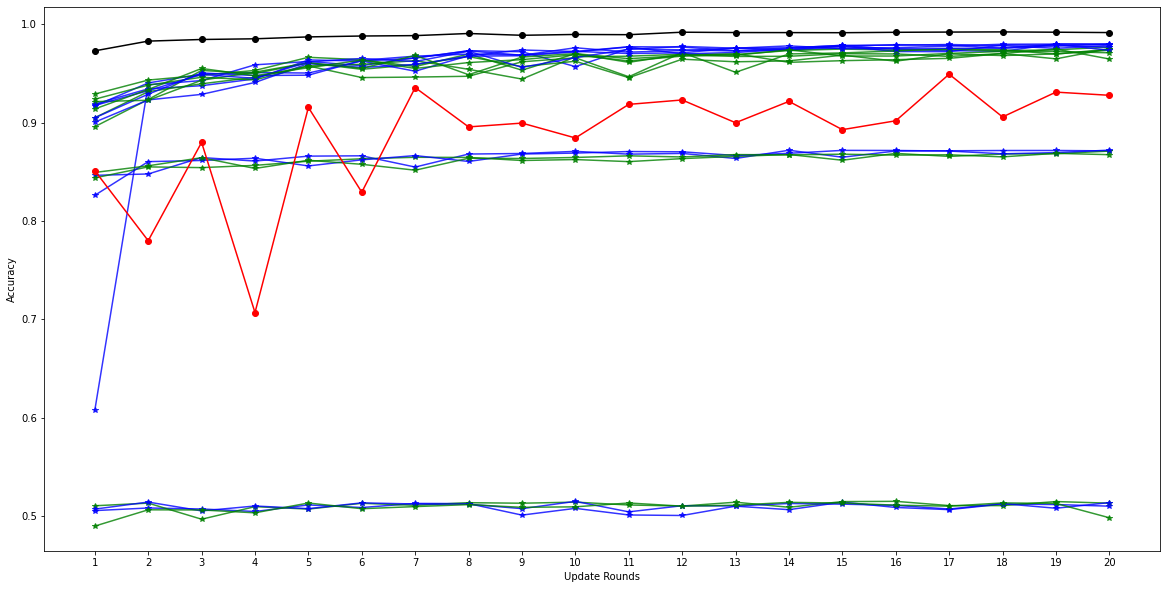

In [ ]:
# Control + Shift + L

update_rounds=20
t = np.arange(0, update_rounds)

pserver = []
pgod = []
pclient = [[] for i in range(n)]
pself = [[] for i in range(n)]

for i in range(n):
  for j in range(update_rounds):
    pclient[i].append(client_accuracy[i][j][0]['accuracy'])

for i in range(n):
  for j in range(update_rounds):
    pself[i].append(self_accuracy[i][j][0]['accuracy'])

for i in range(update_rounds):
  pserver.append(server_accuracy[i][0]['accuracy'])

for i in range(update_rounds):
  pgod.append(god_accuracy[i][0]['accuracy'])



plt.figure(figsize=(20,10))
plt.xticks(t,t+1)
for i in range(n):
  plt.plot(t, pclient[i], alpha=0.8, marker='*', c='b')
  plt.plot(t, pself[i], alpha=0.8, marker='*', c='g')
plt.plot(t, pserver, marker='o', c='r')
plt.plot(t, pgod, marker='o', c='black')
plt.xlabel('Update Rounds')
plt.ylabel('Accuracy')
plt.show()


# RL Based Weighting

In [ ]:
# Using torch for GPU

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset,DataLoader

class IDS(nn.Module):
  def __init__(self):
    super(IDS, self).__init__()
    self.dp = nn.Dropout(p=0.2)

    self.fc1 = nn.Linear(122,100)
    self.fc2 = nn.Linear(100,70)
    self.fc3 = nn.Linear(70,30)
    self.fc4 = nn.Linear(30,15)
    self.fc5 = nn.Linear(15,10)
    self.fc6 = nn.Linear(10,5)
    
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = self.dp(x)
    x = torch.relu(self.fc2(x))
    x = self.dp(x)
    x = torch.relu(self.fc3(x))
    x = self.dp(x)
    x = torch.relu(self.fc4(x))
    x = self.dp(x)
    x = torch.relu(self.fc5(x))
    x = self.dp(x)
    x = self.fc6(x)
    return x


class DQN(nn.Module):
  def __init__(self):
    super(DQN, self).__init__()
    self.dp = nn.Dropout(p=0.2)

    self.fc1 = nn.Linear(50,30)
    self.fc2 = nn.Linear(30,20)
    self.fc3 = nn.Linear(20,10)
    self.sm = nn.Softmax(dim=1)
    
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = self.dp(x)
    x = torch.relu(self.fc2(x))
    x = self.dp(x)
    x = torch.relu(self.fc3(x))
    x = self.sm(x)
    return x

In [ ]:
# Creating the updated_client_models for the DQN dataset generation process


server_model = IDS()
updated_client_models = []
available_clients_id = []
self_model = [IDS() for i in range(n)]
num_available = 0
dqn = DQN()
device = 'cpu'

num_poisoned = 2
poisoned_clients = [0,1]


# Preparing the data for torch model
client_torch_data = []
for i in range(n):
  x, y = client_data[i]

  # if(i in poisoned_clients):
  #   for k in range(len(y)):
  #     if(y[k]>0):
  #       y[k]=0

  x = torch.from_numpy(x).type(torch.float)
  y = torch.from_numpy(y).type(torch.LongTensor)

  train_data = TensorDataset(x,y)

  train_loader = DataLoader(train_data, shuffle = True, batch_size = 512)

  client_torch_data.append(train_loader)


x = torch.from_numpy(X_test).type(torch.float)
y = torch.from_numpy(Y_test).type(torch.LongTensor)

test_data = TensorDataset(x,y)

test_loader = DataLoader(test_data, shuffle = True, batch_size = 512)


update_rounds = 5
ep = 5
bs = 512
lr = 0.1
decay = 1.0


# def RL_calc_weight(local_models):

#   size = 10
#   test_set = np.random.choice(X_test, 10000)
#   test_set = torch.from_numpy(test_set).type(torch.float)
#   states = []
#   temp = IDS()

#   for i in range(n):
#     temp.load_state_dict(local_models[i])
#     states.append(temp(test_set))

  

def train_torch_model(model, train_loader, test_loader):
  epochs = 5
  loss_fn = nn.CrossEntropyLoss()
  learn = 0.001
  optim = torch.optim.Adam(model.parameters(),lr=learn)
  train_acc = []
  train_loss = []
  test_acc = []
  test_loss = []

  for ep in range(epochs):
    # if(ep==50):
    #   learn = learn * 0.1
    #   optim = torch.optim.Adam(model.parameters(),lr=learn)
    print("---------------------------------------------------")
    print(f"Epoch Number {ep}")
    correct = 0
    total = 0
    for phase in ['train', 'validate']:

      if(phase=='train'):
        model.train(True)
        loader = train_loader
      elif(phase=='validate'):
        model.train(False)
        loader = test_loader

      for batch, (X, y) in enumerate(loader):
        # if(batch%100==0):
        #   print(f"Handing batch number: {batch} in phase {phase}")
        X = X.to(device)
        y = y.to(device)
        # print(f"length: {y.size()}")
        y_pred = model(X).squeeze()

        # print(f"Y_pred: {y_pred.is_cuda}")
        loss = loss_fn(y_pred, y)

        if(phase=='train'):
          optim.zero_grad()
          loss.backward()
          optim.step()
          y_pred = torch.max(y_pred, 1).indices
          correct += (y_pred==y).sum()
          total += len(y)

        elif(phase=='validate'):
          y_pred = torch.max(y_pred, 1).indices
          #print(f"Testing Loss = {loss_fn(y_pred, y)}")
          correct += (y_pred==y).sum()
          total += len(y)

      acc = 100 * (correct/total)
      if(phase=='validate'): 
        test_acc.append(acc.item())
        test_loss.append(loss.item())
        print(f"Accuracy of the validation set {acc}")
      elif(phase=='train'):
        train_acc.append(acc.item())
        train_loss.append(loss.item())
        print(f"Accuracy of the train set {acc}")

  return model

def get_stats(y_true, y_pred):
  return [classification_report(y_true, y_pred, output_dict=True)]
  #return [accuracy_score(Y_test, y_pred), recall_score(Y_test, y_pred), f1_score(Y_test, y_pred), precision_score(Y_test, y_pred)]

def get_update(current_weights, i, lr):
  train_loader = client_torch_data[i]

  temp_model = IDS()
  temp_model.load_state_dict(current_weights)

  print("----------------------------------")
  print(f"Client ID: {i}   {len(y)}")
  print("Training the FL model: ")

  temp_model = train_torch_model(temp_model, train_loader, test_loader)
  self_model[i] = train_torch_model(self_model[i], train_loader, test_loader)

  # temp_model.fit(x,y, batch_size=bs, epochs=ep, validation_data = (X_test, Y_test), verbose=True)

  # print("Private Model: ")
  # self_model[i].fit(x,y, batch_size=bs, epochs=ep,validation_data = (X_test, Y_test), verbose=True)

  # y_pred = 1.0 * (temp_model.predict(X_test) > 0.5)
  y_pred = torch.max(temp_model(torch.from_numpy(X_test).type(torch.float)),1).indices.numpy()
  # print(classification_report(Y_test, y_pred))

  y_pred_self = torch.max(self_model[i](torch.from_numpy(X_test).type(torch.float)),1).indices.numpy()
  # print(classification_report(Y_test, y_pred_self))

  return temp_model.state_dict(), 10000, get_stats(Y_test, y_pred), get_stats(Y_test, y_pred_self)

client_accuracy = [[] for j in range(n)]
self_accuracy = [[] for j in range(n)]
server_accuracy = []

for i in range(update_rounds):
  print(" ")
  print("*******************************")
  print(f"Update Round: {i}")
  # num_available = random.randint(1,n)
  num_available = n
  print(f"No of clients selected for this round: {num_available}")
  # available_clients_id = random.sample(range(0, n), num_available)
  available_clients_id = [k for k in range(n)]

  # if(i==0): # Only for the first round
  #   poisoned_clients = random.sample(available_clients_id, num_poisoned)

  #   print(f"Poisoned Clients are: {poisoned_clients}")

  #   for j in range(0,num_poisoned):
  #     x,y = client_data[poisoned_clients[j]]

  #     # Poisoning 50% of the data using label flipping
  #     count = 0
  #     for k in range(len(y)):
  #       if y[k]>0:
  #         if(random.random() < 0.50):
  #           #print(f"inverting the labels {y[k]} --> ", end='')
  #           count += 1
  #           y[k] = 0.0
    
  #     client_data[poisoned_clients[j]][1] = y

  global_weights = server_model.state_dict()
  updated_client_models = []
  client_data_sizes = []

  for j in available_clients_id:
    local_weights, local_data_size, stats, self_stats = get_update(global_weights, j, lr)

    # if j in poisoned_clients:
    #   local_weights = -20 * local_weights

    updated_client_models.append(local_weights)
    client_data_sizes.append(local_data_size)
    client_accuracy[j].append(stats)
    self_accuracy[j].append(self_stats)
  
  client_data_sizes = np.array(client_data_sizes)
  total_data_size = np.sum(client_data_sizes)
  client_data_sizes = 10 * client_data_sizes/total_data_size

  updated_client_models = np.array(updated_client_models)

  #client_data_sizes = RL_calc_weights(updated_client_models)

  keys = list(updated_client_models[0].keys())
  for j in range(len(updated_client_models)):
    for k in keys:
      updated_client_models[j][k] = client_data_sizes[j] * (updated_client_models[j][k].numpy())

  avg_weights = dict()

  for j in keys:
    temp_sum = updated_client_models[0][j]
    for k in range(1,len(updated_client_models)):
      temp_sum += updated_client_models[k][j]
    avg_weights[j] = torch.from_numpy(temp_sum/10).type(torch.float)

  server_model.load_state_dict(avg_weights)

  # y_pred = 1.0 * (server_model.predict(X_test) > 0.5)
  y_pred = torch.max(server_model(torch.from_numpy(X_test).type(torch.float)),1).indices.numpy()

  server_accuracy.append(get_stats(Y_test, y_pred))
  print(f"Classification Accuracy: {accuracy_score(Y_test, y_pred)}")

  lr = lr * decay

 
*******************************
Update Round: 0
No of clients selected for this round: 10
----------------------------------
Client ID: 0   29704
Training the FL model: 
---------------------------------------------------
Epoch Number 0
Accuracy of the train set 0.0
Accuracy of the validation set 23.927730560302734
---------------------------------------------------
Epoch Number 1
Accuracy of the train set 66.60157775878906
Accuracy of the validation set 56.812931060791016
---------------------------------------------------
Epoch Number 2
Accuracy of the train set 99.46131896972656
Accuracy of the validation set 67.76568603515625
---------------------------------------------------
Epoch Number 3
Accuracy of the train set 99.62965393066406
Accuracy of the validation set 67.82179260253906
---------------------------------------------------
Epoch Number 4
Accuracy of the train set 99.97306823730469
Accuracy of the validation set 67.9362564086914
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------------------------------
Client ID: 1   29704
Training the FL model: 
---------------------------------------------------
Epoch Number 0
Accuracy of the train set 0.0
Accuracy of the validation set 23.927730560302734
---------------------------------------------------
Epoch Number 1
Accuracy of the train set 66.15716552734375
Accuracy of the validation set 56.664794921875
---------------------------------------------------
Epoch Number 2
Accuracy of the train set 99.42764282226562
Accuracy of the validation set 67.75445556640625
---------------------------------------------------
Epoch Number 3
Accuracy of the train set 99.67678833007812
Accuracy of the validation set 67.83750915527344
---------------------------------------------------
Epoch Number 4
Accuracy of the train set 99.90573120117188
Accuracy of the validation set 67.91381072998047
---------------------------------------------------
Epoch Number 0
Accuracy of the train set 41.47868728637695
Accuracy of the validati

In [ ]:
keys = list(updated_client_models[0].keys())
for j in range(len(updated_client_models)):
  for k in keys:
    updated_client_models[j][k] = torch.from_numpy(updated_client_models[j][k]).type(torch.float)

In [ ]:
import pickle
pickle.dump(updated_client_models, open("umc.pkl","wb"))

In [ ]:
umc = pickle.load(open("umc.pkl","rb"))

In [ ]:
# DQN Dataset Generation Process

xx = torch.from_numpy(X_test[0:10000]).type(torch.float)
yy = Y_test[0:10000]
sm = nn.Softmax(dim=1)

dqnx = np.zeros((10000,10))

temp = IDS()
for i in range(len(umc)):
  temp.load_state_dict(umc[i])
  temp_pred = sm(temp(xx)).detach().numpy()
  for j in range(10000):
    dqnx[j][i] = temp_pred[j][yy[j]]
  print(accuracy_score(Y_test, np.argmax(temp(torch.from_numpy(X_test).type(torch.float)).detach().numpy(),1)))

0.5969903043361163
0.5223202262321572
0.5062617829248586
0.8404591974144896
0.839112577430649
0.49919202800969564
0.8411661729060059
0.8401225424185295
0.8382372744411527
0.841368165903582


In [ ]:
compromised = [0,1,2,5]
safe = [3,4,6,7,8,9]

In [ ]:
class DQN(nn.Module):
  def __init__(self):
    super(DQN, self).__init__()
    self.dp = nn.Dropout(p=0.2)

    self.fc1 = nn.Linear(10,30)
    self.fc2 = nn.Linear(30,20)
    self.fc3 = nn.Linear(20,10)
    self.sm = nn.Softmax(dim=1)
    
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = self.dp(x)
    x = torch.relu(self.fc2(x))
    x = self.dp(x)
    x = torch.relu(self.fc3(x))
    x = self.sm(x)
    return x

In [ ]:

# def create_model_dqn():
#   input = Input(shape=[122], name='input')
#   d1 = Dense(10, activation='relu', name='dense1')(input)
#   dr1 = Dropout(0.2, name='dropout1')(d1)
#   d2 = Dense(30, activation='relu',  name='dense2')(dr1)
#   dr2 = Dropout(0.2, name='dropout2')(d2)
#   d3  = Dense(20, activation='relu', name='dense3')(dr2)
#   dr3 = Dropout(0.2, name='dropout3')(d3)
#   output  = Dense(10, activation='softmax', name='dense4')(dr3)

#   model = tf.keras.Model(inputs = input, outputs = output)

#   opt = tf.keras.optimizers.Adam(learning_rate=0.01)
#   model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

#   return model

In [ ]:
def generate_dataset(samplex, sd):
  temp = DQN()
  temp.load_state_dict(sd)

  temp_pred = np.argmax(temp(torch.from_numpy(samplex).type(torch.float)).detach().numpy(),1)

  reward = []

  for i in temp_pred:
    reward.append(np.random.choice(safe))
    # if(i in compromised):
    #   reward.append(np.random.choice(safe))
    # else:
    #   if(random.random() > 0.5):
    #     reward.append(i)
    #   else:  
    #     reward.append(np.random.choice(safe))
  
  reward = np.array(reward).astype('float32')

  return reward

In [ ]:
ep = 3
batches = 10
batch_size = int(10000/batches)
dqnm = DQN()
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(dqnm.parameters(),lr=0.02)
hist = []

for i in range(ep):
  print(f"------------ Epoch {i} ------------------")
  for j in range(batches):
    cb = dqnx[j*batch_size:(j+1)*batch_size]
    r = torch.from_numpy(generate_dataset(cb, dqnm.state_dict())).type(torch.LongTensor)
    print(r)
    y_pred = dqnm(torch.from_numpy(cb).type(torch.float))
    
    loss = loss_fn(y_pred, r)
    optim.zero_grad()
    loss.backward()
    optim.step()

    hist.append(torch.sum(y_pred,0))



------------ Epoch 0 ------------------
tensor([9, 6, 8, 8, 7, 6, 9, 6, 4, 9, 9, 7, 6, 7, 9, 9, 6, 9, 8, 8, 9, 4, 6, 9,
        8, 3, 4, 4, 4, 6, 6, 3, 3, 4, 4, 8, 7, 6, 8, 3, 9, 8, 9, 8, 4, 7, 6, 4,
        6, 7, 4, 9, 3, 3, 7, 4, 4, 9, 4, 3, 7, 4, 8, 9, 6, 7, 4, 8, 4, 9, 3, 9,
        9, 8, 3, 3, 6, 6, 6, 3, 9, 7, 8, 7, 7, 3, 6, 3, 6, 8, 3, 6, 9, 4, 9, 7,
        7, 4, 3, 9, 4, 3, 4, 8, 6, 4, 6, 8, 4, 4, 8, 6, 8, 9, 8, 6, 6, 9, 3, 4,
        9, 4, 4, 3, 6, 3, 8, 9, 8, 6, 8, 9, 3, 7, 9, 6, 7, 3, 8, 9, 3, 6, 9, 7,
        4, 7, 6, 4, 6, 7, 7, 4, 3, 8, 8, 8, 7, 7, 8, 9, 7, 9, 6, 6, 9, 4, 9, 7,
        7, 6, 9, 3, 6, 8, 9, 8, 8, 8, 7, 4, 4, 9, 9, 6, 7, 7, 7, 7, 6, 8, 3, 9,
        8, 4, 7, 8, 4, 8, 7, 4, 8, 9, 8, 9, 7, 4, 4, 6, 8, 4, 3, 9, 6, 3, 8, 3,
        9, 8, 7, 3, 8, 7, 3, 4, 6, 8, 4, 8, 6, 3, 3, 7, 9, 6, 6, 6, 7, 9, 8, 3,
        3, 7, 9, 9, 8, 4, 8, 3, 6, 4, 3, 9, 3, 8, 8, 7, 4, 7, 8, 3, 6, 3, 3, 7,
        8, 6, 3, 4, 8, 7, 4, 6, 3, 4, 4, 9, 6, 9, 3, 9, 4, 4, 8, 9, 6, 7, 6, 4,


In [ ]:
ll = []
for k in hist:
  ll.append(k.detach().numpy()/batch_size)
ll = np.array(ll)

In [ ]:
ll

array([[0.10679101, 0.10015474, 0.09590106, 0.09581777, 0.10845466,
        0.09610325, 0.09519964, 0.09520359, 0.11035558, 0.0960187 ],
       [0.09515899, 0.09511897, 0.09511206, 0.09710518, 0.125699  ,
        0.09574127, 0.09511206, 0.09511206, 0.11066498, 0.09517544],
       [0.09232765, 0.09232765, 0.09232765, 0.10155366, 0.131767  ,
        0.09289485, 0.09232765, 0.09232765, 0.11980269, 0.09234358],
       [0.08800174, 0.08800174, 0.08800174, 0.11015204, 0.14166877,
        0.08836452, 0.08800381, 0.08800174, 0.13171427, 0.08808963],
       [0.08179091, 0.08178968, 0.08178968, 0.12228294, 0.15252377,
        0.08205406, 0.08217312, 0.08178968, 0.15172315, 0.08208302],
       [0.07253513, 0.07250121, 0.07250121, 0.13927425, 0.1721443 ,
        0.07261459, 0.0745408 , 0.07250121, 0.1774448 , 0.0739425 ],
       [0.06015925, 0.06008423, 0.06008423, 0.16193597, 0.19633485,
        0.06013541, 0.06497654, 0.06008423, 0.21226296, 0.06394232],
       [0.04556181, 0.04547733, 0.0454773

In [ ]:
pp = [[0.10679101, 0.10015474, 0.09590106, 0.09581777, 0.10845466,
        0.09610325, 0.09519964, 0.09520359, 0.11035558, 0.0960187 ],
       [0.09515899, 0.09511897, 0.09511206, 0.09710518, 0.125699  ,
        0.09574127, 0.09511206, 0.09511206, 0.11066498, 0.09517544],
       [0.09232765, 0.09232765, 0.09232765, 0.10155366, 0.131767  ,
        0.09289485, 0.09232765, 0.09232765, 0.11980269, 0.09234358],
       [0.08800174, 0.08800174, 0.08800174, 0.11015204, 0.14166877,
        0.08836452, 0.08800381, 0.08800174, 0.13171427, 0.08808963],
       [0.08179091, 0.08178968, 0.08178968, 0.12228294, 0.15252377,
        0.08205406, 0.08217312, 0.08178968, 0.15172315, 0.08208302],
       [0.07253513, 0.07250121, 0.07250121, 0.13927425, 0.1721443 ,
        0.07261459, 0.0745408 , 0.07250121, 0.1774448 , 0.0739425 ],
       [0.06015925, 0.06008423, 0.06008423, 0.16193597, 0.19633485,
        0.06013541, 0.06497654, 0.06008423, 0.21226296, 0.06394232],
       [0.04556181, 0.04547733, 0.04547733, 0.18363883, 0.22441046,
        0.04549964, 0.05347359, 0.04547733, 0.25520465, 0.05577904],
       [0.03328716, 0.0332266 , 0.0332266 , 0.20298691, 0.25416493,
        0.03323904, 0.04311072, 0.0332266 , 0.28298843, 0.05054301],
       [0.02437932, 0.02431976, 0.02431976, 0.19681796, 0.28453773,
        0.02431976, 0.03419685, 0.02431976, 0.3134206 , 0.04936849],
       [0.01559016, 0.0155306 , 0.0155306 , 0.19952324, 0.312671  ,
        0.01553102, 0.02546182, 0.0155306 , 0.3416285 , 0.04300251],
       [0.01183828, 0.01175995, 0.01175995, 0.2212826 , 0.3627779 ,
        0.01175995, 0.02195752, 0.01175995, 0.2942742 , 0.0408297 ],
       [0.00860583, 0.00860583, 0.00860583, 0.25684503, 0.3995552 ,
        0.00860583, 0.01859458, 0.00860583, 0.24469827, 0.03727773],
       [0.0062738 , 0.0062738 , 0.0062738 , 0.30081713, 0.4628677 ,
        0.0062738 , 0.0176146 , 0.0062738 , 0.15233985, 0.03499172],
       [0.00523323, 0.00522935, 0.0052447 , 0.30977237, 0.46574765,
        0.00522935, 0.02007161, 0.00522935, 0.13895206, 0.03929036],
       [0.0043685 , 0.00436609, 0.00436609, 0.4184171 , 0.3614997 ,
        0.00436609, 0.02230828, 0.00436609, 0.12993969, 0.04600239],
       [0.00405182, 0.00404808, 0.00404936, 0.43453825, 0.31527397,
        0.00404808, 0.02545349, 0.00404808, 0.1393807 , 0.0651082 ],
       [0.00292042, 0.00291622, 0.00291622, 0.37042853, 0.28907245,
        0.00291622, 0.02966238, 0.00291622, 0.19179188, 0.10445948],
       [0.00310176, 0.00310176, 0.00310176, 0.29914203, 0.24134065,
        0.00310176, 0.04020037, 0.00310176, 0.22961923, 0.17418894],
       [0.00296023, 0.00295995, 0.00295995, 0.2090221 , 0.20669612,
        0.00295995, 0.05028453, 0.00295995, 0.25604713, 0.26315004],
       [0.00194214, 0.00194112, 0.00194112, 0.13299352, 0.18222369,
        0.00194112, 0.06870867, 0.00194112, 0.19871938, 0.40764815],
       [0.00185554, 0.00185554, 0.00185554, 0.1060641 , 0.20665242,
        0.00185554, 0.1037014 , 0.00185554, 0.14432324, 0.42998114],
       [0.0016636 , 0.0016636 , 0.0016636 , 0.0993701 , 0.26773816,
        0.0016636 , 0.15885642, 0.0016636 , 0.13295156, 0.3327658 ],
       [0.00159319, 0.00159171, 0.00159171, 0.09192128, 0.2696563 ,
        0.00159171, 0.27692783, 0.00159171, 0.11881434, 0.23472023],
       [0.00152659, 0.00152645, 0.00152645, 0.07870431, 0.21515879,
        0.00152645, 0.44058666, 0.00152645, 0.10421548, 0.15370236],
       [0.00161946, 0.00161861, 0.00161861, 0.08073088, 0.21960434,
        0.00161861, 0.46764782, 0.00161861, 0.11026781, 0.11365525],
       [0.00184502, 0.00184464, 0.00184464, 0.09631995, 0.2809251 ,
        0.00184464, 0.3660652 , 0.00184464, 0.1508706 , 0.09659551],
       [0.00183337, 0.00183326, 0.00183326, 0.1086902 , 0.3316245 ,
        0.00183326, 0.26139596, 0.00183326, 0.2101155 , 0.07900742],
       [0.00241312, 0.00241312, 0.00241312, 0.12510368, 0.33457494,
        0.00241312, 0.18744901, 0.00241312, 0.26281616, 0.07799064],
       [0.00275814, 0.00275806, 0.00275806, 0.14353803, 0.31372368,
        0.00275806, 0.13364753, 0.00275806, 0.3202092 , 0.07509117]]

In [ ]:
pp = np.array(pp)

In [ ]:
m1 = []
m2 = []
c1 = []
c2 = []
pp = list(pp)
for i in pp:
  j = i.copy()
  j.sort()
  m1.append(j[-1])
  m2.append(j[-2])
  c1.append(np.argmax(i))
  k = 0
  for y in range(len(i)):
    if i[y]==m2[-1]:
      k=y
  c2.append(k)
m1 = np.array(m1)
m2 = np.array(m2)
Counter(c1), Counter(c2)

(Counter({3: 4, 4: 10, 6: 4, 8: 7, 9: 5}), Counter({3: 3, 4: 17, 6: 1, 8: 9}))

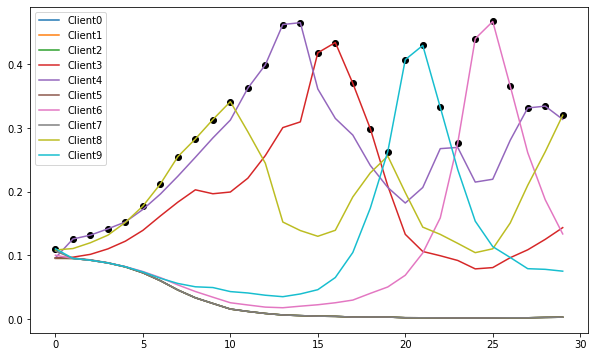

In [ ]:
plt.figure(figsize=(10,6))
pp = np.array(pp)
for i in range(10):
  cname = "Client" + str(i)
  plt.plot(np.arange(0,len(pp)), pp[:,i], label=cname)
plt.scatter(np.arange(0,len(pp)), m1, marker='o', c='black')
# plt.scatter(np.arange(0,len(pp)), m2, marker='*', c='black')
plt.legend()
plt.show()

In [ ]:
# # Generate dataset for the DQN

# state = []
# temp = IDS()
# xx = torch.from_numpy(X_test[0:10000]).type(torch.float)
# yy = torch.from_numpy(Y_test[0:10000]).type(torch.LongTensor)
# yy = torch.reshape(yy, (10000,1)).type(torch.LongTensor)

# for i in range(n):
#   temp.load_state_dict(umc[i])
#   state.append(temp(xx))

# state = torch.cat(state,1)

# state = state.detach().numpy()
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# state = sc.fit_transform(state)
# state = torch.from_numpy(state).type(torch.float)

# state = torch.cat([state,xx],1)
# state = state.detach()
# output = torch.cat([yy,torch.ones(state.size()[0],1)],1)
# output = output.detach()
# output = output.type(torch.LongTensor)
# train_data = TensorDataset(state, output)
# train_loader = DataLoader(train_data, shuffle = True, batch_size = 50)

In [ ]:
def check_temp(temp):
  yp = torch.max(temp(torch.from_numpy(X_test).type(torch.float)),1).indices.numpy()
  print(f"Accuracy of the model = {accuracy_score(Y_test,yp)}")

In [ ]:
def get_reward(pred, yv, x_actual):

  
  avg_weights = dict()
  dif = torch.zeros((pred.size()[0],5))
  sm = nn.Softmax(dim=1)

  for l in range(pred.size()[0]):

    #print(f"Element: {l} ******")

    umc = pickle.load(open("umc.pkl","rb"))
    keys = list(umc[0].keys())

    w = pred[l]
    # w = torch.reshape(w,(1,10))
    # #print(torch.max(w,1).indices)
    # top = torch.max(w,1).indices[0]

    temp = IDS()
    # temp.load_state_dict(umc[top])
    temp.requires_grad = False
    # #check_temp(temp)

    # y_p = sm(temp(x_actual[l]).reshape(1,5))[0]

    # dif[l] = y_p[yv[l]]

    for j in range(len(umc)):
      for k in keys:
        umc[j][k] = torch.mul(w[j],umc[j][k])


    for j in list(umc[0].keys()):
      temp_sum = umc[0][j]
      for k in range(1,len(umc)):
        temp_sum += umc[k][j]
      avg_weights[j] = temp_sum

    temp.load_state_dict(avg_weights)
    #check_temp(temp)

    #print(x_actual[l])
    y_p = temp(x_actual[l]).reshape(1,5)
    #print(y_p, yv[l], y_p[yv[l]])
    # yt = yv[l].clone()
    # y_tt = yv[l].detach()
    # print(yv[l], y_p, torch.sum(yv[l]*y_p))
    dif[l] = y_p
  
  return dif

In [ ]:
w = torch.rand(1,10)
w, torch.max(w,1).indices

(tensor([[0.9581, 0.2333, 0.8225, 0.0513, 0.8314, 0.2828, 0.9671, 0.1864, 0.7772,
          0.3084]]), tensor([6]))

In [ ]:
def train_torch_model(model, train_loader):
  model.requires_grad = True
  epochs = 1
  loss_fn = nn.CrossEntropyLoss()
  learn = 0.05
  optim = torch.optim.Adam(model.parameters(),lr=learn)
  weights = []
  track_rew = []
  www = []
  for ep in range(epochs):
    print("---------------------------------------------------")
    print(f"Epoch Number {ep}")
    correct = 0
    total = 0
    for phase in ['train']:

      if(phase=='train'):
        model.train(True)
        loader = train_loader

      for batch, (X, y) in enumerate(loader):
        print(f"    Batch No: {batch}", end= "    ")
        xa = X[:,0:50]
        xi = X[:, 50:]

        pred = model(xa)
        www.append(pred)
        y_reward = get_reward(pred, y[:,0].type(torch.LongTensor), xi)
        loss = loss_fn(y_reward, y[:,1])
        track_rew.append(loss.item())
        
        if(phase=='train'):
          optim.zero_grad()
          loss.backward()
          optim.step()
        print(track_rew[-1])
  return track_rew, www
torch.autograd.set_detect_anomaly(True)
dqn = DQN()
rew, www = train_torch_model(dqn, train_loader)

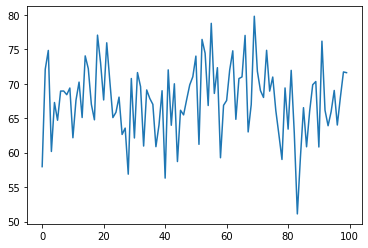

In [ ]:
t = np.arange(len(rew))
plt.plot(t, rew)
plt.show()

In [ ]:
www = torch.cat(www[0:-1],1)
p = www.detach().clone()
p = p.numpy()

In [ ]:
p

array([[0.09541942, 0.09541942, 0.10478008, ..., 0.10926662, 0.09330255,
        0.09330255],
       [0.09349748, 0.09349748, 0.11320123, ..., 0.11241484, 0.09245093,
        0.09245093],
       [0.09496877, 0.09496877, 0.10745606, ..., 0.11640812, 0.09407779,
        0.09417417],
       ...,
       [0.09306332, 0.09306332, 0.11705934, ..., 0.11492259, 0.0942274 ,
        0.09506886],
       [0.09433073, 0.09433073, 0.10613968, ..., 0.11235402, 0.09408156,
        0.09456938],
       [0.09419014, 0.09419014, 0.11015394, ..., 0.11559754, 0.09409679,
        0.09409679]], dtype=float32)

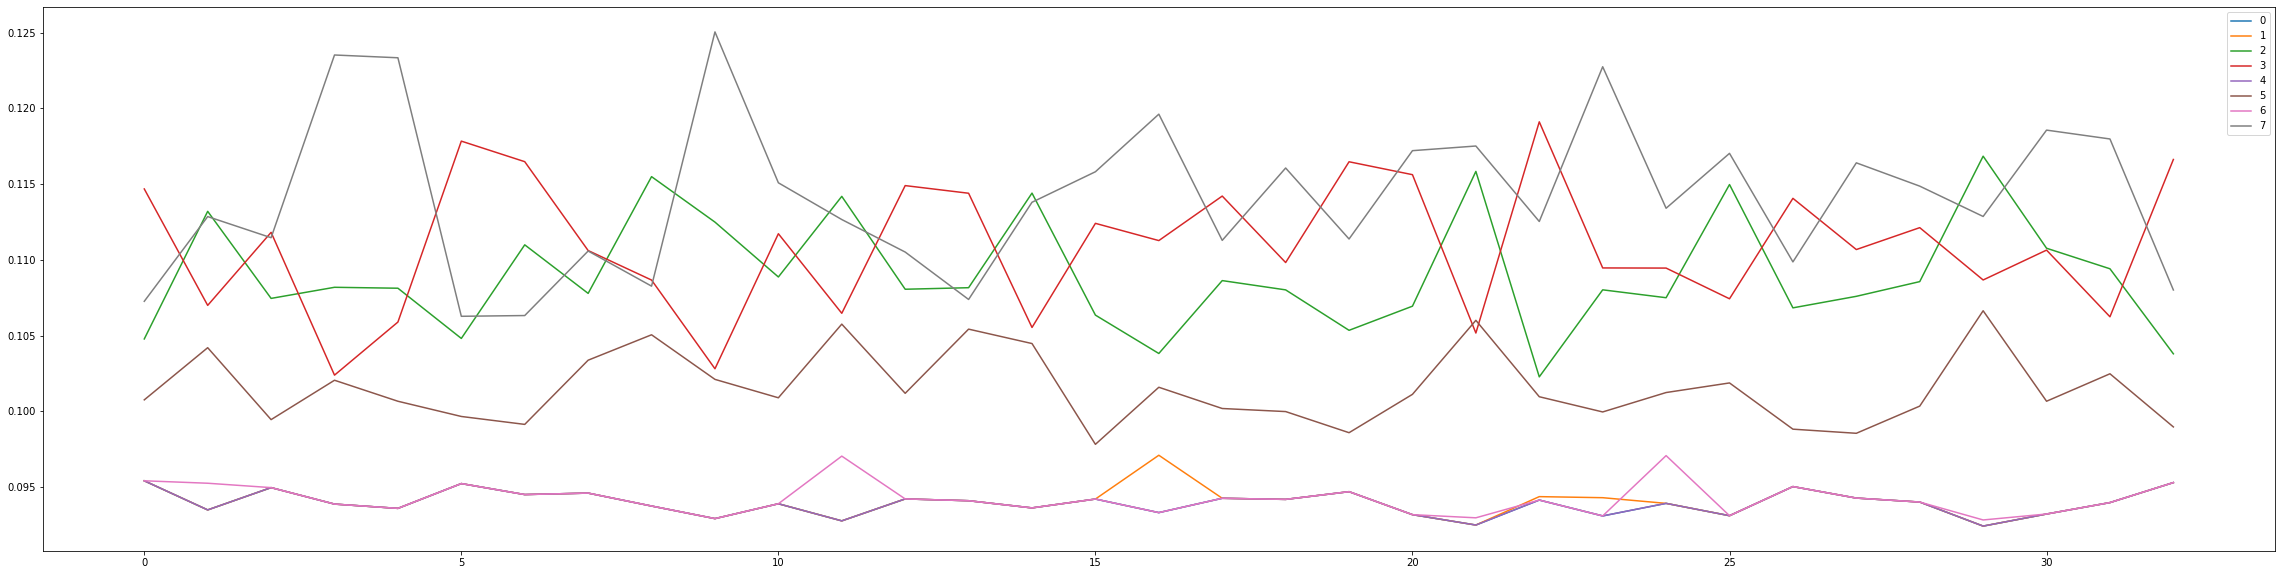

In [ ]:
cl = [[] for i in range(8)]
for i in range(int(len(p)/3)):
  for j in range(8):
    cl[j].append(p[i][j])

t = np.arange(0,len(cl[0]))

plt.figure(figsize=(40,10))
for i in range(8):
  plt.plot(t, cl[i],label=i)
plt.legend()
plt.show()

In [ ]:
Accuracy of the model = 0.5934217613789389
Accuracy of the model = 0.516664422300027
Accuracy of the model = 0.49865338001615944
Accuracy of the model = 0.8431861028817668
Accuracy of the model = 0.84130083490439
Accuracy of the model = 0.49461352006463777
Accuracy of the model = 0.8434890923781309
Accuracy of the model = 0.8433880958793428
Accuracy of the model = 0.8382036089415567
Accuracy of the model = 0.843926743872879

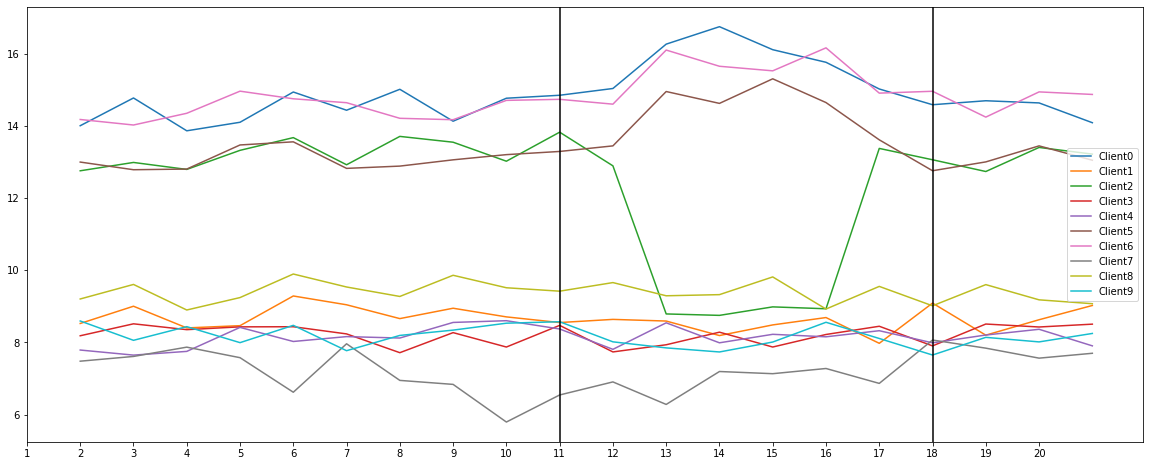

In [ ]:
# Creating the values

vv = pclient.copy()

weight = [[] for i in range(n)]
for i in range(20):
  sum = 0
  for j in range(n):
    sum += vv[j][i]
  for j in range(n):
    weight[j].append(100 * vv[j][i]/sum + random.random())

for i in range(11,15):
  weight[2][i] -= 4.2
  weight[0][i] += 1.7
  weight[5][i] += 1.6
  weight[6][i] += 1.3

t = np.arange(20)
plt.figure(figsize=(20,8))
for i in range(n):
  plt.plot(t+1, weight[i], label='Client'+str(i))
plt.xticks(t,t+1)
plt.axvline(x=10,c='black')
plt.axvline(x=17,c='black')
plt.legend()
plt.show()

In [ ]:
temp = IDS()
avg_weights = dict()
umc = pickle.load(open("umc.pkl","rb"))
keys = list(umc[0].keys())
for j in range(len(umc)):
  for k in keys:
    #print(umc[j][k], w[j])
    umc[j][k] = torch.mul(w[j],umc[j][k])
    #print(umc[j][k])
for j in list(umc[0].keys()):
  temp_sum = umc[0][j]
  for k in range(1,len(umc)):
    temp_sum += umc[k][j]
  avg_weights[j] = temp_sum

temp.load_state_dict(avg_weights)

check_temp(temp)

Accuracy Score: 0.8215728521411257


In [ ]:
temp_sum = umc[0]['fc1.weight'] + umc[1]['fc1.weight']
print(temp_sum[0][0].detach().numpy(), umc[1]['fc1.weight'][0][0].detach().numpy(), umc[0]['fc1.weight'][0][0].detach().numpy())

-0.0 -0.0 -0.0


In [ ]:
print(umc[0]['fc1.weight'])

tensor([[-0., 0., 0.,  ..., -0., -0., -0.],
        [0., 0., 0.,  ..., -0., -0., -0.],
        [-0., 0., 0.,  ..., -0., -0., -0.],
        ...,
        [-0., 0., 0.,  ..., -0., 0., 0.],
        [-0., -0., 0.,  ..., -0., -0., 0.],
        [0., 0., 0.,  ..., -0., 0., 0.]], grad_fn=<AddBackward0>)


In [ ]:
umc = updated_client_models
print(torch.mul(w[0],umc[0]['fc1.weight']), umc[0]['fc1.weight'])

tensor([[-0.0500,  0.0919,  0.0622,  ..., -0.3261,  0.3352,  0.1348],
        [ 0.0679, -0.0065,  0.1404,  ..., -0.2294, -0.1779, -0.1468],
        [-0.0223, -0.0050, -0.0058,  ..., -0.0079, -0.0275, -0.0128],
        ...,
        [-0.0312,  0.0854,  0.1887,  ..., -0.3049, -0.0573, -0.1163],
        [ 0.0713,  0.1356, -0.1290,  ..., -0.1642,  0.2942,  0.1239],
        [ 0.0514,  0.0846, -0.2074,  ...,  0.1561, -0.4407, -0.3395]]) tensor([[-0.5003,  0.9188,  0.6221,  ..., -3.2613,  3.3523,  1.3479],
        [ 0.6787, -0.0647,  1.4036,  ..., -2.2940, -1.7794, -1.4684],
        [-0.2234, -0.0501, -0.0585,  ..., -0.0787, -0.2752, -0.1282],
        ...,
        [-0.3116,  0.8544,  1.8867,  ..., -3.0489, -0.5735, -1.1630],
        [ 0.7133,  1.3556, -1.2897,  ..., -1.6420,  2.9415,  1.2386],
        [ 0.5142,  0.8462, -2.0740,  ...,  1.5607, -4.4074, -3.3953]])


In [ ]:
updated_client_models[0]['fc1.weight']

tensor([[-0.5003,  0.9188,  0.6221,  ..., -3.2613,  3.3523,  1.3479],
        [ 0.6787, -0.0647,  1.4036,  ..., -2.2940, -1.7794, -1.4684],
        [-0.2234, -0.0501, -0.0585,  ..., -0.0787, -0.2752, -0.1282],
        ...,
        [-0.3116,  0.8544,  1.8867,  ..., -3.0489, -0.5735, -1.1630],
        [ 0.7133,  1.3556, -1.2897,  ..., -1.6420,  2.9415,  1.2386],
        [ 0.5142,  0.8462, -2.0740,  ...,  1.5607, -4.4074, -3.3953]])

In [ ]:
[target, torch.ones(states.size()[0], requires_grad=True)], target.size(), states.size()[0]

([tensor([1, 0, 0,  ..., 0, 2, 0]),
  tensor([1., 1., 1.,  ..., 1., 1., 1.], requires_grad=True)],
 torch.Size([10000]),
 10000)

In [ ]:
size = 10
test_set, target = shuffle(X_test, Y_test)
test_set = test_set[0:10000]
target = target[0:10000]
test_set = torch.from_numpy(test_set).type(torch.float)
target = torch.from_numpy(target).type(torch.LongTensor)
output = []
temp = IDS()
temp.train(False)
dqn = DQN()
sm = nn.Softmax(dim=1)
device = 'cpu'

torch.autograd.set_detect_anomaly(True)

change = []
eloss = nn.CrossEntropyLoss(reduce=False)
updated_client_models = pickle.load(open("umc.pkl","rb"))

for i in range(n):
  temp.load_state_dict(updated_client_models[i])
  output.append(sm(temp(test_set)))

output.append(test_set)
states = torch.cat(output,dim=1)

hh = torch.zeros(target.size()[0],5)
for k in range(hh.size()[0]):
  hh[k][target[k]]=1

target = torch.cat([torch.ones(target.size()[0],1), hh.type(torch.float)], dim=1)
target.requires_grad = False

train_data = TensorDataset(states, target)#torch.ones(states.size()[0], requires_grad=True))
train_dataloader = DataLoader(train_data, shuffle = True, batch_size = 10)

def check_temp(tt):
  yp = torch.max(tt(torch.from_numpy(X_test).type(torch.float)),1).indices.numpy()
  print(f"Accuracy Score: {accuracy_score(Y_test, yp)}")


def get_reward(pred, yv, x_actual, umc):

  dif = torch.zeros(pred.size()[0])
  temp = IDS()
  temp.train(False)
  avg_weights = dict()

  for l in range(pred.size()[0]):
    umc = pickle.load(open("umc.pkl","rb"))
    print(f"Index: {l} ******************************")
    w = pred[l]
    keys = list(umc[0].keys())
    for j in range(len(umc)):
      for k in keys:
        #print(umc[j][k], w[j])
        umc[j][k] = torch.mul(w[j],umc[j][k])
        #print(umc[j][k])
    for j in list(umc[0].keys()):
      temp_sum = umc[0][j]
      for k in range(1,len(umc)):
        temp_sum += umc[k][j]
      avg_weights[j] = temp_sum

    temp.load_state_dict(avg_weights)
    check_temp(temp)

    y_p = sm(temp(x_actual[l]).reshape(1,5))
    # yt = yv[l].clone()
    # y_tt = yv[l].detach()
    # print(yv[l], y_p, torch.sum(yv[l]*y_p))
    dif[l] = torch.sum(yv[l]*y_p)

  return dif
  

def train_torch_model(model, train_loader):
  epochs = 5
  loss_fn = nn.BCELoss()
  learn = 0.001
  optim = torch.optim.Adam(model.parameters(),lr=learn)
  weights = []
  model.requires_grad = True

  for ep in range(epochs):
    print("---------------------------------------------------")
    print(f"Epoch Number {ep}")
    correct = 0
    total = 0
    for phase in ['train']:

      if(phase=='train'):
        model.train(True)
        loader = train_loader
      # elif(phase=='validate'):
      #   model.train(False)
      #   loader = test_loader

      for batch, (X, y) in enumerate(loader):
        X1 = X[:,0:50]

        change.append(torch.mean(model(X1),0))
        print(torch.mean(model(X1),0))
        # if(batch%100==0):
        #   print(f"Handing batch number: {batch} in phase {phase}")
        X1 = X1.to(device)
        y = y.to(device)

        # print(f"length: {y.size()}")
        y_pred = model(X1).squeeze()

        y_reward = get_reward(y_pred, y[:,1:], X[:,50:], updated_client_models)

        # print(f"Y_pred: {y_pred.is_cuda}")
        #print(y_reward, y)
        y_ll = y[:,0].detach()
        loss = loss_fn(y_reward,y_ll)
        print(loss)
        

        if(phase=='train'):
          optim.zero_grad()
          loss.backward()
          optim.step()

      #   elif(phase=='validate'):
      #     y_pred = torch.max(y_pred, 1).indices
      #     #print(f"Testing Loss = {loss_fn(y_pred, y)}")
      #     correct += (y_pred==y).sum()
      #     total += len(y)

      # acc = 100 * (correct/total)
      # if(phase=='validate'): 
      #   test_acc.append(acc.item())
      #   test_loss.append(loss.item())
      #   print(f"Accuracy of the validation set {acc}")
      # elif(phase=='train'):
      #   train_acc.append(acc.item())
      #   train_loss.append(loss.item())
      #   print(f"Accuracy of the train set {acc}")

      

train_torch_model(dqn, train_dataloader)



/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


---------------------------------------------------
Epoch Number 0
tensor([0.1282, 0.0921, 0.0895, 0.1094, 0.0895, 0.1163, 0.0949, 0.1001, 0.0906,
        0.0895], grad_fn=<MeanBackward1>)
Index: 0 ******************************
Accuracy Score: 0.81723000269324
Index: 1 ******************************
Accuracy Score: 0.81723000269324
Index: 2 ******************************
Accuracy Score: 0.8165230272017237
Index: 3 ******************************
Accuracy Score: 0.8181053056827363
Index: 4 ******************************
Accuracy Score: 0.8175329921896041
Index: 5 ******************************
Accuracy Score: 0.8181053056827363
Index: 6 ******************************
Accuracy Score: 0.8163546997037436
Index: 7 ******************************
Accuracy Score: 0.8175666576892001
Index: 8 ******************************
Accuracy Score: 0.8175666576892001
Index: 9 ******************************
Accuracy Score: 0.8182063021815243
tensor(30., grad_fn=<BinaryCrossEntropyBackward>)


/usr/local/lib/python3.7/dist-packages/torch/autograd/__init__.py:149: UserWarning: Error detected in MmBackward. Traceback of forward call that caused the error:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/usr/lib/python3.7/asyncio/base_events.py", line 1

RuntimeError: ignored

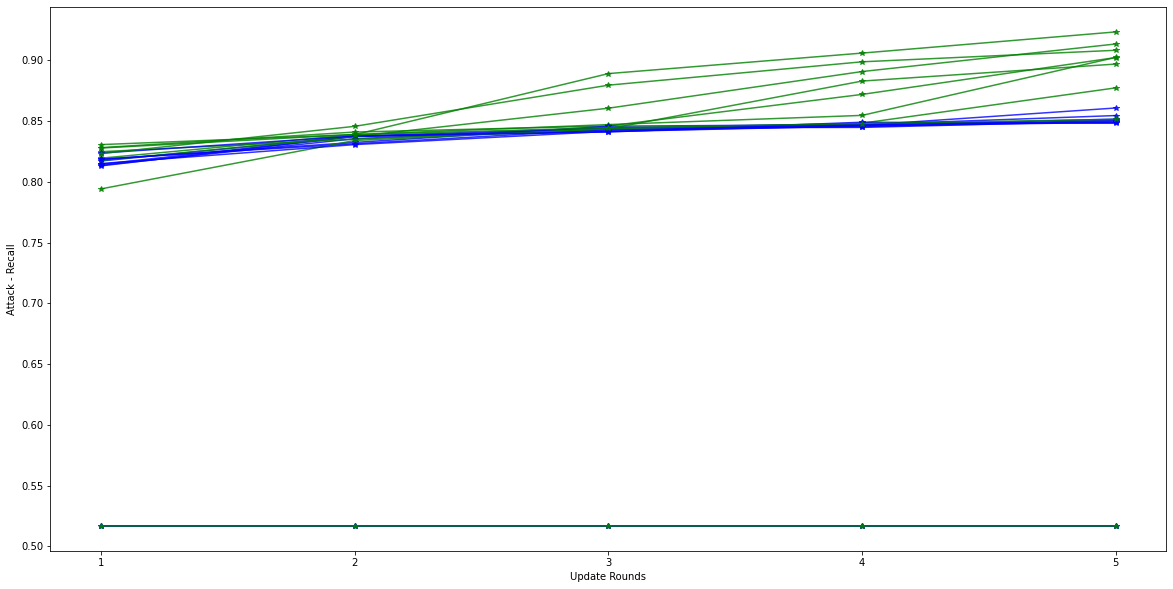

In [ ]:
# Control + Shift + L

update_rounds=5
t = np.arange(0, update_rounds)

pserver = []
pgod = []
pclient = [[] for i in range(n)]
pself = [[] for i in range(n)]

for i in range(n):
  for j in range(update_rounds):
    pclient[i].append(client_accuracy[i][j][0]['accuracy'])

for i in range(n):
  for j in range(update_rounds):
    pself[i].append(self_accuracy[i][j][0]['accuracy'])

# for i in range(update_rounds):
#   pserver.append(server_accuracy[i][0]['accuracy'])

# for i in range(update_rounds):
#   pgod.append(god_accuracy[i][0]['accuracy'])



plt.figure(figsize=(20,10))
plt.xticks(t,t+1)
for i in range(n):
  plt.plot(t, pclient[i], alpha=0.8, marker='*', c='b')
  plt.plot(t, pself[i], alpha=0.8, marker='*', c='g')
# plt.plot(t, pserver, marker='o', c='r')
# plt.plot(t, pgod, marker='o', c='black')
plt.xlabel('Update Rounds')
plt.ylabel('Attack - Recall')
plt.show()


# Torch Model

In [ ]:
# Using torch for GPU

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset,DataLoader

class ModelNN(nn.Module):
  def __init__(self):
    super(ModelNN, self).__init__()
    self.dp = nn.Dropout(p=0.2)

    self.fc1 = nn.Linear(122,128)
    self.fc2 = nn.Linear(128,80)
    self.fc3 = nn.Linear(80,50)
    self.fc4 = nn.Linear(50,25)
    self.fc5 = nn.Linear(25,10)
    self.fc6 = nn.Linear(10,5)
    self.sm = nn.Softmax(dim=1)
    
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = self.dp(x)
    x = torch.relu(self.fc2(x))
    x = self.dp(x)
    x = torch.relu(self.fc3(x))
    x = self.dp(x)
    x = torch.relu(self.fc4(x))
    x = self.dp(x)
    x = torch.relu(self.fc5(x))
    x = self.fc6(x)
    return self.sm(x)

# ohe_y_train = np.zeros((np.shape(X_train)[0],n_class))
# ohe_y_test = np.zeros((np.shape(X_test)[0],n_class))

# for i in range(len(Y_train)):
#   ohe_y_train[i][Y_train[i]]=1

# for i in range(len(Y_test)):
#   ohe_y_test[i][Y_test[i]]=1


x1, x2, y1, y2 = train_test_split(client_data[0][0], client_data[0][1], shuffle=True, test_size=0.20)

trainx = torch.from_numpy(x1).type(torch.float)
trainy = torch.from_numpy(y1).type(torch.LongTensor)#.unsqueeze(1)
testx = torch.from_numpy(x2).type(torch.float)
testy = torch.from_numpy(y2).type(torch.LongTensor)#.unsqueeze(1)

train_data = TensorDataset(trainx, trainy)
test_data = TensorDataset(testx, testy)

train_dataloader = DataLoader(train_data, shuffle = True, batch_size = 512)
test_dataloader = DataLoader(test_data, shuffle = True, batch_size = 512)

# ## Building the DNN model
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# print("Using the device: " + device)

In [ ]:
client_data_loader = []

for i in client_data:
  x = torch.from_numpy(i[0]).type(torch.float)
  y = torch.from_numpy(i[1]).type(torch.LongTensor)
  client_data_loader.append(DataLoader(TensorDataset(x,y), shuffle=True, batch_size=512))

In [ ]:
rX, rY = shuffle(rX, rY)
rX = rX[0:20000]
rY = rY[0:20000]

In [ ]:
def get_adv(modelw, ax, ay):
  correct = 0
  model = ModelNN()
  model.load_state_dict(modelw)
  optim = torch.optim.Adam(model.parameters(),lr=0.5)
  adx = []
  ady = []
  epsilon = 0.0005
  test_data = TensorDataset(torch.from_numpy(ax).type(torch.float), torch.from_numpy(ay).type(torch.LongTensor))
  already_wrong = 0
  suc = 0

  for X, target in test_data:
    #X, target = X.to(device), target.to(device)  
    X = X.resize_(1,122)
    target = target.resize_(1,)
    X.requires_grad = True

    y_pred = model(X)
    y_pred_class = torch.argmax(y_pred,1)
    #print(y_pred, y_pred_class)
    # Already predicted wrongly
    if(y_pred_class.item() != target.item()):
      already_wrong += 1
      continue

    #print(y_pred, target)
    loss = loss_fn(y_pred, target)
    optim.zero_grad()
    loss.backward()
    data_grad = X.grad.data

    adversarial_sample = X + epsilon * data_grad.sign()
    #print(adversarial_sample - X)

    output = model(adversarial_sample)
    output = torch.argmax(output)

    if(output.item() == target.item()):
      correct += 1
    else:
      suc += 1
      adx.append(adversarial_sample.detach().numpy())
      ady.append(target.item())

  acc = correct/len(test_data)
  print(f"Accuracy after adversarial attacks {100 * acc}")
  print(f"Already Wrong: {already_wrong/len(ay)}  Failed: {correct/len(ay)}   Success: {suc/len(ay)}")
  return 100 * acc, np.array(adx).astype('float32'), np.array(ady)

In [ ]:
update_rounds = 20
ep = 5
loss_fn = nn.CrossEntropyLoss()

client_model = []
server_model = ModelNN()

server_accuracy = []
adv_accuracy = []

for i in range(update_rounds):
  print(f"Round {i}: \n")
  client_model = []
  for j in range(n):
    temp_model = ModelNN()
    temp_model.load_state_dict(server_model.state_dict())
    optim = torch.optim.Adam(temp_model.parameters(),lr=0.005)
    cx, cy = client_data[j]
    a1, a2, a3 = get_adv(server_model.state_dict(), cx, cy)

    if(len(a2)!=0):
      cx = np.concatenate([cx, a2.squeeze()])
      cy = np.concatenate([cy, a3.squeeze()])

    dx = torch.from_numpy(cx).type(torch.float)
    dy = torch.from_numpy(cy).type(torch.LongTensor)
    # dytrue = torch.from_numpy(client_data[j][1]).type(torch.LongTensor)

    for k in range(ep):
      dl = DataLoader(TensorDataset(dx,dy), shuffle=True, batch_size=512)
      for (X,y) in dl:
        y_pred = temp_model(X).squeeze()
        loss = loss_fn(y_pred, y)
        optim.zero_grad()
        loss.backward()
        optim.step()

    y_pred = temp_model(dx)
    y_pred = torch.max(y_pred,1).indices
    correct = (y_pred==dy).sum()        
    print(f"Accuracy of Client {j} = {correct/len(dy)}")
    client_model.append(temp_model.state_dict())

    # y_pred = temp_model(dx).softmax(dim=1).detach().numpy()

    # temp_model2 = ModelNN()
    # temp_model2.load_state_dict(server_model.state_dict())
    # optim = torch.optim.Adam(temp_model2.parameters(),lr=0.05)
    # dy = torch.from_numpy(y_pred).type(torch.float)

    # for k in range(ep):
    #   dl = DataLoader(TensorDataset(dx,dy), shuffle=True, batch_size=512)
    #   for (X,y) in dl:
    #     y_pred = temp_model2(X).squeeze()
    #     loss = loss_fn(y_pred, y)
    #     optim.zero_grad()
    #     loss.backward()
    #     optim.step()

    # y_pred = temp_model2(dx)
    # y_pred = torch.max(y_pred,1).indices
    # correct = (y_pred==dytrue).sum()        
    # print(f"Accuracy of Client {j} = {correct/len(dy)}")
    # client_model.append(temp_model2.state_dict())

  # Update Server Model
  avg_weights = dict()
  keys = client_model[0].keys()
  client_model = np.array(client_model)

  for p in keys:
    temp_sum = client_model[0][p]
    for q in range(1,len(client_model)):
      temp_sum += client_model[q][p]
    avg_weights[p] = temp_sum/n

  server_model.load_state_dict(avg_weights)
  y_p = temp_model(torch.from_numpy(rX).type(torch.float))
  y_p = torch.max(y_p,1).indices.numpy()
  print(Counter(y_p))
  correct = (1.0 * (y_p==rY)).sum()        
  print(f"Accuracy of Server = {correct/len(rY)}")
  server_accuracy.append(correct/len(rY))

  a1, a2, a3 = get_adv(server_model.state_dict(), rX, rY)
  adv_accuracy.append(a1)


Round 0: 

Accuracy after adversarial attacks 48.212241599892266
Already Wrong: 0.5007743586290485  Failed: 0.48212241599892264   Success: 0.01710322537202882
Accuracy of Client 0 = 0.8960608839988708
Accuracy after adversarial attacks 48.407514645478415
Already Wrong: 0.49814827284357954  Failed: 0.48407514645478417   Success: 0.017776580701636253
Accuracy of Client 1 = 0.8756202459335327
Accuracy after adversarial attacks 48.447915965254865
Already Wrong: 0.4996296545687159  Failed: 0.4844791596525487   Success: 0.01589118577873544
Accuracy of Client 2 = 0.8944123983383179
Accuracy after adversarial attacks 48.03716921419433
Already Wrong: 0.500639687563127  Failed: 0.4803716921419433   Success: 0.018988620294929634
Accuracy of Client 3 = 0.8879270553588867
Accuracy after adversarial attacks 48.656656117433165
Already Wrong: 0.49410814086593496  Failed: 0.48656656117433167   Success: 0.01932529795973335
Accuracy of Client 4 = 0.8651737570762634
Accuracy after adversarial attacks 48.9

In [ ]:
import pickle as pkl
pkl.dump(ss, open("no_attack.pkl","wb"))
pkl.dump(adv_accuracy, open("adv_attack.pkl","wb"))

In [ ]:
import pickle as pkl
pkl.dump(server_accuracy, open("dd1.pkl","wb"))
pkl.dump(adv_accuracy, open("dd2.pkl","wb"))

In [ ]:
import pickle as pkl
pkl.dump(server_accuracy, open("at1.pkl","wb"))
pkl.dump(adv_accuracy, open("at2.pkl","wb"))

In [ ]:
import pickle as pkl

w1 = pkl.load(open("no_attack.pkl","rb"))
w2 = pkl.load(open("adv_attack.pkl","rb"))
w3 = pkl.load(open("dd1.pkl","rb"))
w4 = pkl.load(open("dd2.pkl","rb"))
w5 = pkl.load(open("at1.pkl","rb"))
w6 = pkl.load(open("at2.pkl","rb"))

np.mean(w1), np.mean(w2), np.mean(w3), np.mean(w4), np.mean(w5), np.mean(w6)

In [ ]:
q1 = np.mean(w1, 0) + 0.003
q2 = np.mean(w2, 0)

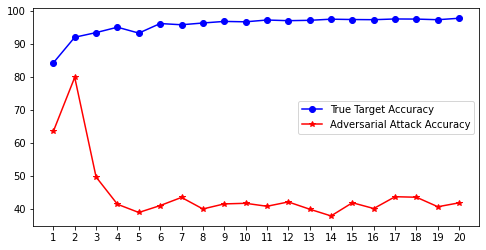

In [ ]:
e = np.arange(20)
plt.figure(figsize=(8,4))
plt.xticks(e, e+1)
plt.plot(e, w1, marker='o', c='b', label='True Target Accuracy')
plt.plot(e, w2, marker='*', c='r', label='Adversarial Attack Accuracy')
plt.legend()
plt.show()

In [ ]:
e = np.arange(20)
plt.figure(figsize=(8,4))
plt.xticks(e,e+1)
plt.plot(e, q1, marker='o', c='g', label='Mean Probability Prediction Member')
plt.plot(e, q2, marker='*', c='r', label='Mean Probability Prediction Non-Member')
plt.legend()
plt.show()

In [ ]:
ss = []
ss = [i*100 for i in server_accuracy]

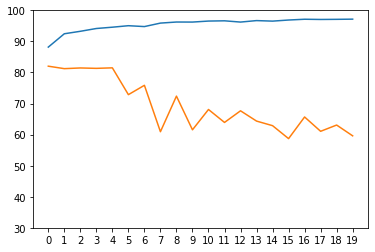

In [ ]:
plt.plot(np.arange(0,len(server_accuracy)), ss)
plt.plot(np.arange(0,len(server_accuracy)), adv_accuracy)
plt.xticks(np.arange(0,len(server_accuracy)),np.arange(0,len(server_accuracy)))
plt.ylim(30,100)
plt.show()

In [ ]:
plt.plot(np.arange(0,len(server_accuracy)), w1)
plt.plot(np.arange(0,len(server_accuracy)), w2)
plt.xticks(np.arange(0,len(server_accuracy)),np.arange(0,len(server_accuracy)))
plt.ylim(30,100)
plt.show()

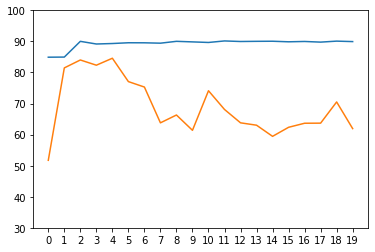

In [ ]:
plt.plot(np.arange(0,len(server_accuracy)), ss)
plt.plot(np.arange(0,len(server_accuracy)), adv_accuracy)
plt.xticks(np.arange(0,len(server_accuracy)),np.arange(0,len(server_accuracy)))
plt.ylim(30,100)
plt.show()

#Membership Inference

In [ ]:
for p in temp_model.parameters():
  print(p.grad)
  ori = p.grad
  ori += torch.normal(0,0.01,p.size())
  p.grad = ori
  print(p.grad)
  print("--------------------------")

tensor([[ 0.5983, -0.8087, -1.0424,  ...,  1.0296,  0.5431,  2.4987],
        [ 0.4682, -0.5482, -0.0783,  ..., -3.2106,  0.3389,  0.2630],
        [ 0.0852, -2.5770,  3.2737,  ...,  2.2722, -0.6240,  1.8297],
        ...,
        [-0.7879,  0.8457,  1.9542,  ...,  1.0988, -0.5755, -0.9147],
        [-1.2408, -0.8807,  0.6926,  ..., -0.0099, -1.6987,  0.0510],
        [-0.7673,  0.3461, -2.5125,  ..., -0.4316, -3.2278,  0.2997]])
tensor([[ 0.6071, -0.7927, -1.0403,  ...,  1.0362,  0.5436,  2.5000],
        [ 0.4658, -0.5532, -0.0772,  ..., -3.2149,  0.3442,  0.2678],
        [ 0.0822, -2.5695,  3.2743,  ...,  2.2746, -0.6366,  1.8328],
        ...,
        [-0.7784,  0.8414,  1.9576,  ...,  1.1050, -0.5811, -0.9219],
        [-1.2441, -0.8676,  0.6758,  ..., -0.0049, -1.6929,  0.0408],
        [-0.7574,  0.3541, -2.5220,  ..., -0.4278, -3.2366,  0.2785]])
--------------------------
tensor([ 1.8542,  0.4276,  0.5066,  1.0509, -1.5566,  1.9427, -3.8230, -2.4209,
        -0.3424, -0.1864,

In [ ]:
np.shape(client_data[1][0])

(12831, 122)

In [ ]:
update_rounds = 20
ep = 20
loss_fn = nn.CrossEntropyLoss()

client_model = []
server_model = ModelNN()

server_accuracy = []
adv_accuracy = []

din = np.zeros((len(client_data[0][0]),update_rounds))
dout = np.zeros((len(client_data[1][0]),update_rounds))

for i in range(update_rounds):
  print(f"Round {i}: \n")
  client_model = []
  for j in range(n):
    temp_model = ModelNN()
    temp_model.load_state_dict(server_model.state_dict())
    optim = torch.optim.Adam(temp_model.parameters(),lr=0.005)
    dx = torch.from_numpy(client_data[j][0]).type(torch.float)
    dy = torch.from_numpy(client_data[j][1]).type(torch.LongTensor)
    # dytrue = torch.from_numpy(client_data[j][1]).type(torch.LongTensor)

    for k in range(ep):
      dl = DataLoader(TensorDataset(dx,dy), shuffle=True, batch_size=512)
      for (X,y) in dl:
        y_pred = temp_model(X).squeeze()
        loss = loss_fn(y_pred, y)
        optim.zero_grad()
        loss.backward()

        # for p in temp_model.parameters():
        #   ori = p.grad
        #   ori += torch.normal(0,0.03,p.size())
        #   p.grad = ori
        
        optim.step()

    y_pred = temp_model(dx)
    y_pred = torch.max(y_pred,1).indices
    correct = (y_pred==dy).sum()        
    print(f"Accuracy of Client {j} = {correct/len(dy)}")
    client_model.append(temp_model.state_dict())

    if j==0:
      m1 = temp_model(torch.from_numpy(client_data[0][0]).type(torch.float)).softmax(dim=1).detach().numpy()
      m2 = temp_model(torch.from_numpy(client_data[1][0]).type(torch.float)).softmax(dim=1).detach().numpy()

      for w in range(len(m1)):
        din[w][i] = m1[w][client_data[0][1][w]]
      
      for w in range(len(m2)):
        dout[w][i] = m2[w][client_data[1][1][w]]


  # Update Server Model
  avg_weights = dict()
  keys = client_model[0].keys()
  client_model = np.array(client_model)

  for p in keys:
    temp_sum = client_model[0][p]
    for q in range(1,len(client_model)):
      temp_sum += client_model[q][p]
    avg_weights[p] = temp_sum/n

  server_model.load_state_dict(avg_weights)
  y_p = temp_model(torch.from_numpy(rX).type(torch.float))
  y_p = torch.max(y_p,1).indices.numpy()
  print(Counter(y_p))
  correct = (1.0 * (y_p==rY)).sum()        
  print(f"Accuracy of Server = {correct/len(rY)}")
  server_accuracy.append(correct/len(rY))


Round 0: 

Accuracy of Client 0 = 0.9363005757331848
Accuracy of Client 1 = 0.934280514717102
Accuracy of Client 2 = 0.9387246370315552
Accuracy of Client 3 = 0.9278163313865662
Accuracy of Client 4 = 0.9360312223434448
Accuracy of Client 5 = 0.9330011606216431
Accuracy of Client 6 = 0.9320584535598755
Accuracy of Client 7 = 0.9314524531364441
Accuracy of Client 8 = 0.9315197467803955
Accuracy of Client 9 = 0.9346845149993896
Counter({0: 83574, 1: 52414, 2: 12529})
Accuracy of Server = 0.9317586538914737
Round 1: 

Accuracy of Client 0 = 0.935829222202301
Accuracy of Client 1 = 0.9553565382957458
Accuracy of Client 2 = 0.9393979907035828
Accuracy of Client 3 = 0.9288263320922852
Accuracy of Client 4 = 0.9492963552474976
Accuracy of Client 5 = 0.9631674885749817
Accuracy of Client 6 = 0.9346845149993896
Accuracy of Client 7 = 0.9476129412651062
Accuracy of Client 8 = 0.9472762942314148
Accuracy of Client 9 = 0.9626287817955017
Counter({0: 79704, 1: 52765, 2: 13740, 3: 2308})
Accuracy of

In [ ]:
vx = np.concatenate([din, dout])
vy = np.concatenate([np.ones(len(din)), np.zeros(len(dout))])

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, max_depth=10)

xtrain, xtest, ytrain, ytest = train_test_split(vx, vy, shuffle=True, test_size=0.1)

rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)

print(accuracy_score(ypred, ytest))

0.49478290138000675


In [ ]:
def in_model():
  input = Input(shape=[20], name='input')
  d1 = Dense(30, activation='relu', name='dense1')(input)
  dr1 = Dropout(0.2, name='dropout1')(d1)
  d2 = Dense(10, activation='relu',  name='dense2')(dr1)
  dr2 = Dropout(0.2, name='dropout2')(d2)
  output = Dense(1, activation='sigmoid', name='output')(dr2)

  model = tf.keras.Model(inputs = input, outputs = output)

  opt = tf.keras.optimizers.Adam(learning_rate=0.01)
  model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

  return model

In [ ]:
ii = in_model()
ii.fit(xtrain, ytrain, epochs=100, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/100
836/836 [==============================] - 5s 4ms/step - loss: 0.6938 - accuracy: 0.4977 - val_loss: 0.6952 - val_accuracy: 0.4975
Epoch 2/100
836/836 [==============================] - 3s 4ms/step - loss: 0.6935 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 3/100
836/836 [==============================] - 3s 3ms/step - loss: 0.6935 - accuracy: 0.4983 - val_loss: 0.6932 - val_accuracy: 0.4975
Epoch 4/100
836/836 [==============================] - 3s 4ms/step - loss: 0.6933 - accuracy: 0.5033 - val_loss: 0.6931 - val_accuracy: 0.5025
Epoch 5/100
836/836 [==============================] - 3s 4ms/step - loss: 0.6935 - accuracy: 0.4979 - val_loss: 0.6932 - val_accuracy: 0.4978
Epoch 6/100
836/836 [==============================] - 3s 4ms/step - loss: 0.6935 - accuracy: 0.4981 - val_loss: 0.6931 - val_accuracy: 0.4978
Epoch 7/100
836/836 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.5050 - val_loss: 0.6943 - val_accuracy: 0.4975

KeyboardInterrupt: ignored

In [ ]:
pkl.dump(din, open("changed1.pkl", "wb"))
pkl.dump(dout, open("changed2.pkl", "wb"))

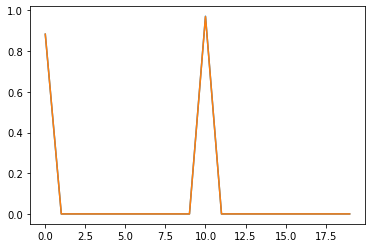

In [ ]:
e1 = np.mean(din, 0)
e2 = np.mean(dout, 0)

plt.plot(np.arange(update_rounds), e1)
plt.plot(np.arange(update_rounds), e2)
plt.show()

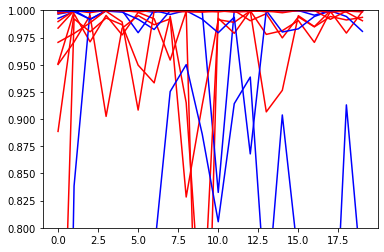

In [ ]:
xt = np.arange(update_rounds)
for i in range(10):
  plt.plot(xt, din[i], c='b')
  plt.plot(xt, dout[i], c='r')
plt.ylim(0.8,1)
plt.show()

# Pytorch Model


In [ ]:
# Using torch for GPU

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset,DataLoader

class ModelNN(nn.Module):
  def __init__(self):
    super(ModelNN, self).__init__()
    self.dp = nn.Dropout(p=0.2)

    self.fc1 = nn.Linear(122,128)
    self.fc2 = nn.Linear(128,80)
    self.fc3 = nn.Linear(80,50)
    self.fc4 = nn.Linear(50,25)
    self.fc5 = nn.Linear(25,10)
    self.fc6 = nn.Linear(10,5)
    self.sm = nn.Softmax(dim=1)
    
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = self.dp(x)
    x = torch.relu(self.fc2(x))
    x = self.dp(x)
    x = torch.relu(self.fc3(x))
    x = self.dp(x)
    x = torch.relu(self.fc4(x))
    x = self.dp(x)
    x = torch.relu(self.fc5(x))
    x = self.fc6(x)
    return x

# ohe_y_train = np.zeros((np.shape(X_train)[0],n_class))
# ohe_y_test = np.zeros((np.shape(X_test)[0],n_class))

# for i in range(len(Y_train)):
#   ohe_y_train[i][Y_train[i]]=1

# for i in range(len(Y_test)):
#   ohe_y_test[i][Y_test[i]]=1


x1, x2, y1, y2 = train_test_split(client_data[0][0], client_data[0][1], shuffle=True, test_size=0.20)

trainx = torch.from_numpy(x1).type(torch.float)
trainy = torch.from_numpy(y1).type(torch.LongTensor)#.unsqueeze(1)
testx = torch.from_numpy(x2).type(torch.float)
testy = torch.from_numpy(y2).type(torch.LongTensor)#.unsqueeze(1)

train_data = TensorDataset(trainx, trainy)
test_data = TensorDataset(testx, testy)

train_dataloader = DataLoader(train_data, shuffle = True, batch_size = 512)
test_dataloader = DataLoader(test_data, shuffle = True, batch_size = 512)

# ## Building the DNN model
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# print("Using the device: " + device)

In [ ]:
model = ModelNN()

if torch.cuda.is_available():
  device=torch.device('cuda')
  model=model.cuda()
else:
  device=torch.device('cpu')

print(f"Device: {device}")

## Training and testing phases
epochs = 100
loss_fn = nn.CrossEntropyLoss()
learn = 0.001
optim = torch.optim.Adam(model.parameters(),lr=learn)
train_acc = []
train_loss = []
test_acc = []
test_loss = []

import time
start = time.time()

for ep in range(epochs):
  # if(ep==50):
  #   learn = learn * 0.1
  #   optim = torch.optim.Adam(model.parameters(),lr=learn)
  print("---------------------------------------------------")
  print(f"Epoch Number {ep}")
  correct = 0
  total = 0
  for phase in ['train', 'validate']:

    if(phase=='train'):
      model.train(True)
      loader = train_dataloader
    elif(phase=='validate'):
      model.train(False)
      loader = test_dataloader

    for batch, (X, y) in enumerate(loader):
      # if(batch%100==0):
      #   print(f"Handing batch number: {batch} in phase {phase}")
      X = X.to(device)
      y = y.to(device)

      y_pred = model(X).squeeze()

      # print(f"Y_pred: {y_pred.is_cuda}")
      loss = loss_fn(y_pred, y)

      if(phase=='train'):
        optim.zero_grad()
        loss.backward()
        optim.step()
        y_pred = torch.max(y_pred, 1).indices
        correct += (y_pred==y).sum()
        total += len(y)

      elif(phase=='validate'):
        y_pred = torch.max(y_pred, 1).indices
        #print(f"Testing Loss = {loss_fn(y_pred, y)}")
        correct += (y_pred==y).sum()
        total += len(y)

    acc = 100 * (correct/total)
    if(phase=='validate'): 
      test_acc.append(acc.item())
      test_loss.append(loss.item())
      print(f"Accuracy of the validation set {acc}")
    elif(phase=='train'):
      train_acc.append(acc.item())
      train_loss.append(loss.item())
      print(f"Accuracy of the train set {acc}")
print(time.time()-start)

Device: cpu
---------------------------------------------------
Epoch Number 0
Accuracy of the train set 8.981481552124023
Accuracy of the validation set 9.440441131591797
---------------------------------------------------
Epoch Number 1
Accuracy of the train set 43.19865417480469
Accuracy of the validation set 44.60979080200195
---------------------------------------------------
Epoch Number 2
Accuracy of the train set 68.62794494628906
Accuracy of the validation set 70.2713623046875
---------------------------------------------------
Epoch Number 3
Accuracy of the train set 80.72390747070312
Accuracy of the validation set 80.58042907714844
---------------------------------------------------
Epoch Number 4
Accuracy of the train set 82.3400650024414
Accuracy of the validation set 82.20995330810547
---------------------------------------------------
Epoch Number 5
Accuracy of the train set 82.89562225341797
Accuracy of the validation set 82.69477081298828
------------------------------

In [ ]:
import pickle
pickle.dump(client_data[0], open("inv_data.pkl","wb"))
pickle.dump(model, open("inv_model.pkl","wb"))

In [ ]:
idata = pickle.load( open("inv_data.pkl","rb"))
imodel = pickle.load( open("inv_model.pkl","rb"))

In [ ]:
# Dummy Vectors we are trying to find out
dx = torch.rand(np.shape(idata[0])) - 0.5
dy = []

In [ ]:
# Finding the true labels

loss1 = nn.CrossEntropyLoss()
original_grad = []

for i in range(len(idata[0])):
  ypred = imodel(torch.from_numpy(idata[0][i]).type(torch.float))
  ypred = torch.reshape(ypred, (1,5))
  out = loss1(ypred, torch.from_numpy(np.array(idata[1][i]).reshape(1,)).type(torch.LongTensor))
  dydx = torch.autograd.grad(out, imodel.parameters())
  original_grad.append(dydx)
  target = torch.argmin(torch.sum(dydx[-2],1)).item()
  dy.append(target)
dy = np.array(dy)
print(classification_report(dy, idata[1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7753
           1       1.00      1.00      1.00      5298
           2       1.00      1.00      1.00      1421
           3       1.00      1.00      1.00       368
           4       1.00      1.00      1.00        11

    accuracy                           1.00     14851
   macro avg       1.00      1.00      1.00     14851
weighted avg       1.00      1.00      1.00     14851



tensor([0.6933, 0.3092, 0.9277, 0.2699, 0.9070, 0.6246, 0.1424, 0.8433, 0.5530,
        0.6798, 0.4511, 0.2680, 0.8950, 0.6311, 0.8290, 0.5882, 0.7196, 0.5039,
        0.0802, 0.2876, 0.5234, 0.5845, 0.6873, 0.3385, 0.7440, 0.2590, 0.2762,
        0.8057, 0.2510, 0.4357, 0.5800, 0.4219, 0.6553, 0.5602, 0.1774, 0.7645,
        0.3737, 0.7577, 0.1375, 0.5624, 0.4118, 0.0832, 0.9059, 0.3279, 0.7014,
        0.9974, 0.5204, 0.5161, 0.8789, 0.1045, 0.1055, 0.5613, 0.2077, 0.0734,
        0.6711, 0.5923, 0.2161, 0.2496, 0.1728, 0.0031, 0.2484, 0.2946, 0.9584,
        0.0879, 0.5302, 0.0780, 0.1956, 0.8442, 0.1458, 0.8411, 0.6525, 0.6591,
        0.8954, 0.3509, 0.5468, 0.0647, 0.8715, 0.2816, 0.3176, 0.0018, 0.2186,
        0.9993, 0.6379, 0.7836, 0.7346, 0.1303, 0.2562, 0.4267, 0.0799, 0.5654,
        0.0733, 0.5235, 0.8891, 0.5767, 0.3515, 0.3705, 0.6315, 0.2722, 0.0739,
        0.8561, 0.6160, 0.4930, 0.8110, 0.6398, 0.1673, 0.8478, 0.4396, 0.2239,
        0.0365, 0.2102, 0.3442, 0.8269, 

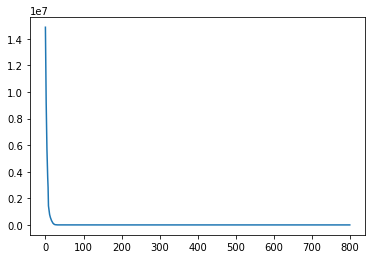

In [ ]:
# Performing Model Inversion by generating data samples by matching gradients

loss2 = nn.MSELoss()
sx = torch.rand((122,))
sx.requires_grad = True
print(sx)
opt = torch.optim.LBFGS([sx, ], lr=0.00625)
hist = []
k=1
# for i in range(len(idata[0])):
def closure():
  opt.zero_grad()
  ys = imodel(sx.type(torch.float))
  ys = torch.reshape(ys, (1,5))
  out2 = loss1(ys, torch.from_numpy(np.array(dy[k]).reshape(1,)).type(torch.LongTensor))
  fake_dydx = torch.autograd.grad(out2, imodel.parameters(), create_graph=True)

  grad_diff = 0
  for gx, gy in zip(fake_dydx, original_grad[k]):
      grad_diff += ((gx - gy) ** 2).sum()
  grad_diff.backward()
  return grad_diff

for i in range(800):
  opt.step(closure)

  hist.append(closure().item())
print("******************************************")
print(sx)

plt.plot(np.arange(len(hist)), hist)
plt.show()
# return grad_diff





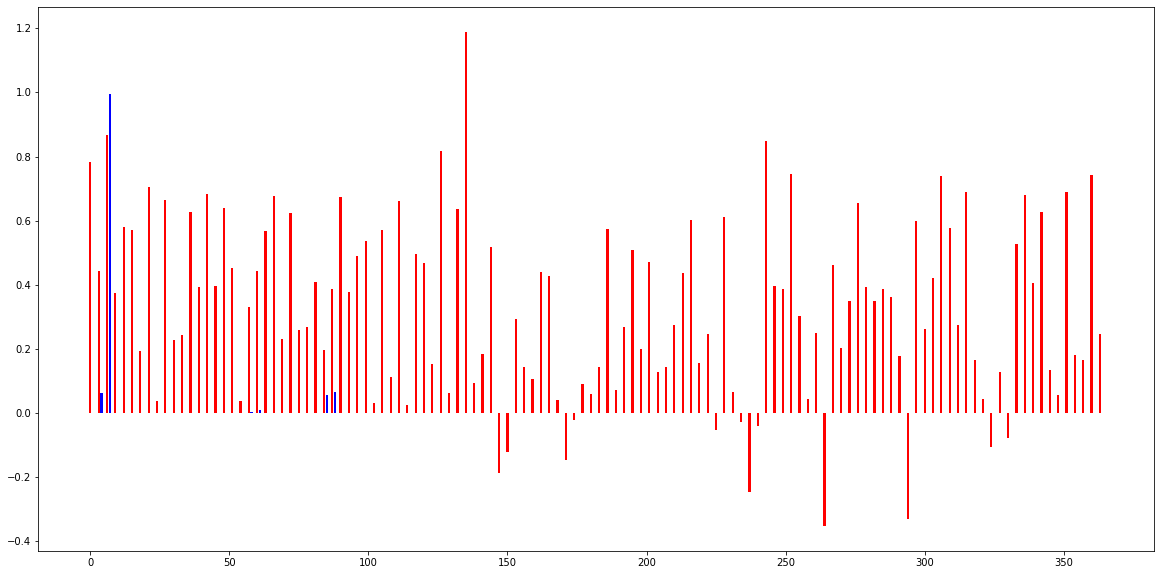

In [ ]:
a = sx.detach().numpy()
b = idata[0][k]
plt.figure(figsize=(20,10))
plt.bar(3*np.arange(122),a,color='r')
plt.bar(3*np.arange(122)+1,b,color='b')
plt.show()